<center><h1>Analysis of Factors Affecting Students Performance in Portuguese Schools</h1></center>

For a better view of the notebook @ [NBViewer](https://nbviewer.org/github/dSilu/SIF-MiniProject/blob/main/student_performance_analysis.ipynb#schools-and-students)

<a id='introduction'></a>

### Introduction

-----

<center><strong><em>"Education is the most powerful tool<br>Which you can use to change the world"<br>- Nelson Mandela</em></strong></center>

Europe always have an effect on the world in every field starting from Culture to Science & Technology. The European debt crisis or The Europe's Sovereign Debt Crisis [*1*](https://www.investopedia.com/terms/e/european-sovereign-debt-crisis.asp) had left many countries on the verge of bankruptcy. Portugal was one among those countries that faced the suffered severely. Though there were many other factors that contributed the crisis, low literacy rate and high dropout rate have been most important contributing factors for Portugal's financial crisis [*2*](https://worldtop20.org/the-worlds-best-20-education-systems-rankings-third-quarter-report). As per a report of 2012, less than 30% of Portuguese adults have graduated from high schools [*3*](#https://www.npr.org/2012/04/09/150062919/lack-of-graduates-hampers-portugals-recovery). Recent survey reports presented by The Organization for Economic Cooperation and Development [OECD](https://www.state.gov/the-organization-for-economic-co-operation-and-development-oecd/#:~:text=and%20Development%20(OECD)-,The%20Organization%20for%20Economic%20Cooperation%20and%20Development%20(OECD),to%20promote%20sustainable%20economic%20growth.) showed the increase in school enrollment of children. However, still the countries literacy rate lays behind average literacy rate of OECD countries [*4*](https://gpseducation.oecd.org/CountryProfile?primaryCountry=PRT&treshold=10&topic=EO).

In this project we are trying to analyze various factors affecting students performance on Portuguese schools based on the original study conducted by [Paulo Cortez](https://pcortez.dsi.uminho.pt/) and Alice Silva titled as *"USING DATA MINING TO PREDICT SECONDARY SCHOOL STUDENT PERFORMANCE"*.

Our aim is to perform exploratory and explanatory analysis of the dataset. In the mean process we are going to analyze students performance, their family and other habits, failures, and ambition for higher study as well.

<a id='about-the-dataset'></a>

### About the Dataset

----

The dataset contains information about students' performance, absences, demographic, social and school related attributes from two Portuguese schools named as Gabriel Pereira and Mousinho da Silveira. The data has been collected and merged from different sources i.e. mark reports and questionnaires.

The dataset can be found @ [Kaggle](https://www.kaggle.com/datasets/larsen0966/student-performance-data-set) and [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance)


#### Attribute Details

school :

    - Two schools: 
        GP : Gabriel Pereira
        MS : Mousinho da Silveira
    
sex : 

    - Gender of student (Binary)

age : 

    - Age of student 

address:

    - Student's home address
        U : Urban
        R : Rural

famsize:
    
    - Family size
        LE3 : Less or equal to 3 
        GT3 : Greater than 3

Pstatus:
    
    - Parent's cohabitation status 
        T : Living together
        A : Apart

Medu:
    
    - Mother's education (numeric)
        0 : None
        1 : Primary education (4th grade)
        2 : 5th to 9th grade
        3 : Secondary education
        4 : Higher education

Fedu:

    - father's education (numeric)
        0 : None
        1 : Primary education (4th grade)
        2 : 5th to 9th grade
        3 : Secondary education
        4 : Higher education

Mjob: 

    - Mother's job (nominal)
        teacher
        health care related 
        civil services (e.g. administrative or police), 
        at_home,
        other

Fjob:

    - Father's job (nominal) 
        'teacher'
        'health' care related, 
        civil 'services' (e.g. administrative or police), 
        'at_home',
        'other'

reason:

    - Reason to choose this school (nominal)
        home : Near to home, 
        reputation : Reputation of school, 
        course : Preference to curriculum of school
        other'

guardian:

    - Student's guardian (nominal)
        mother,
        father,
        other

traveltime:

    - home to school travel time (numeric)
        1 : <15 min. 
        2 : 15 to 30 min., 
        3 : 30 min. to 1 hour, 
        4 : >1 hour

studytime:
    
    - weekly study time (numeric)
        1 : <2 hours, 
        2 : 2 to 5 hours, 
        3 : 5 to 10 hours,
        4 : >10 hours

failures:
    
    - number of past class failures (numeric)
        n if 1<=n<3, else 4

schoolsup:
    
    - Extra educational support (binary) 
        yes or no

famsup:
    
    - Family educational support (binary) 
        yes or no

paid:
    
    - Extra paid classes within the course subject (Math or Portuguese) (binary) 
        yes or no

activities :

    - Extra-curricular activities (binary) 
        yes or no

nursery:

    - Attended nursery school (binary)
        yes or no

higher:
    
    - Wants to take higher education (binary)
        yes or no

internet:
    
    - Internet access at home (binary) 
        yes or no

romantic:

    - With a romantic relationship (binary) 
        yes or no

famrel:

    - Quality of family relationships (numeric)
        from 1 : very bad to 5 : excellent

freetime:
    
    - Free time after school (numeric) 
        from 1: very low to 5: very high
    
goout:
    
    - Going out with friends (numeric)
        from 1: very low to 5: very high

Dalc:
    
    - Workday alcohol consumption (numeric) 
        from 1: very low to 5: very high

Walc: 
    
    - Weekend alcohol consumption (numeric)
        from 1: very low to 5: very high

health:
    - Current health status (numeric)
        from 1: very bad to 5: very good

absences: 
    
    - number of school absences (numeric)
        from 0 to 93

##### these grades are related with the course subject, Math or Portuguese:
G1: 

    - First period grade (numeric) 
        from 0 to 20

G2:

    - Second period grade (numeric)
        from 0 to 20

G3:
    
    - Final grade (numeric)
        from 0 to 20

<a id ='load-libraries'></a>

### Load Libraries

----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from janitor import clean_names
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib import style
import warnings


%matplotlib inline
pd.set_option('display.max_columns', None, 'display.max_rows', None)
plt.rcParams['figure.dpi'] = 140
plt.style.use('seaborn-darkgrid')
warnings.filterwarnings('ignore')

<a id='load-dataset'></a>

### Load Dataset

---

In [2]:
df = clean_names(pd.read_csv('student-por.csv'))
df.head(10)

school sex  age address famsize pstatus  medu  fedu      mjob      fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother           2          2         0       yes     no   no   
1      course   father           1          2         0        no    yes   no   
2       other   mother           1          2         0       yes     no   no   
3        home   mother           1          3         0        no    yes   no   
4        home   father           1          2         0        no    yes   no   
5  reputation   mother           1          2         0        no    yes   no   
6        home   mother           1          2         0        no     no   no   
7        home   mother           2          2         0       yes    yes   no   
8        home   mother           1          2         0        no    yes   no   
9        home   mother           1          2         0        no    yes   no   

  activities nursery higher internet romantic  famrel  freetime  goout  dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   
5        yes     yes    yes      yes       no       5         4      2     1   
6         no     yes    yes      yes       no       4         4      4     1   
7         no     yes    yes       no       no       4         1      4     1   
8         no     yes    yes      yes       no       4         2      2     1   
9        yes     yes    yes      yes       no       5         5      1     1   

   walc  health  absences  g1  g2  g3  
0     1       3         4   0  11  11  
1     1       3         2   9  11  11  
2     3       3         6  12  13  12  
3     1       5         0  14  14  14  
4     2       5         0  11  13  13  
5     2       5         6  12  12  13  
6     1       3         0  13  12  13  
7     1       1         2  10  13  13  
8     1       1         0  15  16  17  
9     1       5         0  12  12  13

In [3]:
# Utilities

# schools
gp_school = df[df['school']=='GP']
ms_school = df[df['school']=='MS']

# boys 
boys_df = df[df['sex']=='M']
# girls
girls_df = df[df['sex']=='F']



def find_order(data, x, y):
    """
    Args:
        data (DataFrame): DataFrame with values of x and y
        x (cat/obj): Column by which the DataFrame will be grouped 
        y (numeric): Column to sort the values (mainly the target)

    Returns:
        Grouped DataFrame with sorted values based on y. 
    """
    order = data.groupby(x).mean().sort_values(y).reset_index()

    return order

<a id='info-missing-values-and-duplicate-values'></a>

### Info, Missing values and Duplicate Values

----

In [4]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   pstatus     649 non-null    object
 6   medu        649 non-null    int64 
 7   fedu        649 non-null    int64 
 8   mjob        649 non-null    object
 9   fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
# missing values
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
pstatus       False
medu          False
fedu          False
mjob          False
fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
dalc          False
walc          False
health        False
absences      False
g1            False
g2            False
g3            False
dtype: bool

In [6]:
# duplicate values
df.duplicated().any()

False

   - The dataset contains 649 rows with 33 columns with object and int64 type data.
    
   - There are no null values in the dataset, however there might be inconsistent values.

   - Minimal memory use.

   - No duplicate values present

<a id='schools-and-students'></a>

### Schools and Students

----

In this phase we will check number of students had enrolled into both the schools. We will also check gender wise, age wise and address wise number of students had enrolled into both the schools.

In [7]:
df.school.value_counts()

GP    423
MS    226
Name: school, dtype: int64

In [8]:
(423 - 226 ) / df.shape[0] 

0.3035439137134052

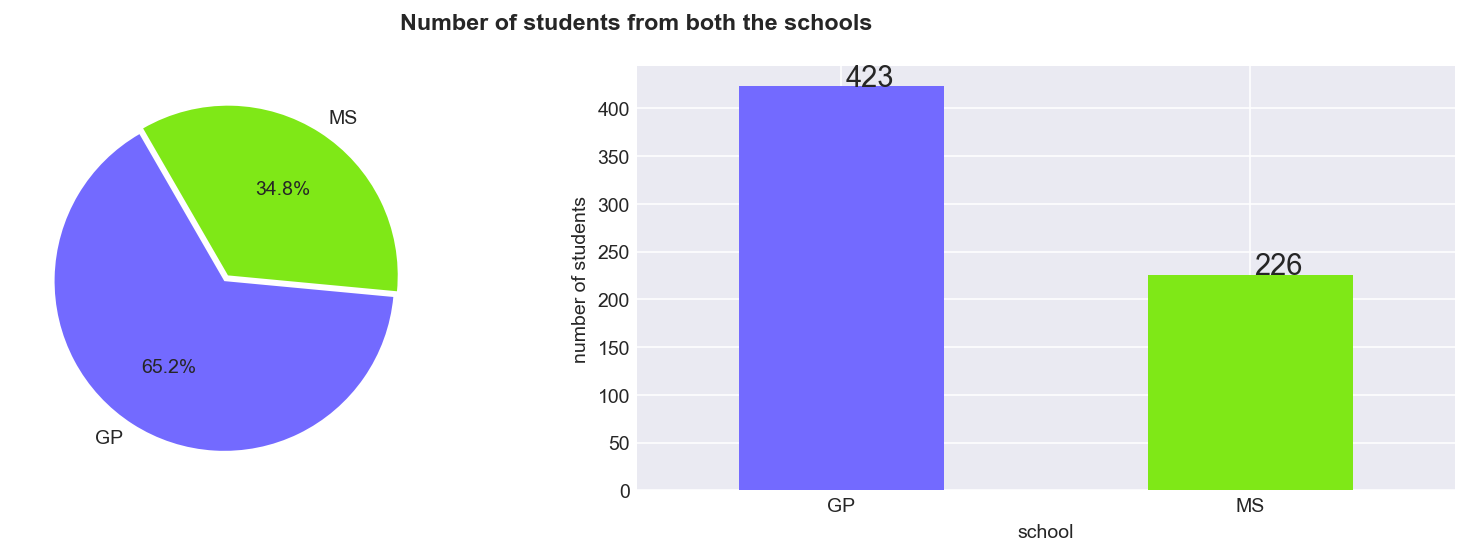

In [9]:
# number of students from both the schools
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Number of students from both the schools", weight='bold')

plt.subplot(1, 2, 1)
pie = df.school.value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['#736aff', '#7fe817'],
    startangle = 120,
    explode=(0.02, 0.02)
)
plt.ylabel('')

plt.subplot(1, 2, 2)
bar = df.school.value_counts().plot(kind='bar', color=['#736aff', '#7fe817'])
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x() + .26, p.get_height() + .25), va='baseline',size=15)
plt.xticks(rotation=0)
plt.xlabel('school')
plt.ylabel('number of students')

plt.tight_layout()
plt.show()

_Number of students in both the schools._

- More number of students were from Gabriel Pereira.

In [10]:
# percent of more students in GP than in MS
(df.school.value_counts()[0] - df.school.value_counts()[1]) / df.shape[0] * 100 

30.354391371340522

- Gabriel Pereira had more 30.36% students than Mousinho da Silveira.

As Gabriel Pereira has more more students, let's check sex ratio of students.

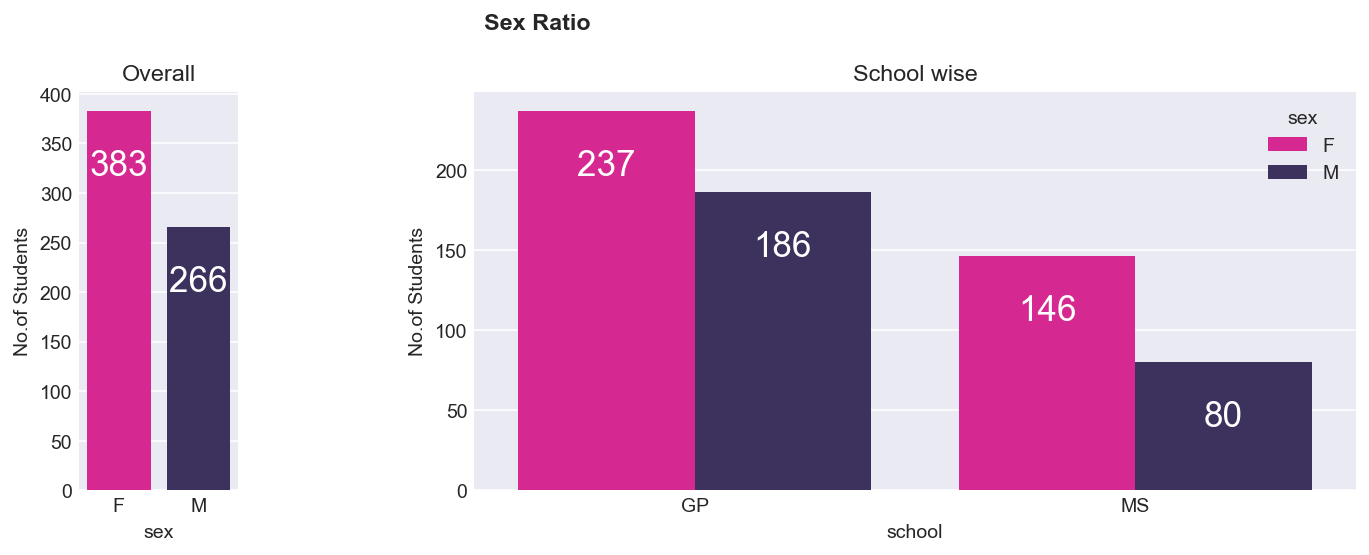

In [11]:
# Sex ratio

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
fig.suptitle("Sex Ratio", weight='bold')

sns.countplot(ax=ax1,data=df,x='sex',palette=['#f20b97','#392a64'])
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)
ax1.set_box_aspect(5/len(ax1.patches))
ax1.set_title("Overall")
ax1.set_ylabel("No.of Students")

sns.countplot(ax=ax2,data=df,x='school',hue='sex',palette=['#f20b97', '#392a64'])
for p in ax2.patches:
    ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
ax2.set_title("School wise")
ax2.set_ylabel("No.of Students")

plt.tight_layout()
plt.show()

- Over all number of female students were higher in both the schools.

Let's see age wise student distribution

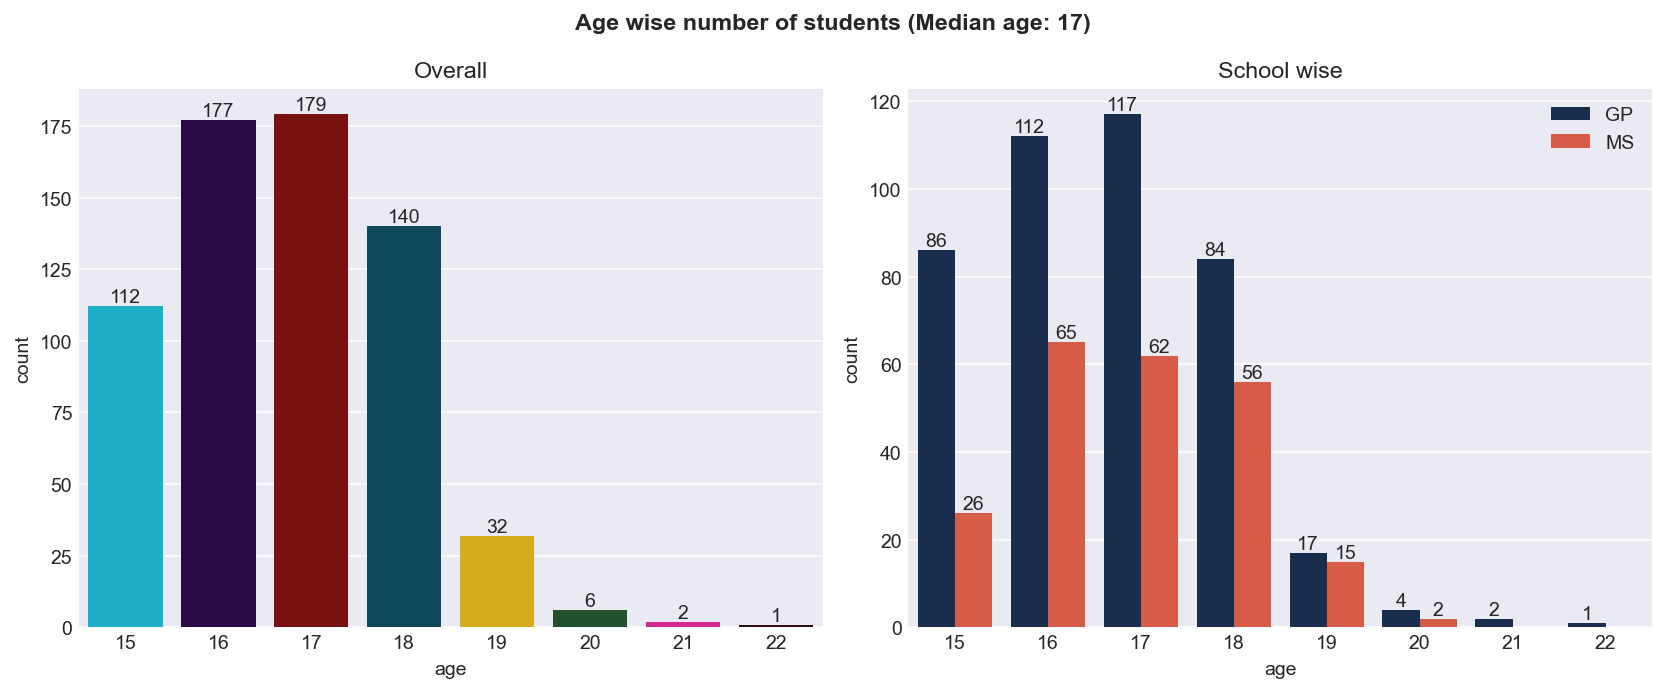

In [12]:
# Age wise number of students

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Age wise number of students (Median age: {})".format(int(df.age.median())), weight='bold')

sns.countplot(ax=ax[0], data=df, x='age', palette=['#00c3e4', '#2b0050','#8a0000','#004e68','#f1bf00','#19592c', '#f20b97', '#370b0b'])
for i in ax[0].containers:
    ax[0].bar_label(i)
ax[0].set_title("Overall")

sns.countplot(data=df, x='age', hue='school', ax=ax[1], palette=['#102c56', '#ef4b30'])
for i in ax[1].containers:
    ax[1].bar_label(i)
ax[1].set_title("School wise")
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

- from the above bar plots we can see that highest number of students were of 17 years old.
- However, number of 16 year old students were also nearly equal to number of students of 17 years old.
- Gabriel Periera had highest number students from 17 years old followed by 16 years old, then 15, and 18.
- In Mousinho da Silveira secondary school, highest number of students were of 16 years old.
- Overall average (median) age is 17.
- In Gabriel Periera students age ranged in between 15 to 22 where as in Mousinho da Silveira the age range is only in between 15 to 20.

- only 3 students in Gabriel periera were from upper age i.e. 2 from 21 and 1 from 22.



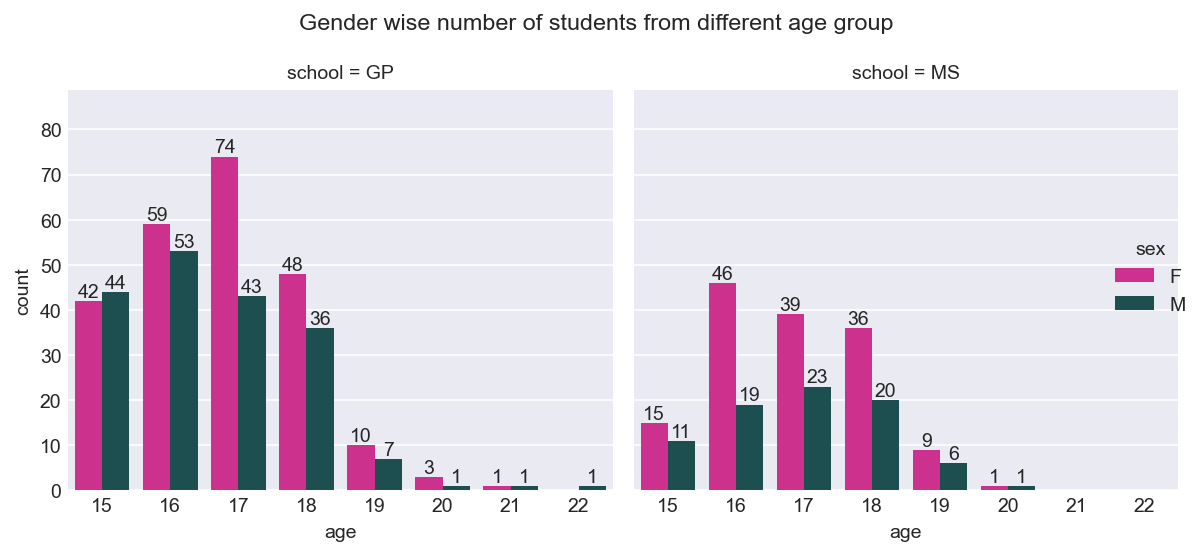

In [13]:
# Gender wise Number of students from different age group
g = sns.catplot(data=df, x='age', col='school', hue='sex',kind='count', palette=['#e41892', '#145759'], height=4, aspect=1)
g.fig.suptitle('Gender wise number of students from different age group')

for ax in g.axes.ravel():
    for c in ax.containers:
        labels = ["{}".format(v.get_height()) for v in c]
        ax.bar_label(c)
    ax.margins(y=0.2)

plt.tight_layout()
plt.show()

In [14]:
# Gender wise average age

median_age = pd.crosstab(columns=df.school, index=df.sex, values =df.age, aggfunc=['median'])
median_age

median    
school     GP  MS
sex              
F          17  17
M          16  17

In [15]:
gp_school = df[df['school']=='GP']
ms_school = df[df['school']=='MS']

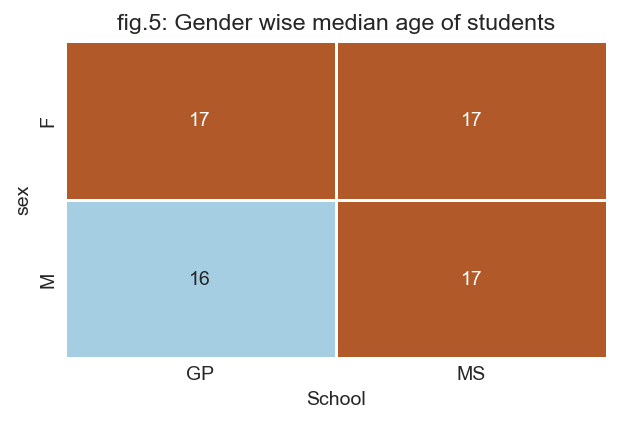

In [16]:
# Average age of students
fig, ax= plt.subplots(figsize=(5,3))
ax = sns.heatmap(median_age, annot=True, linewidth=0.7, cmap='Paired', cbar=False, xticklabels=['GP','MS'])
plt.title("fig.5: Gender wise median age of students")
plt.xlabel('School')
#ax.set_xticks([0,1],['GP','MS'])
plt.show()

<a id='reason-of-choosing-school'></a>

### Reason of choosing school

-----

In [17]:
reason_of_choosing_school = pd.crosstab(df.reason, df.school)
reason_of_choosing_school

school       GP   MS
reason              
course      167  118
home        115   34
other        27   45
reputation  114   29

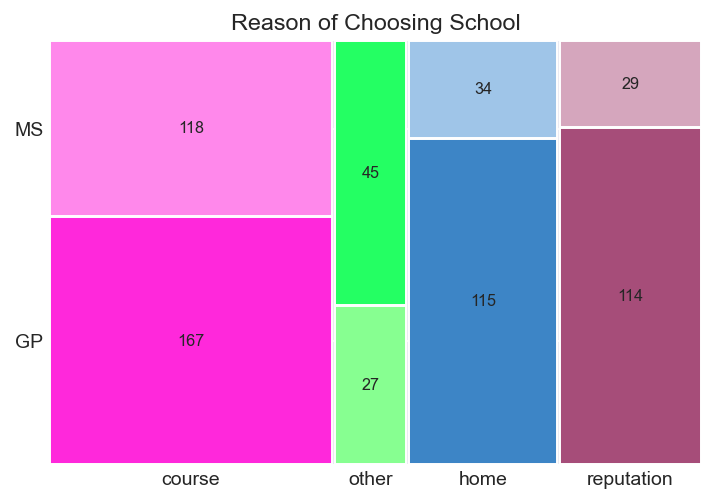

In [18]:
# Reason of choosing school
properties = {}
properties[('course', 'MS')] = dict(facecolor='#ff88eb', edgecolor='white')
properties[('course', 'GP')] = dict(facecolor='#ff28db', edgecolor='white')
properties[('other','MS')] = dict(facecolor='#24ff63', edgecolor='white')
properties[('other','GP')] = dict(facecolor='#87ff91', edgecolor='white')
properties[('home','MS')] = dict(facecolor='#9fc5e8', edgecolor='white')
properties[('home','GP')] = dict(facecolor='#3d85c6', edgecolor='white')
properties[('reputation','MS')] = dict(facecolor='#d5a6bd', edgecolor='white')
properties[('reputation','GP')] = dict(facecolor='#a64d79', edgecolor='white')


labels = lambda k: {
    ('course', 'MS') : reason_of_choosing_school.loc['course','MS'],
    ('course','GP') : reason_of_choosing_school.loc['course','GP'],
    ('other', 'MS'): reason_of_choosing_school.loc['other','MS'],
    ('other', 'GP'): reason_of_choosing_school.loc['other','GP'],
    ('home', 'MS'): reason_of_choosing_school.loc['home','MS'],
    ('home', 'GP'): reason_of_choosing_school.loc['home','GP'],
    ('reputation', 'MS') : reason_of_choosing_school.loc['reputation','MS'],
    ('reputation', 'GP') : reason_of_choosing_school.loc['reputation','GP']
}[k]


mosaic(df, ['reason','school'], properties=properties, labelizer=labels, title='Reason of Choosing School')
plt.show()

- Most students had joined for curriculum of the schools.

- However Gabriel Pereira had more reputation than Mousinho da silveira, as comparatively more number of students had joined Gabriel Pereira than Mousinho da Silveira.

- Now lets check locality wise which school has more number of students
 

In [19]:
# how many students from which area belongs to shools
address_school_count = pd.crosstab(df.school, df.address)
address_school_count

address    R    U
school           
GP        78  345
MS       119  107

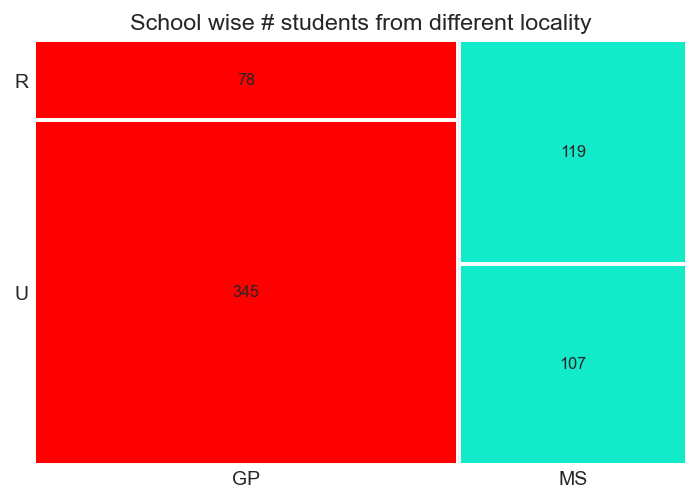

In [20]:
# Locality wise number of students
properties = {}
properties[('GP','R')] = {'facecolor':'red', 'edgecolor':'white'}
properties[('GP','U')] = {'facecolor':'red', 'edgecolor':'white'}
properties[('MS','R')] = {'facecolor':'xkcd:aqua', 'edgecolor':'white'}
properties[('MS','U')] = {'facecolor':'xkcd:aqua', 'edgecolor':'white'}

labels = lambda k: {
    ('GP','R'):address_school_count.loc['GP','R'], 
    ('GP','U'):address_school_count.loc['GP','U'],
    ('MS','R'):address_school_count.loc['MS','R'],
    ('MS','U'):address_school_count.loc['MS','U']}[k]

mosaic(df, ['school','address'], labelizer=labels, properties=properties, 
    title="School wise # students from different locality",)
plt.show()

- Gabriel Periera had more number of students from Urban area. The school had only 78 students from rural area.

- Mousinho da Silveira had comparatively only a few students were from rural area. 

- However most number of students are from rural area in Mousinho da Silveira. 

**Was Mousinho da Silveira a school in rural or semi-urban area?**

- This can be confirmed from travel time. 

- As the travel time for urban students should be longer than rural people. Otherwise number of students should be more.

In [21]:
# differentiating rural and urban students of Mousinho da Silveira
rural_ms = df[(df['school']=='MS') & (df['address']=='R')]
urban_ms = df[(df['school']=='MS') & (df['address']=='U')]

# differentiating rural and urban students of GP
rural_gp = df[(df['school']=='GP') & (df['address']=='R')]
urban_gp = df[(df['school']=='GP') & (df['address']=='U')]

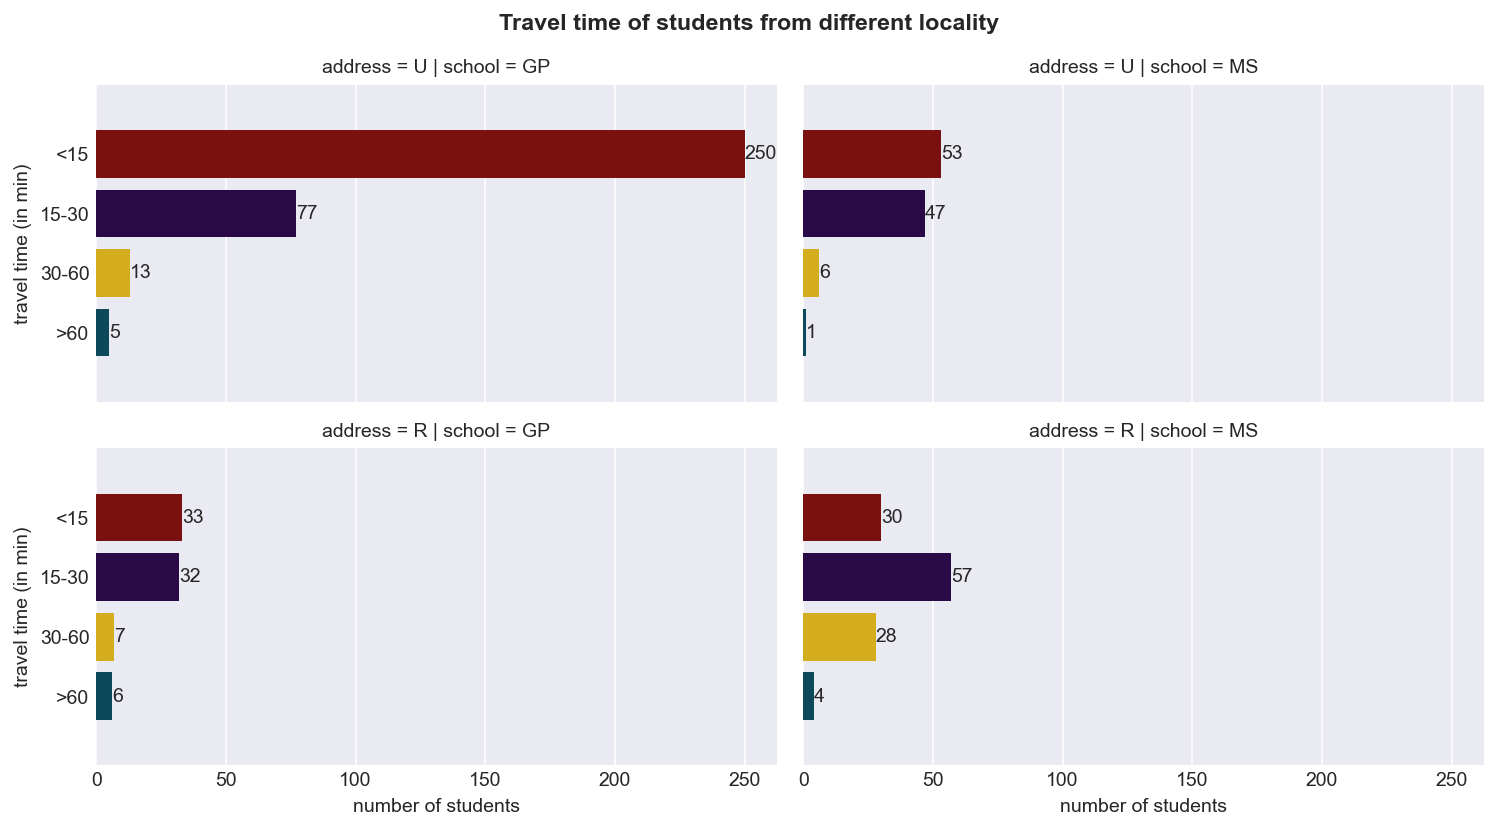

In [22]:
# Travel time of students

g = sns.catplot(
    data=df, 
    y='traveltime', 
    col='school', 
    row='address', 
    kind='count', 
    height=3, 
    aspect=1.8,
    palette=['#8a0000','#2b0050','#f1bf00','#004e68']
)
g.fig.suptitle("Travel time of students from different locality", weight='bold')
g.set_axis_labels('number of students', 'travel time (in min)')
g.set_yticklabels(['<15', '15-30', '30-60', '>60'])

for ax in g.axes.ravel():
    for c in ax.containers:
        labels = ["{}".format(v.get_height()) for v in c]
        ax.bar_label(c)
    ax.margins(y=0.2)

plt.tight_layout()
plt.show()

- Upper-left plot of Fig.8 shows that in Gabriel Pereiera 250 students had travel time less than 15 minutes, whereas upper-right plot shows in case of Mousinho da Silveira school had just 53 students with travel time less than 15 min from urban background.

- This observation claims that Gabriel Pereiera was nearly situated to urban area.

- Comparison of both the upper plots shows that only 7 students of Mousinho da Silveira had travel time more than 30 minutes (6 30-60 and 1 > 60), where as in Gabriel Pereira 18 students had travel time more than 30 minutes.

- This observation claims that Mousinho da Silveira is also close to urban area as there is less students with longer travel time.

- But the lower plots shows that in Mousinho da Silveira highest rural students had a travel time of 15 - 30 minutes. which does not agree with the claim that Mousinho da Silveira is closer to urban area.

- For rural people students travel time is longer, this may be due to poor transportation system. 

However, all this claims can be confirmed by checking the reason of joining the school.

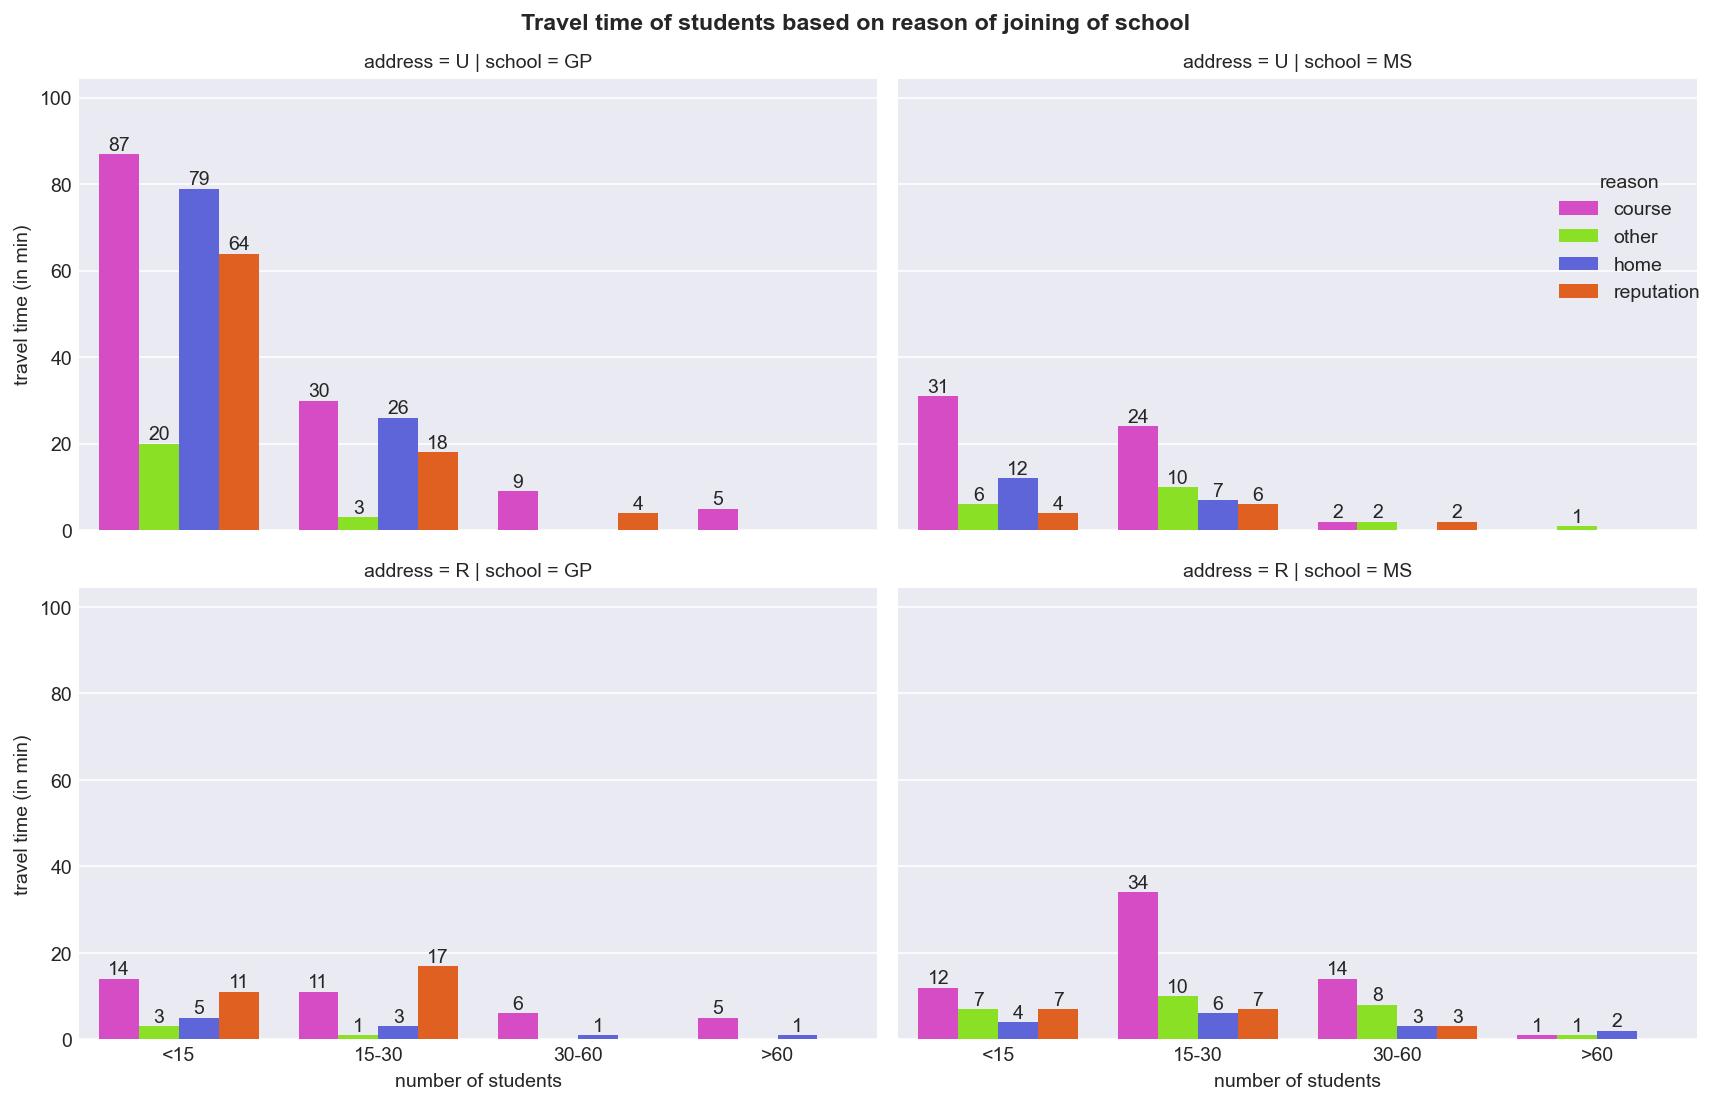

In [23]:
# Travel time of students based on reason of Joining of School
g = sns.catplot(
    data=df, 
    x='traveltime', 
    col='school', 
    row='address', 
    kind='count', 
    hue='reason',
    height=4, 
    aspect=1.4,
    palette=['#ed35d6','#8dff06','#4853ed','#ff5500'],
)
g.fig.suptitle("Travel time of students based on reason of joining of school", weight='bold')
g.set_axis_labels('number of students', 'travel time (in min)')
g.set_xticklabels(['<15', '15-30', '30-60', '>60'])

for ax in g.axes.ravel():
    for c in ax.containers:
        labels = ["{}".format(v.get_height()) for v in c]
        ax.bar_label(c)
    ax.margins(y=0.2)


plt.tight_layout()
sns.move_legend(g, "center right",bbox_to_anchor=(1, 0.78))
plt.show()

- In Fig.9 the upper two figures shows that in Gabriel Pereira most urban students had enrolled due to school's course curriculum followed by near to home, then reputation.

- Urban students of Gabriel Pereira with longest travel time (more than 30 minutes) had joined for reputation and course, where as the same type students of Mousinho da Silveira had joined for reputation and other reasons.

- The lower plots of Fig.9 reveals that in case of rural students highest number of students had enrolled in Gabriel Pereira due to school's reputation. Whereas in case of Mousinho da Silveira the rural students had joined due to course curriculum.

- Fig.9 shows that among urban students Gabriel Pereira was popular for course curriculum, near to home, and reputation. Whereas Mousinho da Silveira was popular among rural students for course curriculum and other reasons.

<a id='success-rate-of-both-the-schools'></a>

### Success rate of both the schools

-----

Success rate of a school depends on its students' performance. Let's see how both the school are performing.


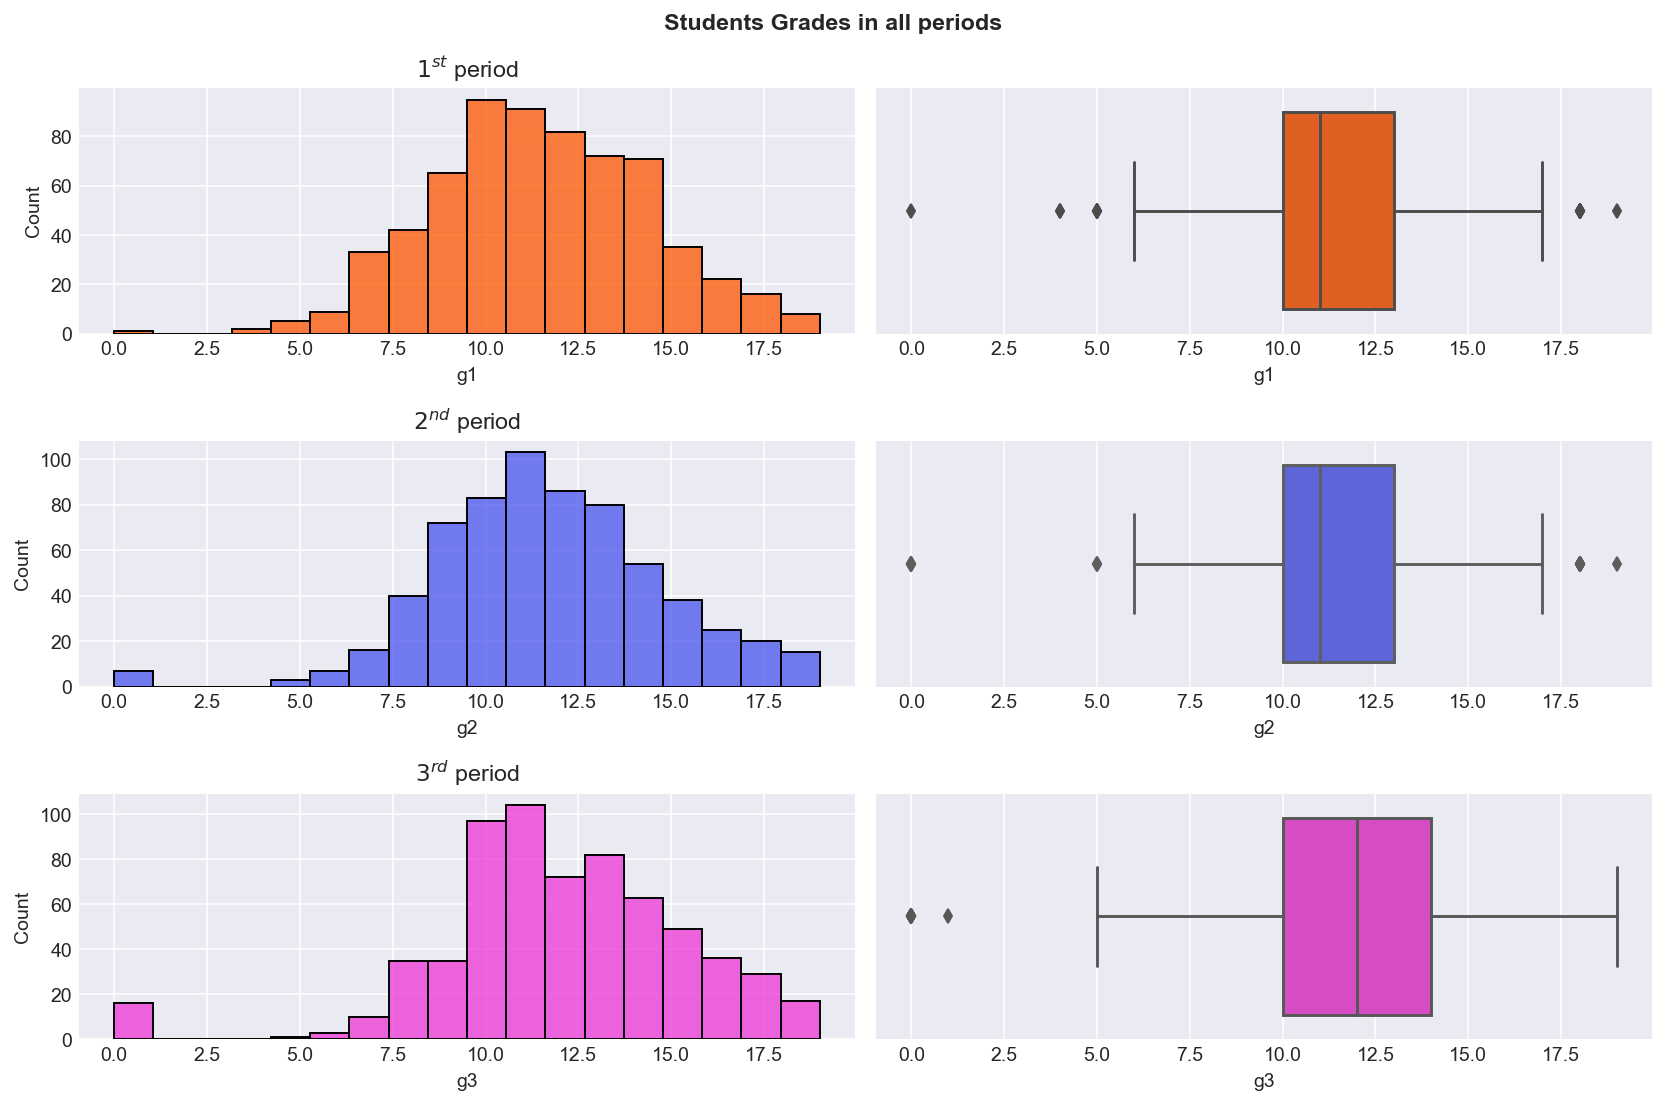

In [24]:
# Students grade in each period
fig, ax=plt.subplots(3,2, figsize=(12,8))
fig.suptitle('Students Grades in all periods', weight='bold')

sns.histplot(ax=ax[0,0], data=df, x='g1', color='#ff5500', label='1st period', bins=18)
sns.boxplot(ax=ax[0,1], data=df, x='g1', color='#ff5500')
ax[0,0].set_title('$1^{st}$ period')

sns.histplot(ax=ax[1,0], data=df, x='g2', color='#4853ed', label='2nd period', bins=18)
sns.boxplot(ax=ax[1,1], data=df, x='g2', color='#4853ed')
ax[1,0].set_title('$2^{nd}$ period')

sns.histplot(ax=ax[2,0], data=df, x='g3', color='#ed35d6', label='3rd period', bins=18)
sns.boxplot(ax=ax[2,1], data=df, x='g3', color='#ed35d6')
ax[2,0].set_title('$3^{rd}$ period')

plt.tight_layout()
plt.show()

_fig.10: Student's grade in all periods: hist plots shows overall distribution with count, whereas box plots show in detail distribution to check outliers. Here outliers mean extraordinary students if the outlier lies on right side, else failures._

- From the histograms it is clear that the grades follow normal distribution for first and second period.

- Box plots reveals that average grade of first and second period is around 11, whereas for third period average grade is at 12.5, which is a good indication that students are improving. 

- But, the histogram of 3rd period grades have large volume at 0 in comparison to other two periods. More number of students also had secured 0 marks.

Lets check which school is performing well

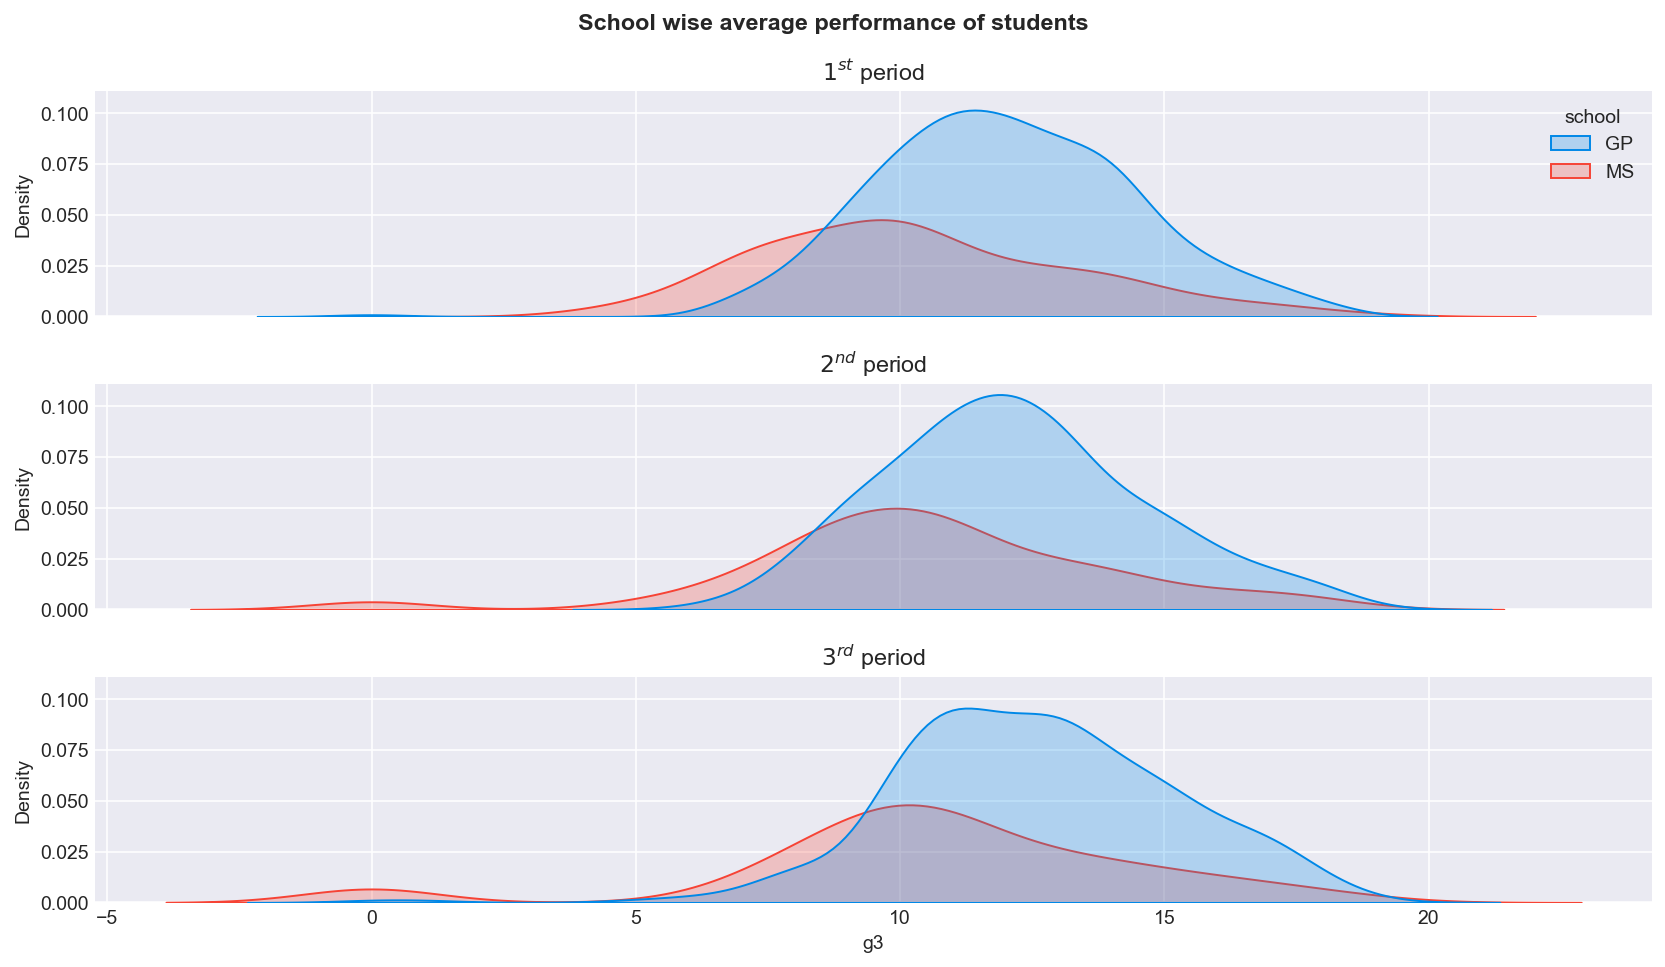

In [25]:
# Average performance of students in each period
fig, ax = plt.subplots(3,1, figsize=(12,7), sharex=True, sharey=True)
fig.suptitle("School wise average performance of students", weight='bold')

sns.kdeplot(data=df, x='g1', palette=['#0088e7', '#f64335'], hue='school', shade=True,ax=ax[0])
ax[0].set_title('$1^{st}$ period')

sns.kdeplot(data=df, x='g2', palette=['#0088e7', '#f64335'], hue='school', shade=True, legend=False ,ax=ax[1])
ax[1].set_title('$2^{nd}$ period')

sns.kdeplot(data=df, x='g3', palette=['#0088e7', '#f64335'], hue='school', shade=True, legend=False, ax=ax[2])
ax[2].set_title('$3^{rd}$ period')

plt.tight_layout()
plt.show()

_Fig11 shows the school wise overall performance of students in all three periods. Blue color indicates Gabriel Pereire and Red color indicates students of Mousinho da Silveira._

- Students of Gabriel Pereire performed well than students of Mousinho da Silveira.

- More numbers of students with zero marks are in Mousinho da Silveira than Gabriel Pereire.

<a id='grading-system-in-Portuguese-schools'></a>

### Grading System in Portuguese Schools:

----

Postuguese schools follows a grading system of 0-20. Where pass mark is 10 [5](https://www.studyineurope.eu/study-in-portugal/grades).

|Marks|Grade|   |
|-----|-----|---|
|20-18|A|Excellent|
|17-16|B|Very good|
|15-14|C|Good|
|13-12|D|Satisfactory|
|10-11|E|Sufficient|
|<10|F|Fail|

In Portuguese schooling system, students are evaluated in three periods whereas last period marks evaluates a student's grade.

In this project we will assign grades to all three periods based on the above table to check how student's are improving.

In [26]:
# Grades
student = df.copy()

# first period
student['grade1'] = student.g1.apply(lambda x: 'excellent' if x >= 18 else 'very good' if x >= 16 else 'good' if x >= 14 else 'satisfactory' if x >= 12 else 'sufficient' if x >= 10 else 'fail')

# second period
student['grade2'] = student.g2.apply(lambda x: 'excellent' if x >= 18 else 'very good' if x >= 16 else 'good' if x >= 14 else 'satisfactory' if x >= 12 else 'sufficient' if x >= 10 else 'fail')

# 3rd Period
student['grade3'] = student.g3.apply(lambda x: 'excellent' if x >= 18 else 'very good' if x >= 16 else 'good' if x >= 14 else 'satisfactory' if x >= 12 else 'sufficient' if x >= 10 else 'fail')

student.head(10)

school sex  age address famsize pstatus  medu  fedu      mjob      fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother           2          2         0       yes     no   no   
1      course   father           1          2         0        no    yes   no   
2       other   mother           1          2         0       yes     no   no   
3        home   mother           1          3         0        no    yes   no   
4        home   father           1          2         0        no    yes   no   
5  reputation   mother           1          2         0        no    yes   no   
6        home   mother           1          2         0        no     no   no   
7        home   mother           2          2         0       yes    yes   no   
8        home   mother           1          2         0        no    yes   no   
9        home   mother           1          2         0        no    yes   no   

  activities nursery higher internet romantic  famrel  freetime  goout  dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   
5        yes     yes    yes      yes       no       5         4      2     1   
6         no     yes    yes      yes       no       4         4      4     1   
7         no     yes    yes       no       no       4         1      4     1   
8         no     yes    yes      yes       no       4         2      2     1   
9        yes     yes    yes      yes       no       5         5      1     1   

   walc  health  absences  g1  g2  g3        grade1        grade2  \
0     1       3         4   0  11  11          fail    sufficient   
1     1       3         2   9  11  11          fail    sufficient   
2     3       3         6  12  13  12  satisfactory  satisfactory   
3     1       5         0  14  14  14          good          good   
4     2       5         0  11  13  13    sufficient  satisfactory   
5     2       5         6  12  12  13  satisfactory  satisfactory   
6     1       3         0  13  12  13  satisfactory  satisfactory   
7     1       1         2  10  13  13    sufficient  satisfactory   
8     1       1         0  15  16  17          good     very good   
9     1       5         0  12  12  13  satisfactory  satisfactory   

         grade3  
0    sufficient  
1    sufficient  
2  satisfactory  
3          good  
4  satisfactory  
5  satisfactory  
6  satisfactory  
7  satisfactory  
8     very good  
9  satisfactory

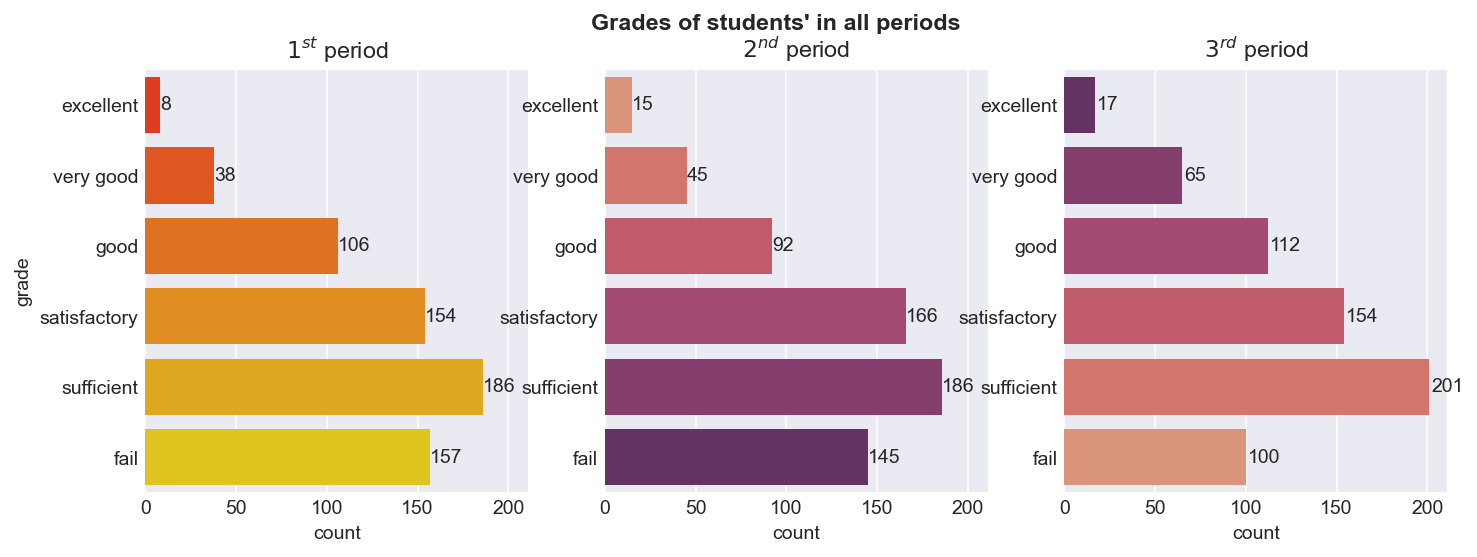

In [27]:
# Grades of students in all periods

fig, ax = plt.subplots(1,3, figsize=(12,4), sharex = True)
fig.suptitle("Grades of students' in all periods", weight='bold')

sns.countplot(y='grade1', data=student, order = ['excellent', 'very good', 'good', 'satisfactory', 'sufficient', 'fail'], ax=ax[0], palette='autumn')
ax[0].set_title("$1^{st}$ period")
ax[0].set_ylabel('grade')
for i in ax[0].containers:
    ax[0].bar_label(i)

sns.countplot(y='grade2', data=student, order = ['excellent', 'very good', 'good', 'satisfactory', 'sufficient', 'fail'], ax=ax[1], palette='flare')
ax[1].set_title("$2^{nd}$ period")
ax[1].set_ylabel('')
for i in ax[1].containers:
    ax[1].bar_label(i)

sns.countplot(y='grade3', data=student, order = ['excellent', 'very good', 'good', 'satisfactory', 'sufficient', 'fail'], ax=ax[2], palette='flare_r')
ax[2].set_title("$3^{rd}$ period")
ax[2].set_ylabel('')
for i in ax[2].containers:
    ax[2].bar_label(i, padding=1)

plt.show()

- In first period there were just 8 students performed excellent where as 157 in total had failed. 

- In second period count of excellent performers increased to 15 and number of failed students decreased to 135.

- Number of excellent performers didn't increase significantly however number of failed students decreased. Count of sufficient grade students and very good performers had also increased.

- Overall students are improving.

It's time to check school wise grades.


In [28]:
GP_school = student[student.school == 'GP']
MS_school = student[student.school == 'MS']

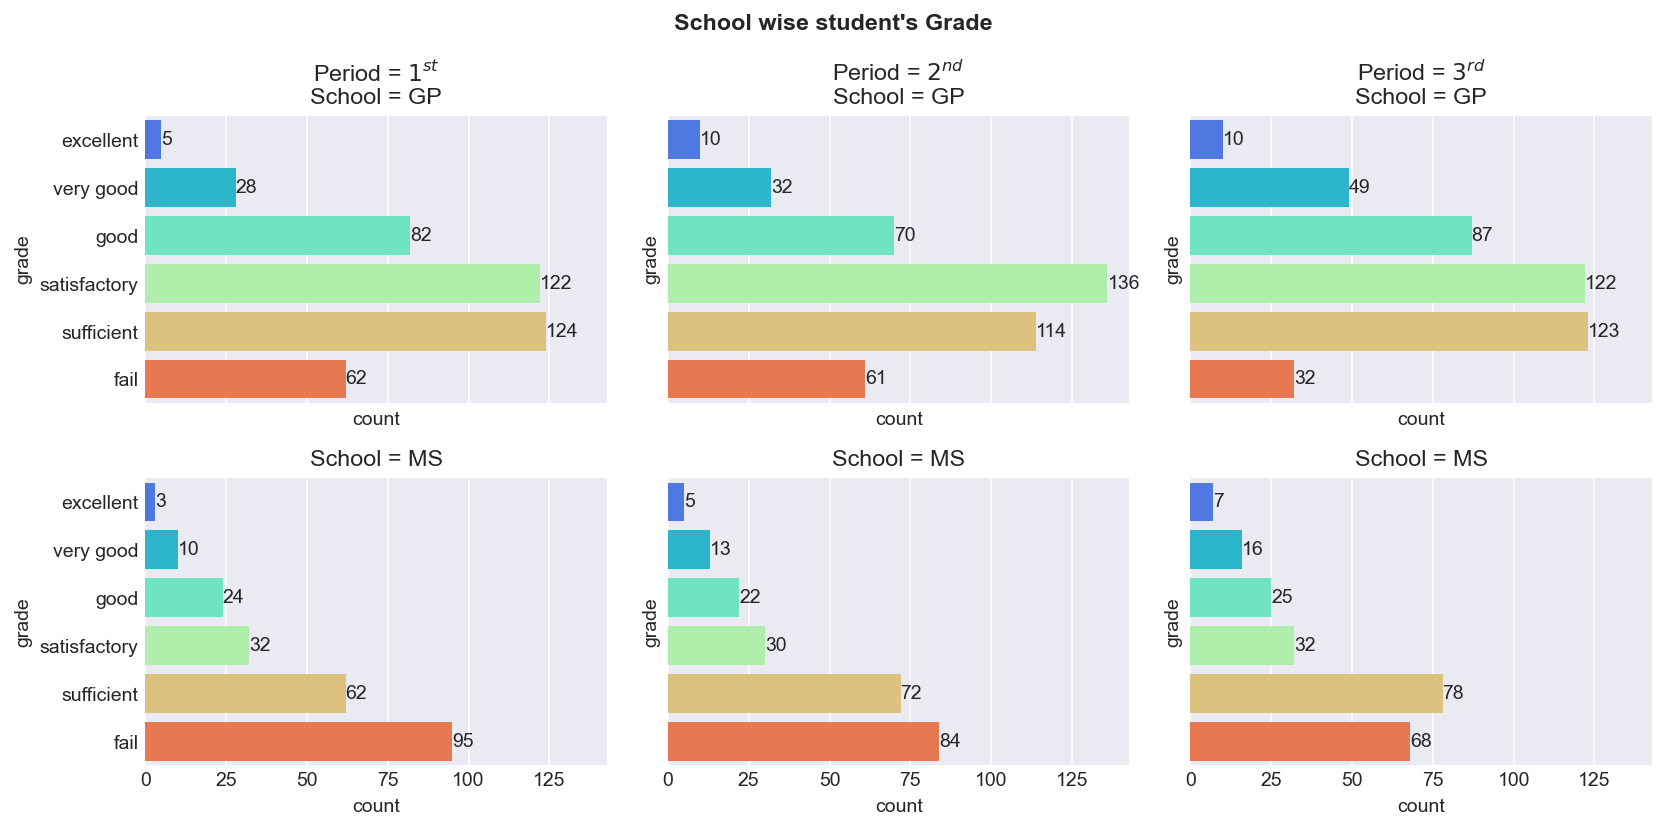

In [29]:
# School wise grades of students

fig, ax = plt.subplots(2,3, figsize=(12,6), sharex = True, sharey = True)
fig.suptitle("School wise student's Grade", weight='bold')

sns.countplot(data=GP_school, y='grade1', ax=ax[0,0], palette='rainbow', order = ['excellent', 'very good', 'good', 'satisfactory', 'sufficient', 'fail'])
ax[0,0].set_title("Period = $1^{st}$ \nSchool = GP")
ax[0,0].set_ylabel('grade')
for i in ax[0,0].containers:
    ax[0,0].bar_label(i)

sns.countplot(data=MS_school, y='grade1', ax=ax[1,0], palette='rainbow', order = ['excellent', 'very good', 'good', 'satisfactory', 'sufficient', 'fail'])
ax[1,0].set_title("School = MS")
ax[1,0].set_ylabel('grade')
for i in ax[1,0].containers:
    ax[1,0].bar_label(i)

sns.countplot(data=GP_school, y='grade2', ax=ax[0,1], palette='rainbow', order = ['excellent', 'very good', 'good', 'satisfactory', 'sufficient', 'fail'])
ax[0,1].set_title("Period = $2^{nd}$ \nSchool = GP")
ax[0,1].set_ylabel('grade')
for i in ax[0,1].containers:
    ax[0,1].bar_label(i)

sns.countplot(data=MS_school, y='grade2', ax=ax[1,1], palette='rainbow', order = ['excellent', 'very good', 'good', 'satisfactory', 'sufficient', 'fail'])
ax[1,1].set_title("School = MS")
ax[1,1].set_ylabel('grade')
for i in ax[1,1].containers:
    ax[1,1].bar_label(i)

sns.countplot(data=GP_school, y='grade3', ax=ax[0,2], palette='rainbow', order = ['excellent', 'very good', 'good', 'satisfactory', 'sufficient', 'fail'])
ax[0,2].set_title("Period = $3^{rd}$ \nSchool = GP")
ax[0,2].set_ylabel('grade')
for i in ax[0,2].containers:
    ax[0,2].bar_label(i)

sns.countplot(data=MS_school, y='grade3', ax=ax[1,2], palette='rainbow', order = ['excellent', 'very good', 'good', 'satisfactory', 'sufficient', 'fail'])
ax[1,2].set_title("School = MS")
ax[1,2].set_ylabel('grade')
for i in ax[1,2].containers:
    ax[1,2].bar_label(i)


plt.tight_layout()
plt.show()

_The bar plots show school wise number of students and their grades. The left column is grades of first period i.e. upper plot is of Gabriel Pereire school and lower one is Mousinho da Silveira. Similarly, middle column is of second period and right column is of 3rd period grades._

- Fifty percent of Students of Gabriel Pereire  who had failed in 1st Grade had passed in third period. But, from Mousinho da silveira only 27% failed students had qualified the final period.

- In Gabriel Pereire number of very good performer students had increased predominantly. The growth follows the order that sufficient achievers improved to good in second period and in final period some of them improved to very good.

- In case of Mousinho da Silveira students improved in an average manner.

Now we will check various factors that affects students performance and later we will check the facts that caused some students failure in all three periods.

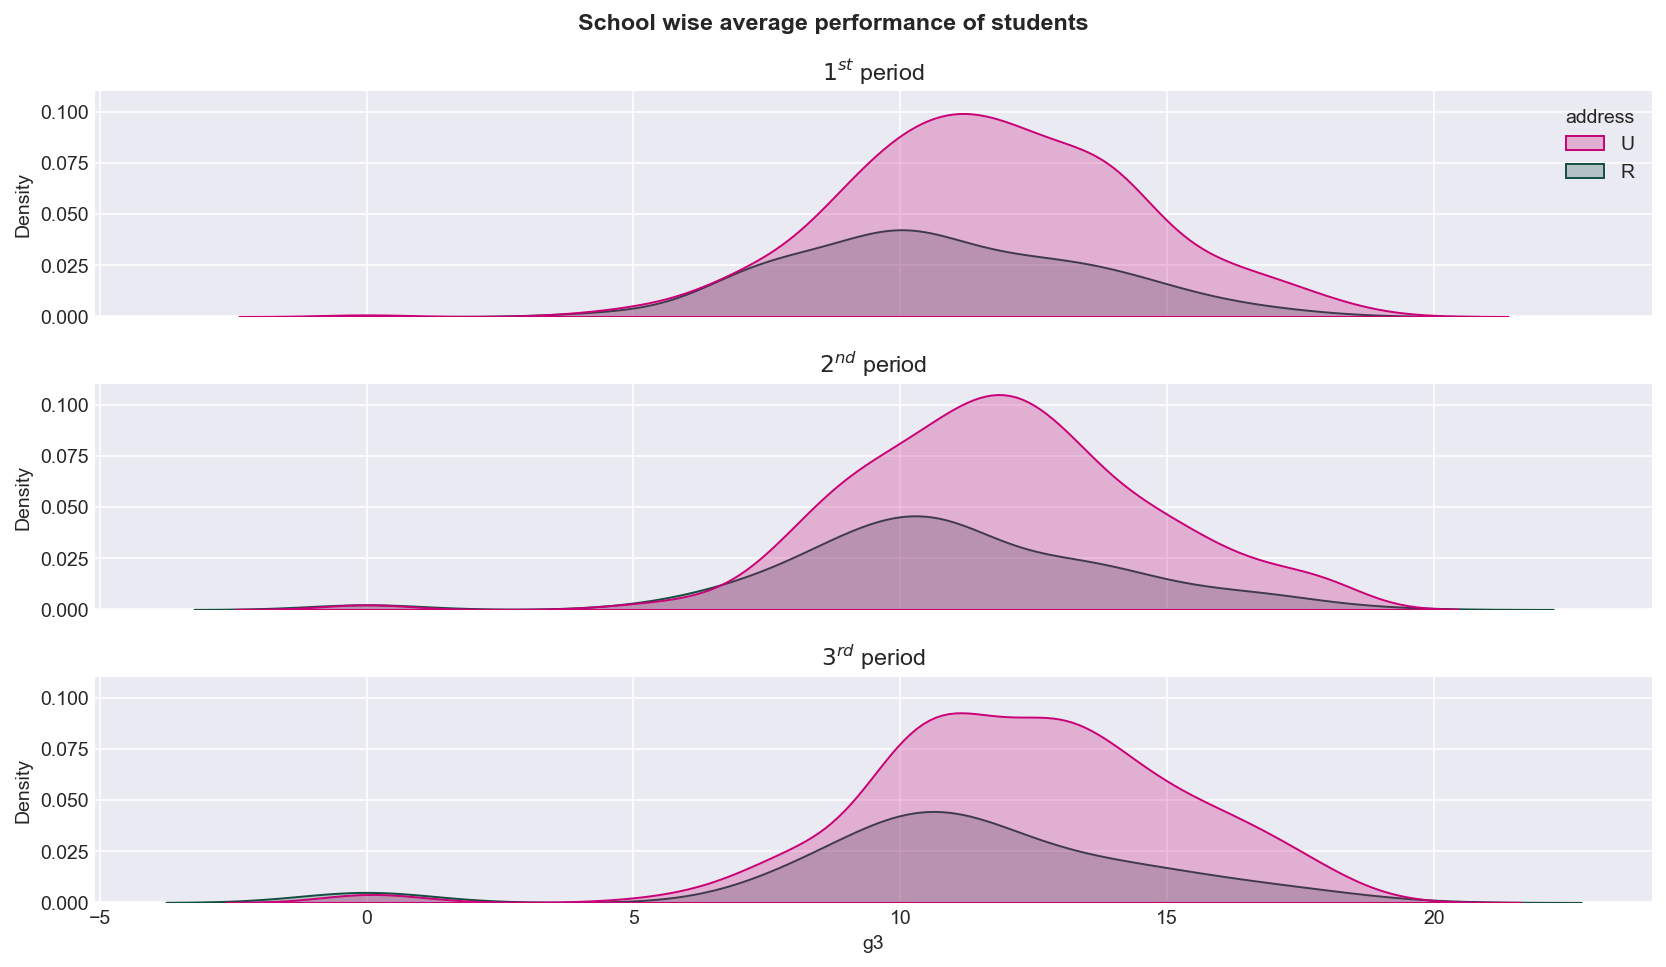

In [30]:
# Which locality students are performing better in?
fig, ax = plt.subplots(3,1, figsize=(12,7), sharex=True, sharey=True)
fig.suptitle("School wise average performance of students", weight='bold')

sns.kdeplot(data=df, x='g1', palette=['#c90076', '#134e40'], hue='address', shade=True,ax=ax[0])
ax[0].set_title('$1^{st}$ period')

sns.kdeplot(data=df, x='g2', palette=['#c90076', '#134e40'], hue='address', shade=True, legend=False ,ax=ax[1])
ax[1].set_title('$2^{nd}$ period')

sns.kdeplot(data=df, x='g3', palette=['#c90076', '#134e40'], hue='address', shade=True, legend=False, ax=ax[2])
ax[2].set_title('$3^{rd}$ period')

plt.tight_layout()
plt.show()

_Above density plots shows address wise distribution of students marks. where the deep pink shade refers to students from urban area and deep green shade refers to students from rural area._

- Urban area students had performed better than students from rural area.

- Rural students had also improved in third period than previous 2 periods.

In [31]:
# locality wise grades of students
locality_perf_g1 = df.groupby(['school','address','g1']).g1.count().unstack().fillna(0)
locality_perf_g2 = df.groupby(['school','address','g2']).g2.count().unstack().fillna(0)
locality_perf_g3 = df.groupby(['school','address','g3']).g3.count().unstack().fillna(0)

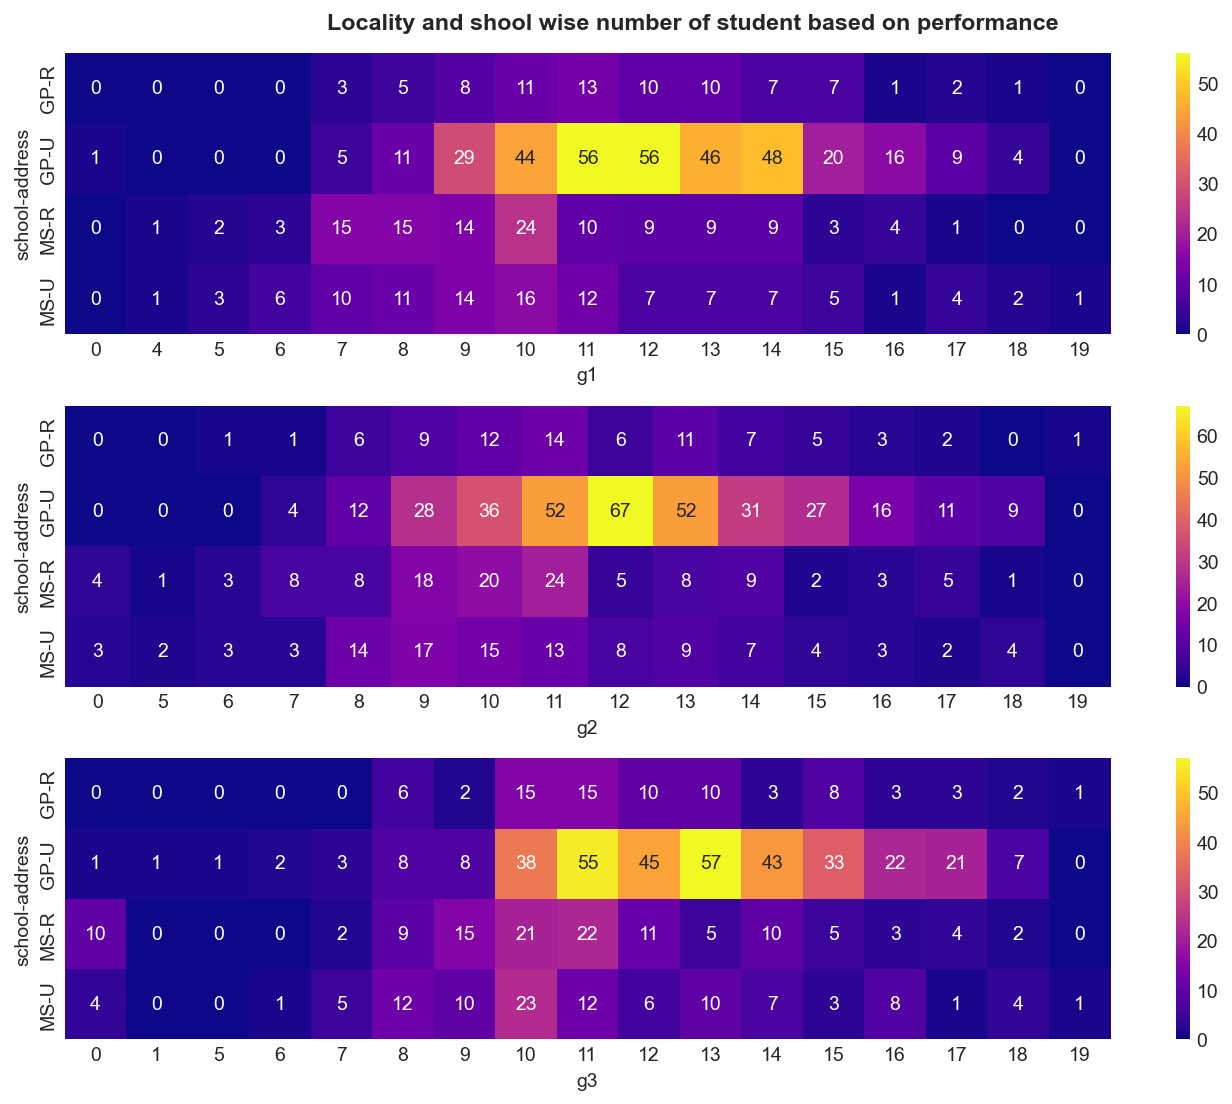

In [32]:
# locality wise grades of students
fig, ax = plt.subplots(3,1,figsize=(10,8), sharey=True, sharex=False)
fig.suptitle("Locality and shool wise number of student based on performance", weight='bold')

sns.heatmap(ax=ax[0],data=locality_perf_g1, annot=True, cmap='plasma')
plt.yticks(rotation=0)
sns.heatmap(ax=ax[1], data=locality_perf_g2, annot=True, cmap='plasma')
ax[1].set_yticks([0,1,2,3],rotation=0)
sns.heatmap(ax=ax[2], data=locality_perf_g3, annot=True, cmap='plasma')

plt.tight_layout()
plt.show()

_Above heatmaps shows locality wise number of students and their secured grades based on schools. First heatmap shows grades of first period, second heatmap second period, and consecutively last heatmap shows students performance in third period. The rows of a heatmap shows school and locality whereas columns denote the grades._

- In 1st period one student from urban areas failed in Gabriel Pereire school where as in second period in Mousinho da silveira school 4 students from rural area and 3 students from urban area had failed. That number increase to 10 and 4 in third period.

- In Gabriel Pereire performance of some students from urban area decreased in third period, but rural students average performance increase.

<a id='family-size'></a>

### Family size

----

In [33]:
fam_size_count = pd.crosstab(df.famsize, df.school)
fam_size_count

school    GP   MS
famsize          
GT3      301  156
LE3      122   70

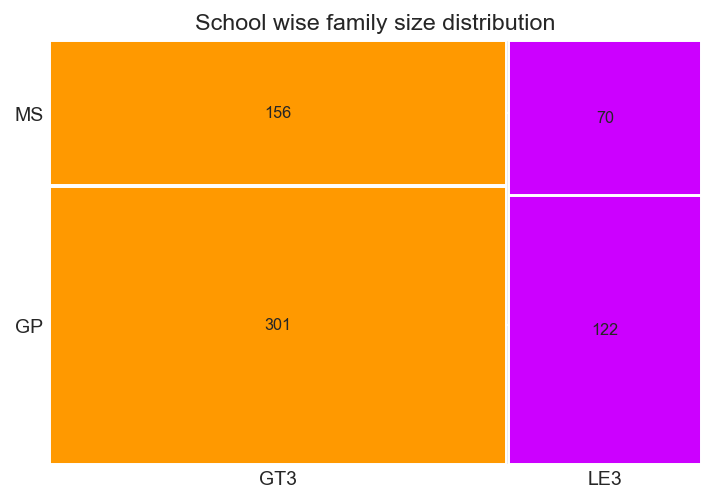

In [34]:
# Family size distribution
prop = {}
prop[('GT3','MS')] = dict(facecolor='#ff9900', edgecolor='white')
prop[('GT3','GP')] = dict(facecolor='#ff9900', edgecolor='white')
prop[('LE3','MS')] = dict(facecolor='#cc00ff', edgecolor='white')
prop[('LE3','GP')] = dict(facecolor='#cc00ff', edgecolor='white')

labels = lambda k: {
    ('GT3','MS'):fam_size_count.loc['GT3','MS'], 
    ('GT3','GP'):fam_size_count.loc['GT3','GP'],
    ('LE3','MS'):fam_size_count.loc['LE3','MS'],
    ('LE3','GP'):fam_size_count.loc['LE3','GP']}[k]
mosaic(df, ['famsize', 'school'], labelizer=labels,properties=prop, title='School wise family size distribution')

plt.show()

_School wise number of students from both family size type. On the x-axis lies family size, GT3 stands for greater than 3 and LE3 stands for less than equal to 3. y-axis shows both the schools._

- More number of students were from Gabriel Pereire than Mousinho da Silveira.

- In Gabriel Pereire the students ratio based on family size is 301: 122, where 122 students were from family size less than equal to 3, and 301 students were from family with more than 3 members.

- Similarly, the ratio of students from both the family sizes was 156:70. 156 students were from family size greater than 3 where as 70 students only were from family size less than equal to three.

**Was there any effect of family size on student's performance?**
Let's have a look

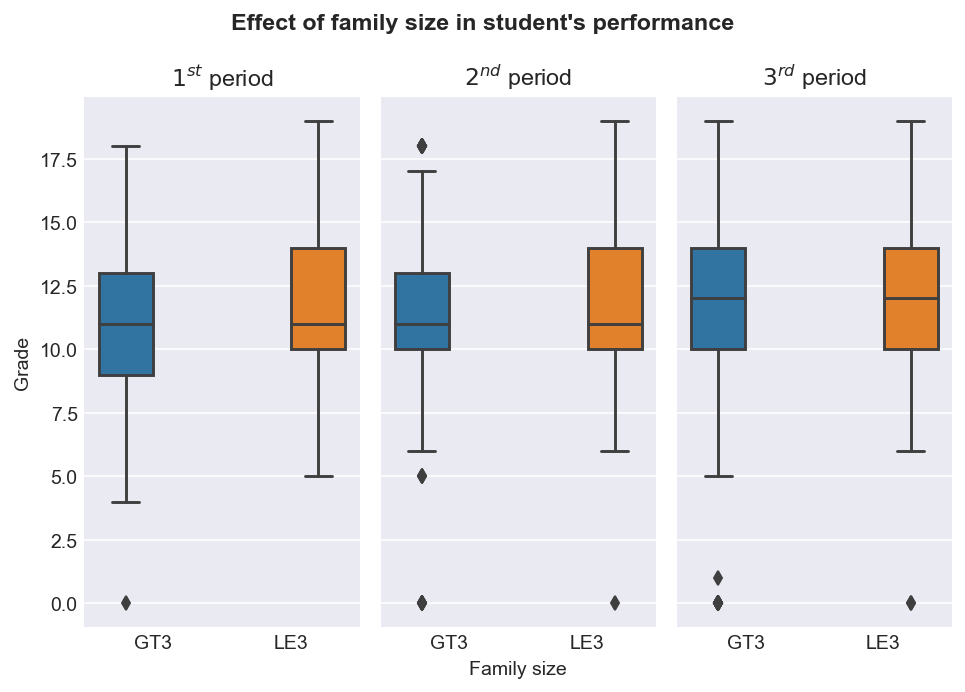

In [35]:
# Effect of family size on performance of students

fig, ax = plt.subplots(1,3,figsize=(7,5), sharey=True)
fig.suptitle("Effect of family size in student's performance", weight='bold')

sns.boxplot(data=df, y='g1',x='famsize',hue='famsize', ax=ax[0])
ax[0].set_title('$1^{st}$ period')
ax[0].get_legend().remove()
ax[0].set_ylabel("Grade")
ax[0].set_xlabel('')

sns.boxplot(data=df, y='g2', x='famsize', hue='famsize', ax=ax[1])
ax[1].set_title('$2^{nd}$ period')
ax[1].get_legend().remove()
ax[1].set_xlabel('Family size')
ax[1].set_ylabel('')

sns.boxplot(data=df, y='g3', x='famsize', hue='famsize', ax=ax[2])
ax[2].set_title('$3^{rd}$ period')
ax[2].get_legend().remove()
ax[2].set_ylabel('')
ax[2].set_xlabel('')

plt.tight_layout();

_The box plots show the effect of family size on student's grade. X-axis denotes family size, y-axis shows grades. The Family size GT3 means Greater than 3 and LE3 means Less than equal to three. First picture(from left) shows grades in 1st period, 2nd picture(middle one) shows grades in 2nd period, and the third figure(right one) shows grades in 3rd period._

- The figure 17 shows that the students belonged to a family with less than equal to three members ahad performed well in period 1 and 2. Most number of students lies in the upper side of the yellow box.OverflowError

- In period 3 all greater than students alsos performed well.

<a id='quality-of-relationship-with-family'></a>

### Quality of Relationship with Family

------------

- Family relationship affects students mentality, behavior and performance.

In [36]:
# unique values
df.famrel.unique()

array([4, 5, 3, 1, 2])

- Students family relationship column has 5 values from very bad to excellent.

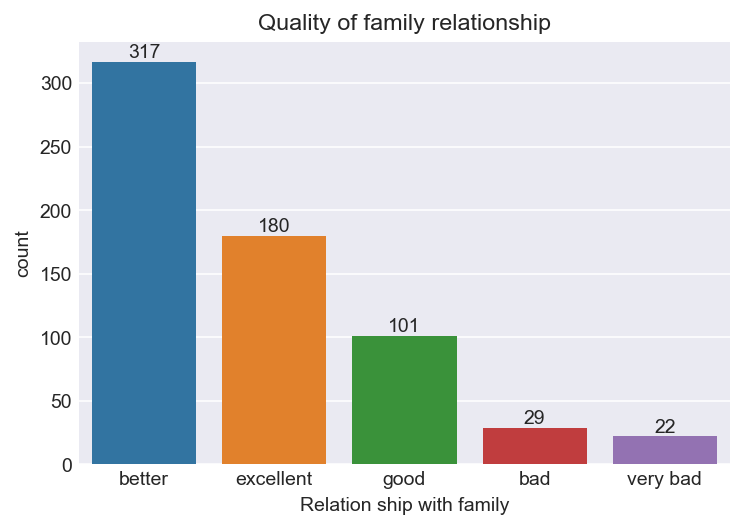

In [37]:
# Number of students based on family relationship
graph = sns.countplot(data=df, x='famrel', order=df.famrel.value_counts().index)
plt.title("Quality of family relationship")
plt.xlabel("Relation ship with family")
plt.bar_label(container=graph.containers[0], labels=df.famrel.value_counts().values)
plt.xticks([0,1,2,3,4],['better', 'excellent','good','bad', 'very bad'])
plt.show()

_Number of students as per their quality of relationship with family. The scale ranges from very bad to excellent._

- More number of students 317, had better relationship with family.

- Followed by 180 students with excellent relationship.

- Followed by 101 students with good relationship.

- Only 29 students had bad and 22 students had very bad relationship.

<a id='parents-cohabitation-status'></a>

### Parents cohabitation status:

---

In [38]:
df.pstatus.unique()

array(['A', 'T'], dtype=object)

- There are two categorical values for parental habitation status i.e. Apart and Together.

Let's check in more detail.


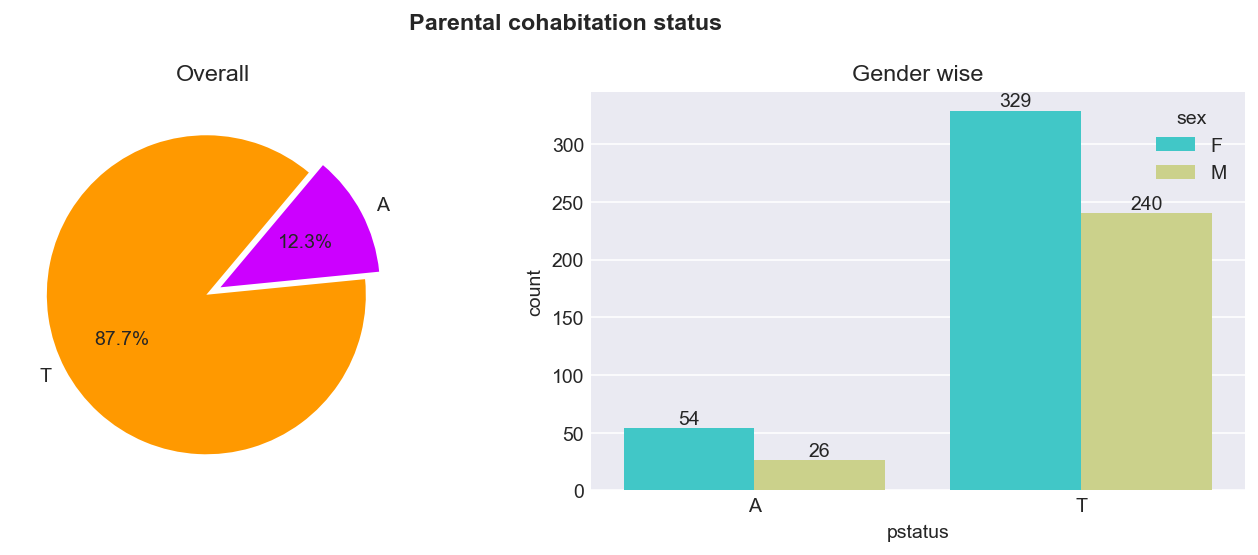

In [39]:
# Co-habitation status of parents


fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle("Parental cohabitation status", weight='bold')

plt.subplot(1,2,1)
pie = df.pstatus.value_counts().plot(kind='pie', autopct='%1.1f%%',colors=['#ff9900', '#cc00ff'], startangle=50, explode=(0.05,0.05))
pie.set_title('Overall')
plt.ylabel('')

plt.subplot(1,2,2)
bar = sns.countplot(data=df, x='pstatus', hue='sex', palette='rainbow')
plt.title('Gender wise')
for i in bar.containers:
    bar.bar_label(i)

plt.tight_layout()
plt.show()

_In the above plots, the pie chart reveals the overall number of students based on their parent's cohabitation status. The bar plot (count plots) differentiates students based on their parental status gender wise._

- Only 12.3% students parents were staying apart. Out of these, 54 were girls and 26 were boys.

- This data can be helpful later when we check effect of parental status on students marks.

<a id='Parents education'></a>

### Parents education

-----

Students education and performance doesn't always depend on parents education. But, parents economical status helps children to pursue higher education. This directly or indirectly affects students performance in student time.

In [40]:
# mothers education
df.medu.unique()

array([4, 1, 3, 2, 0])

In [41]:
# father's education
df.fedu.unique()

array([4, 1, 2, 3, 0])

There are five types of education in both father 'fedu' and mother education 'medu' column i.e. nill, primary ($4^{th}$ grade), upper primary ($5^{th}$ to $9^{th}$ grade), secondary, and higher education.

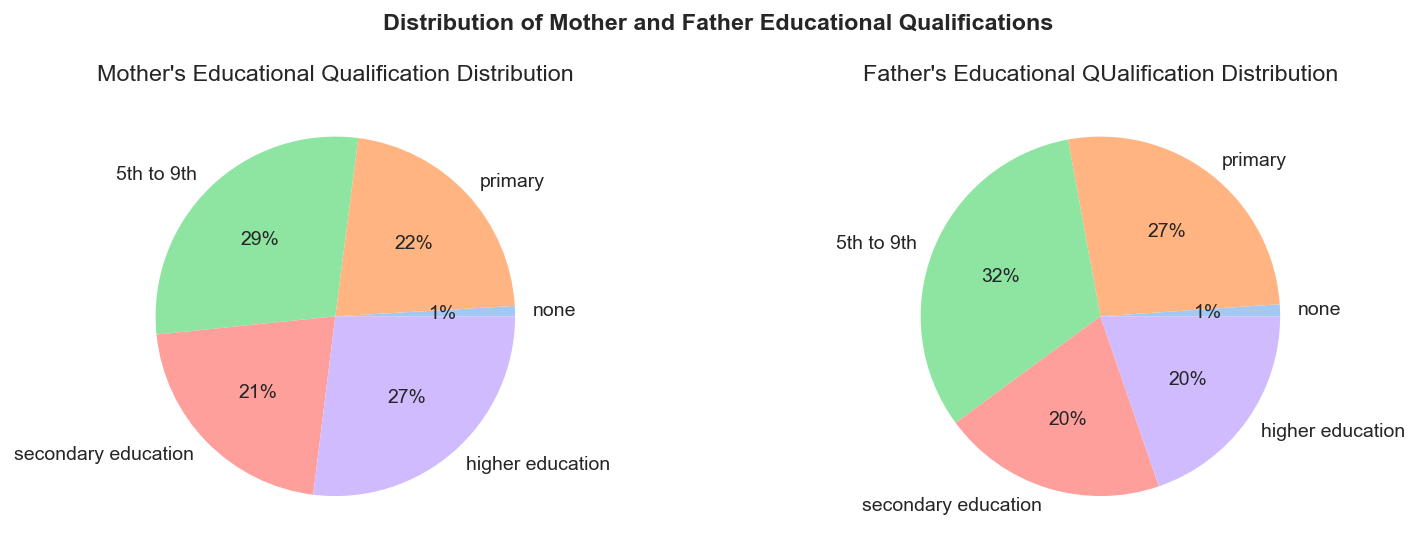

In [42]:
# Parents education distribution

mom_edu_data=df.groupby(['medu'])['medu'].count()
dad_edu_data=df.groupby(['fedu'])['fedu'].count()
fig ,ax=plt.subplots(1,2,figsize=(12,4))
labels=['none','primary','5th to 9th','secondary education','higher education']
colors = sns.color_palette('pastel')[0:5]
ax[0].pie(mom_edu_data.values,labels=labels,colors=colors,autopct='%.0f%%')
ax[1].pie(dad_edu_data.values,labels=labels,colors=colors,autopct='%.0f%%')
fig.suptitle("Distribution of Mother and Father Educational Qualifications",weight='bold')
ax[0].set_title("Mother's Educational Qualification Distribution")
ax[1].set_title("Father's Educational QUalification Distribution")
plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.7, 
                    wspace=0.4, 
                    hspace=0.4)
plt.tight_layout()
plt.show()

_The above pie charts show the distribution of parents qualification in dataset. The left side pie chart is mother's education with percentage, and right side pie chart is father's education._

- 29% mothers and 32% fathers had studied till 5th to 9th.

- More numbers of mothers had higher education than fathers.

We can see more in detail in next figure.

In [43]:
# Student wise parents education distribution
fedu_medu = pd.crosstab(df.fedu, df.medu)
fedu_medu

medu  0   1    2   3   4
fedu                    
0     1   5    0   0   1
1     2  92   52  20   8
2     3  36  101  42  27
3     0   8   25  54  44
4     0   2    8  23  95

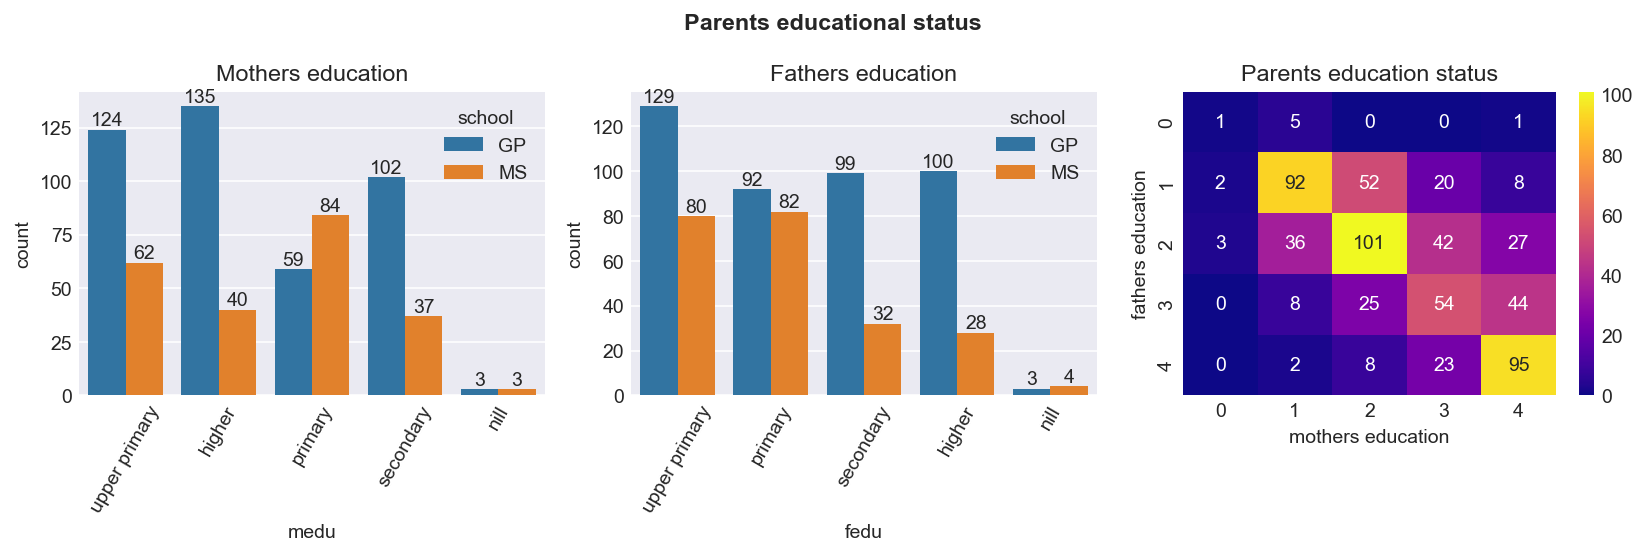

In [44]:
# Parents educational status.
fig, ax = plt.subplots(1,3,figsize=(12,4))
fig.suptitle("Parents educational status", weight='bold')

sns.countplot(data=df, x='medu', hue='school', ax=ax[0], order=df.medu.value_counts().index)
ax[0].set_title('Mothers education')
ax[0].set_xticks([0,1,2,3,4],['upper primary','higher', 'primary','secondary','nill'], rotation=60)
for i in ax[0].containers:
    ax[0].bar_label(i)

sns.countplot(data=df, x='fedu', hue='school', ax=ax[1], order=df.fedu.value_counts().index)
ax[1].set_title('Fathers education')
ax[1].set_xticks([0,1,2,3,4],['upper primary','primary','secondary','higher','nill'], rotation=60)
for i in ax[1].containers:
    ax[1].bar_label(i)


sns.heatmap(ax=ax[2], data=fedu_medu, annot=True, cmap='plasma', fmt='g')
ax[2].set_title('Parents education status')
ax[2].set_xlabel('mothers education')
ax[2].set_ylabel('fathers education')
plt.tight_layout()
plt.show()

_The above plots reveal parents education status based on school wise and number of students from different household(based on parents education). The left bar plot shows mother's education, middle shows fathers education, and right figure shows number of students and their parents education status._

- In Gabriel Pereire 135 students mother had higher education where as 100 fathers had higher education.

- In Mousinho da Silveira few parents had higher education.

- Very few parents had no education.

- Highest 101 students' parents had completed $5^{th}$ to $9^{th}$ grade education, then 95 students' parents had higher education and 92 students parents had completed primary education.

Let's see the effect of parents' education on students performance.

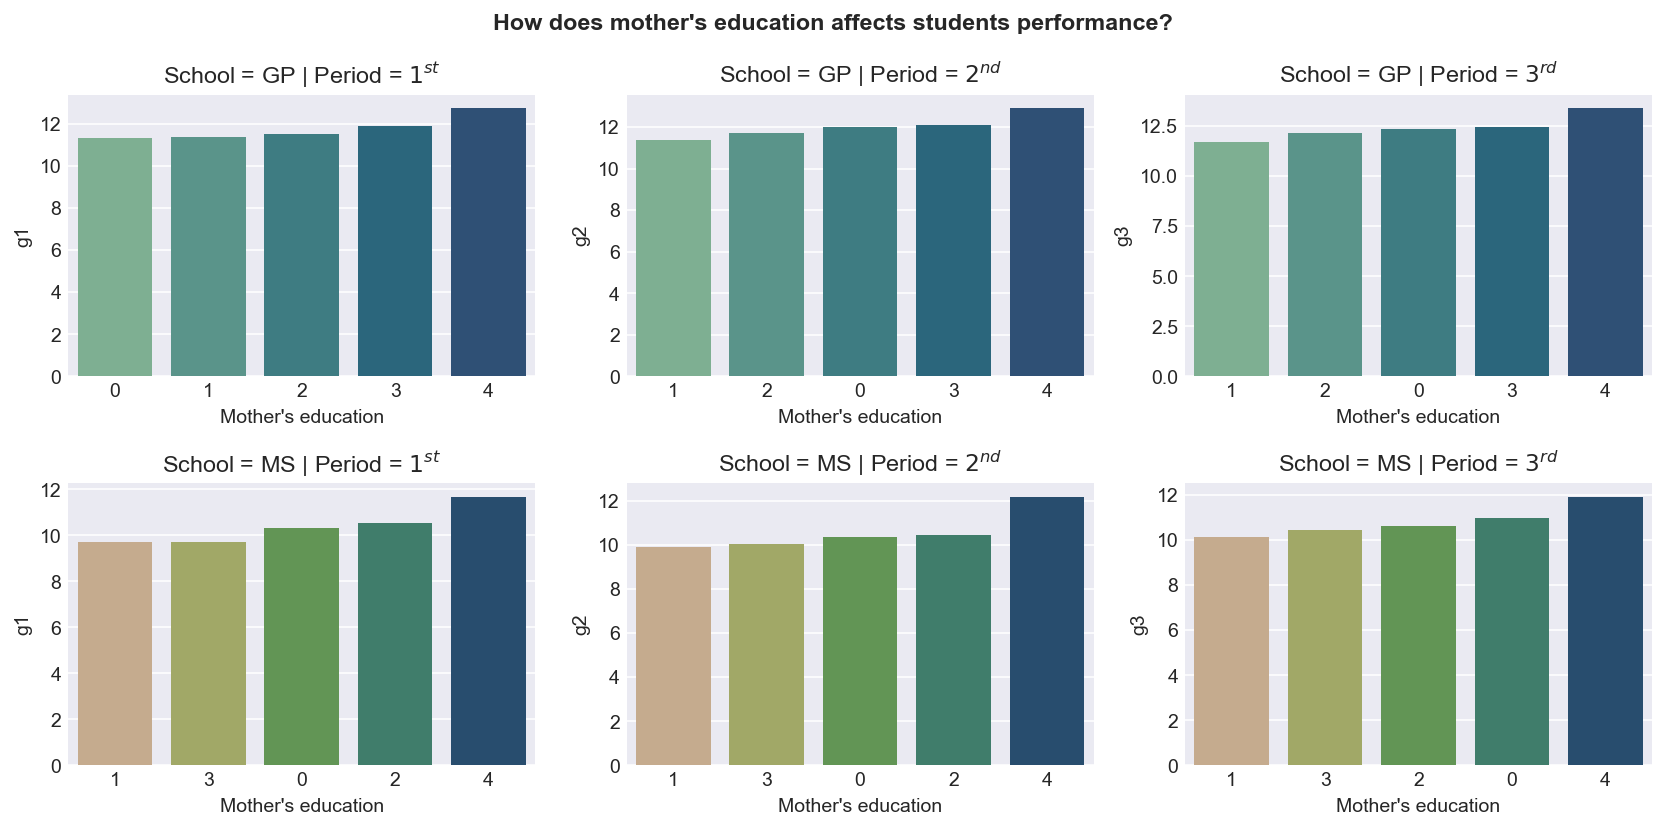

In [45]:
# How mothers education affects students' performance

fig, ax = plt.subplots(2,3, figsize=(12,6))
fig.suptitle("How does mother's education affects students performance?", weight='bold')

sns.barplot(ax=ax[0,0],data=gp_school, x='medu',y='g1', order=find_order(data=gp_school[['medu','g1']], x='medu',y='g1').medu, ci=None, palette='crest')
ax[0,0].set_title("School = GP | Period = $1^{st}$")
ax[0,0].set_xlabel("Mother's education")

sns.barplot(ax=ax[0,1],data=gp_school, x='medu',y='g2', order=find_order(data=gp_school[['medu','g2']], x='medu',y='g2').medu, ci=None, palette='crest')
ax[0,1].set_title("School = GP | Period = $2^{nd}$")
ax[0,1].set_xlabel("Mother's education")

sns.barplot(ax=ax[0,2],data=gp_school, x='medu',y='g3', order=find_order(data=gp_school[['medu','g3']], x='medu',y='g3').medu, ci=None, palette='crest')
ax[0,2].set_title("School = GP | Period = $3^{rd}$")
ax[0,2].set_xlabel("Mother's education")

sns.barplot(ax=ax[1,0],data=ms_school, x='medu',y='g1', order=find_order(data=ms_school[['medu','g1']], x='medu',y='g1').medu, ci=None, palette='gist_earth_r')
ax[1,0].set_title("School = MS | Period = $1^{st}$")
ax[1,0].set_xlabel("Mother's education")

sns.barplot(ax=ax[1,1],data=ms_school, x='medu',y='g2', order=find_order(data=ms_school[['medu','g2']], x='medu',y='g2').medu, ci=None, palette='gist_earth_r')
ax[1,1].set_title("School = MS | Period = $2^{nd}$")
ax[1,1].set_xlabel("Mother's education")

sns.barplot(ax=ax[1,2],data=ms_school, x='medu',y='g3', order=find_order(data=ms_school[['medu','g3']], x='medu',y='g3').medu, ci=None, palette='gist_earth_r')
ax[1,2].set_title("School = MS | Period = $3^{rd}$")
ax[1,2].set_xlabel("Mother's education")

plt.tight_layout()
plt.show()

_The compares students performance based on their mothers' education._

- In both the School, students whose mothers had highest qualification performed well.

- Students whose mother had no education also performed comparatively well.

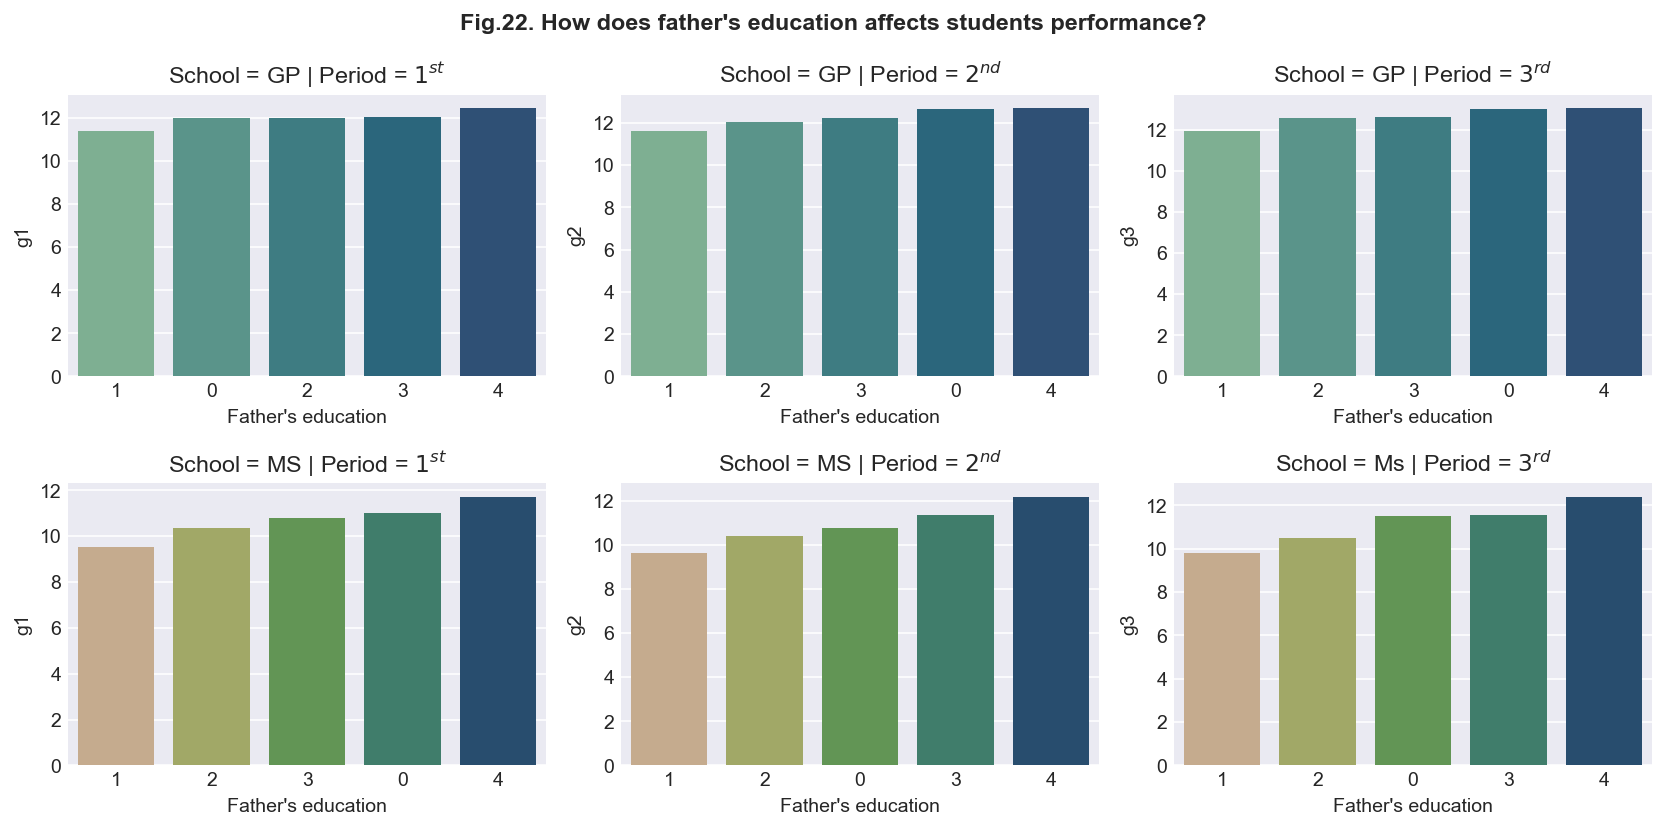

In [46]:
# How fathers education affects students performance

fig, ax = plt.subplots(2,3, figsize=(12,6))
fig.suptitle("Fig.22. How does father's education affects students performance?", weight='bold')

sns.barplot(ax=ax[0,0],data=gp_school, x='fedu',y='g1', order=find_order(data=gp_school[['fedu','g1']], x='fedu',y='g1').fedu, ci=None, palette='crest')
ax[0,0].set_title("School = GP | Period = $1^{st}$")
ax[0,0].set_xlabel("Father's education")

sns.barplot(ax=ax[0,1],data=gp_school, x='fedu',y='g2', order=find_order(data=gp_school[['fedu','g2']], x='fedu',y='g2').fedu, ci=None, palette='crest')
ax[0,1].set_title("School = GP | Period = $2^{nd}$")
ax[0,1].set_xlabel("Father's education")

sns.barplot(ax=ax[0,2],data=gp_school, x='fedu',y='g3', order=find_order(data=gp_school[['fedu','g3']], x='fedu',y='g3').fedu, ci=None, palette='crest')
ax[0,2].set_title("School = GP | Period = $3^{rd}$")
ax[0,2].set_xlabel("Father's education")

sns.barplot(ax=ax[1,0],data=ms_school, x='fedu',y='g1', order=find_order(data=ms_school[['fedu','g1']], x='fedu',y='g1').fedu, ci=None, palette='gist_earth_r')
ax[1,0].set_title("School = MS | Period = $1^{st}$")
ax[1,0].set_xlabel("Father's education")

sns.barplot(ax=ax[1,1],data=ms_school, x='fedu',y='g2', order=find_order(data=ms_school[['fedu','g2']], x='fedu',y='g2').fedu, ci=None, palette='gist_earth_r')
ax[1,1].set_title("School = MS | Period = $2^{nd}$")
ax[1,1].set_xlabel("Father's education")

sns.barplot(ax=ax[1,2],data=ms_school, x='fedu',y='g3', order=find_order(data=ms_school[['fedu','g3']], x='fedu',y='g3').fedu, ci=None, palette='gist_earth_r')
ax[1,2].set_title("School = Ms | Period = $3^{rd}$")
ax[1,2].set_xlabel("Father's education")

plt.tight_layout()

_Fig.22. compares effect of fathers education on students' performance_

- In both school, overall those students had performed well whose father had higher education, secondary education and no education.

<a id='parents-employment-status'></a>

### Parents employment Status


Parents employment status has similar effect to parents education on children's life.

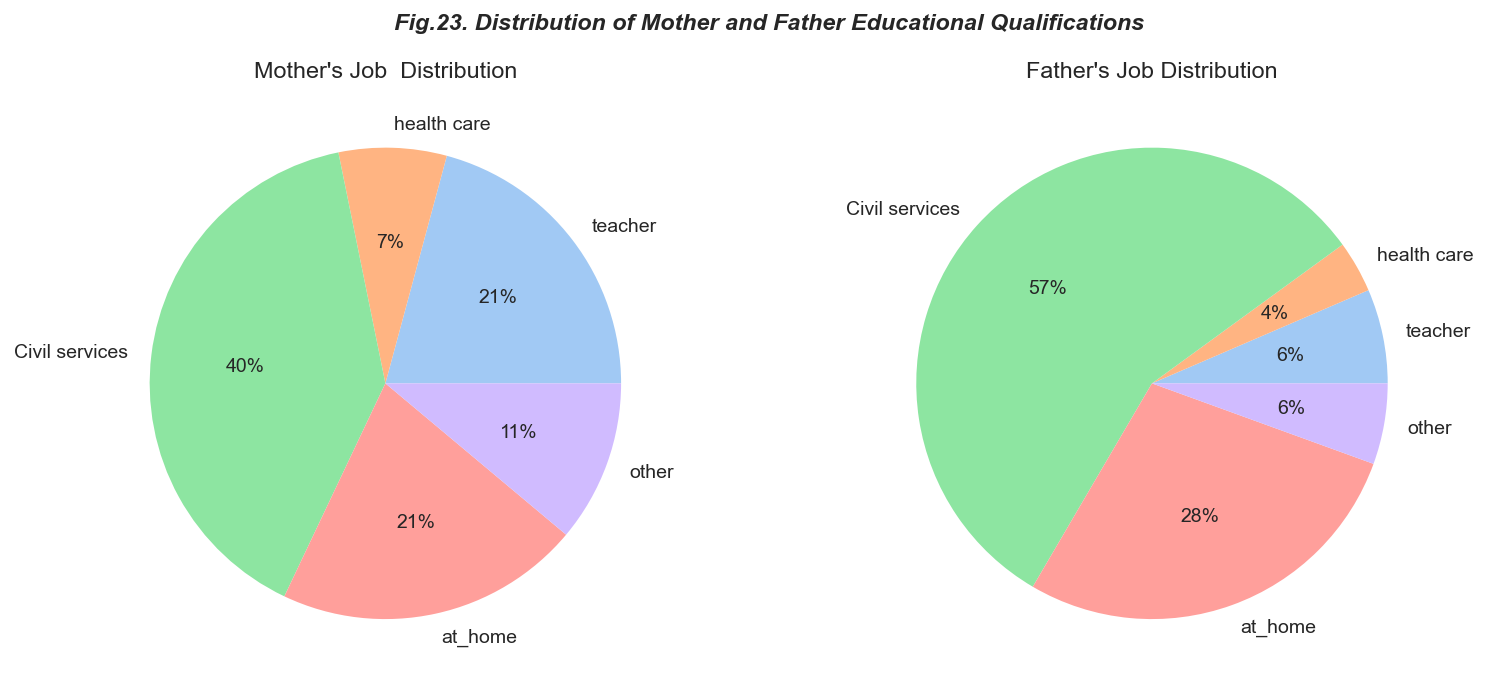

In [47]:
# parents employment distribution
mom_job_data=df.groupby(['mjob'])['mjob'].count()
dad_job_data=df.groupby(['fjob'])['fjob'].count()
fig ,ax=plt.subplots(1,2,figsize=(12,5))
labels=['teacher','health care','Civil services','at_home','other']
colors = sns.color_palette('pastel')[0:5]
ax[0].pie(mom_job_data.values,labels=labels,colors=colors,autopct='%.0f%%')
ax[1].pie(dad_job_data.values,labels=labels,colors=colors,autopct='%.0f%%')
fig.suptitle("Fig.23. Distribution of Mother and Father Educational Qualifications",style='oblique', weight='bold')
ax[0].set_title("Mother's Job  Distribution")
ax[1].set_title("Father's Job Distribution")
plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.7, 
                    wspace=0.4, 
                    hspace=0.4)
plt.tight_layout()
plt.show()

_Fig.23 shows the distribution of parents employment status. The left pie chart shows mothers and right pie chart shows fathers employment status._

- 40% students' mother and 57% fathers had civil service job.

- 21% mothers and 28% fathers had no job.

- 21% mothers and only 6% fathers were teachers.

- 7% mothers and 4% fathers had health care jobs.

- 11% mothers and 6% fathers had some other job.

In [48]:
# Number of students based on parents employment status 
fjob_mjob = pd.crosstab(df.fjob, df.mjob)
fjob_mjob

mjob      at_home  health  other  services  teacher
fjob                                               
at_home        18       1     14         7        2
health          2       9      3         4        5
other          77      21    183        58       28
services       36      15     50        59       21
teacher         2       2      8         8       16

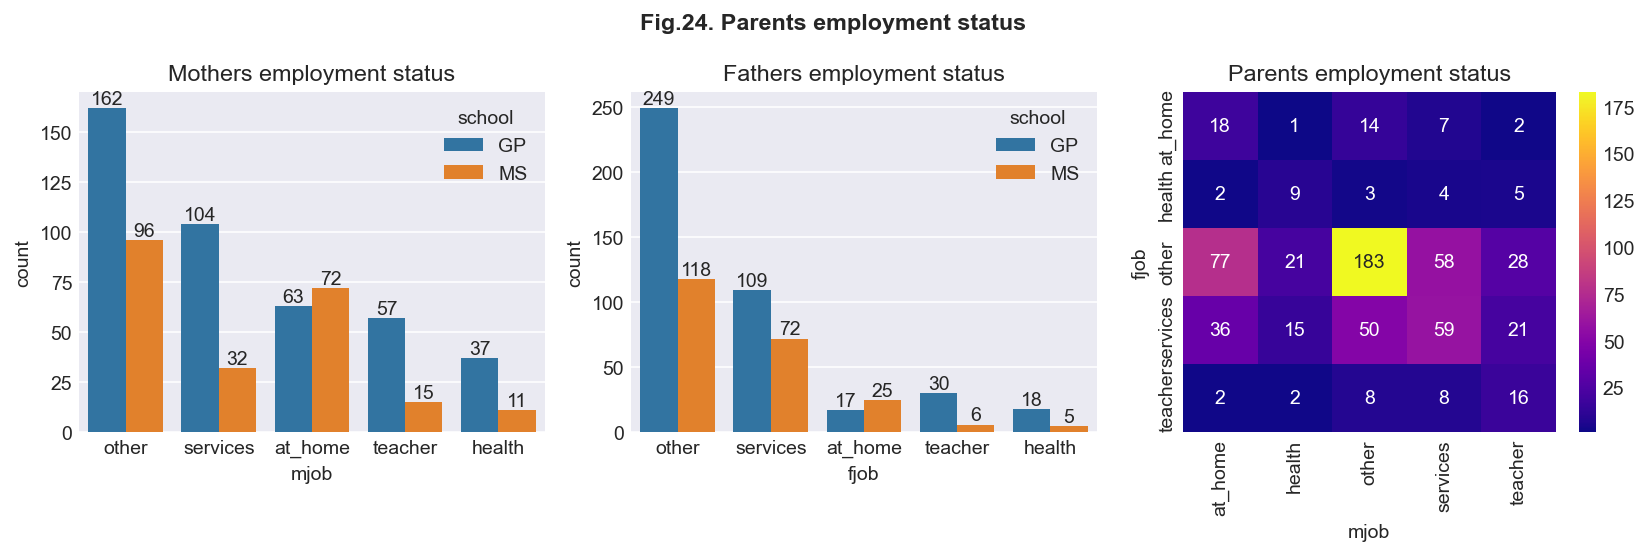

In [49]:
# Parents employment status.
fig, ax = plt.subplots(1,3,figsize=(12,4))
fig.suptitle("Fig.24. Parents employment status", weight='bold')

sns.countplot(data=df, x='mjob', hue='school', ax=ax[0], order=df.mjob.value_counts().index)
ax[0].set_title('Mothers employment status')
for i in ax[0].containers:
    ax[0].bar_label(i)

sns.countplot(data=df, x='fjob', hue='school', ax=ax[1], order=df.fjob.value_counts().index)
ax[1].set_title('Fathers employment status')
for i in ax[1].containers:
    ax[1].bar_label(i)


sns.heatmap(ax=ax[2], data=fjob_mjob, annot=True, cmap='plasma', fmt='g')
ax[2].set_title('Parents employment status')
# ax[2].set_xlabel('mothers education')
# ax[2].set_ylabel('fathers education')
plt.tight_layout()
plt.show()

_Fig.24 shows parents employment status based on schools and number of students from different family._

- In Gabriel Pereire, most of students parents had other jobs.

- In Mousinho da Silveira more number of parents were at home than Gabriel Pereire school.

- In Mousinho da Silveira only students father had teacher job.

- More number of mothers were in civil service than fathers.

Let's see the performance of students

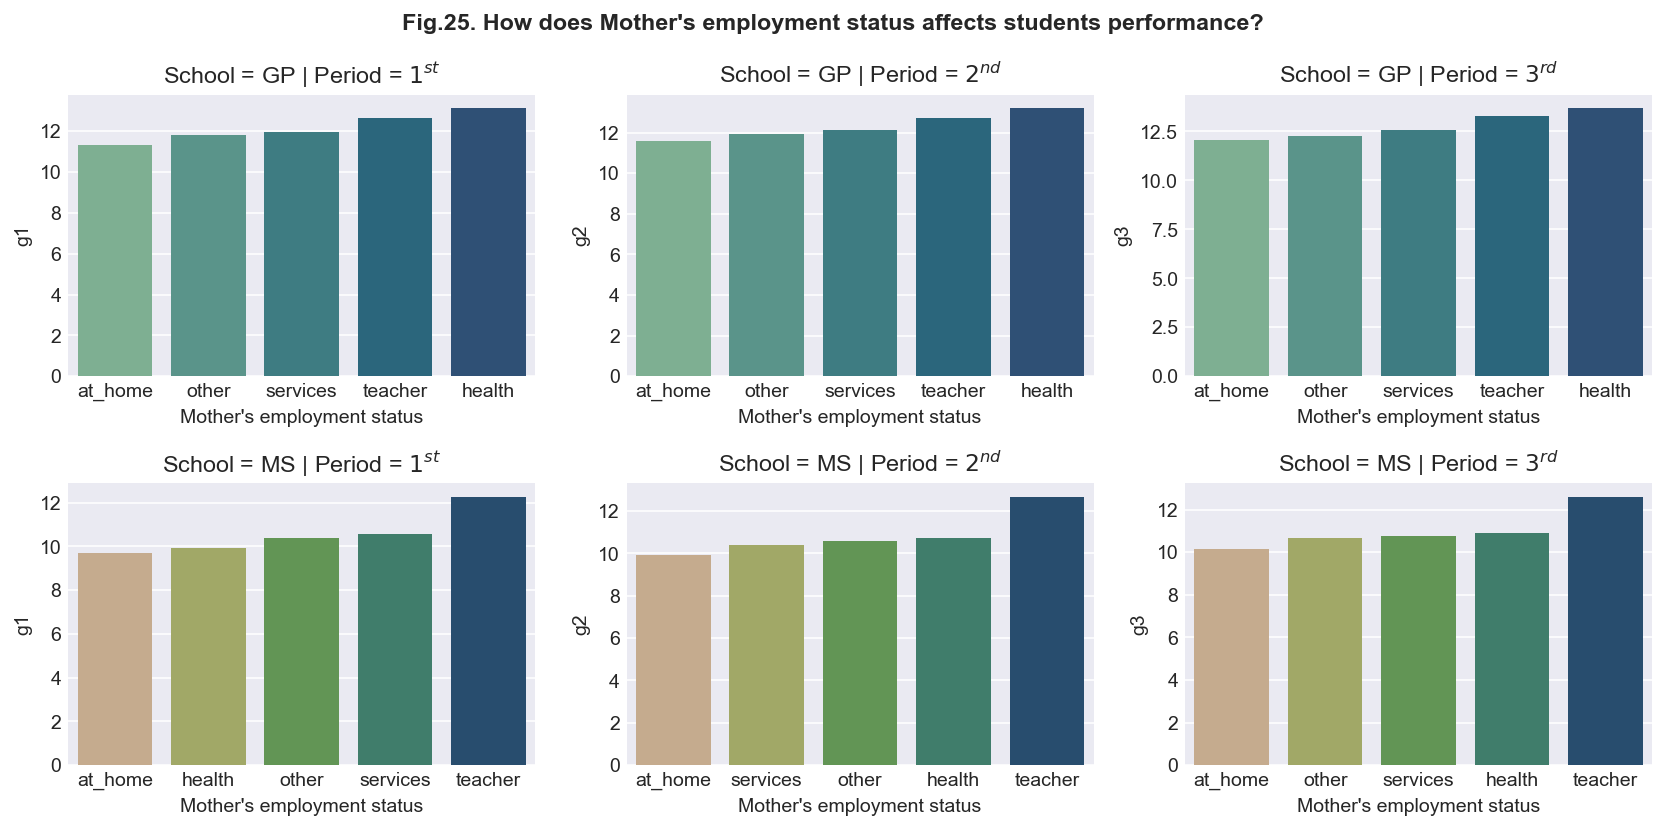

In [50]:
# Effect of Mother's employment

fig, ax = plt.subplots(2,3, figsize=(12,6))
fig.suptitle("Fig.25. How does Mother's employment status affects students performance?", weight='bold')

sns.barplot(ax=ax[0,0],data=gp_school, x='mjob',y='g1', order=find_order(data=gp_school[['mjob','g1']], x='mjob',y='g1').mjob, ci=None, palette='crest')
ax[0,0].set_title("School = GP | Period = $1^{st}$")
ax[0,0].set_xlabel("Mother's employment status")

sns.barplot(ax=ax[0,1],data=gp_school, x='mjob',y='g2', order=find_order(data=gp_school[['mjob','g2']], x='mjob',y='g2').mjob, ci=None, palette='crest')
ax[0,1].set_title("School = GP | Period = $2^{nd}$")
ax[0,1].set_xlabel("Mother's employment status")

sns.barplot(ax=ax[0,2],data=gp_school, x='mjob',y='g3', order=find_order(data=gp_school[['mjob','g3']], x='mjob',y='g3').mjob, ci=None, palette='crest')
ax[0,2].set_title("School = GP | Period = $3^{rd}$")
ax[0,2].set_xlabel("Mother's employment status")

sns.barplot(ax=ax[1,0],data=ms_school, x='mjob',y='g1', order=find_order(data=ms_school[['mjob','g1']], x='mjob',y='g1').mjob, ci=None, palette='gist_earth_r')
ax[1,0].set_title("School = MS | Period = $1^{st}$")
ax[1,0].set_xlabel("Mother's employment status")

sns.barplot(ax=ax[1,1],data=ms_school, x='mjob',y='g2', order=find_order(data=ms_school[['mjob','g2']], x='mjob',y='g2').mjob, ci=None, palette='gist_earth_r')
ax[1,1].set_title("School = MS | Period = $2^{nd}$")
ax[1,1].set_xlabel("Mother's employment status")

sns.barplot(ax=ax[1,2],data=ms_school, x='mjob',y='g3', order=find_order(data=ms_school[['mjob','g3']], x='mjob',y='g3').mjob, ci=None, palette='gist_earth_r')
ax[1,2].set_title("School = MS | Period = $3^{rd}$")
ax[1,2].set_xlabel("Mother's employment status")

plt.tight_layout()
plt.show()

_Fig.25. compares the students performance in all three periods in both the schools._

- In Gabriel Pereire schools students were performed well whose mothers had health care jobs, followed by teachers, then services.

- Whereas in Mousinho da Silveira, students performed well whose mothers were teachers, then civil services, then other jobs.

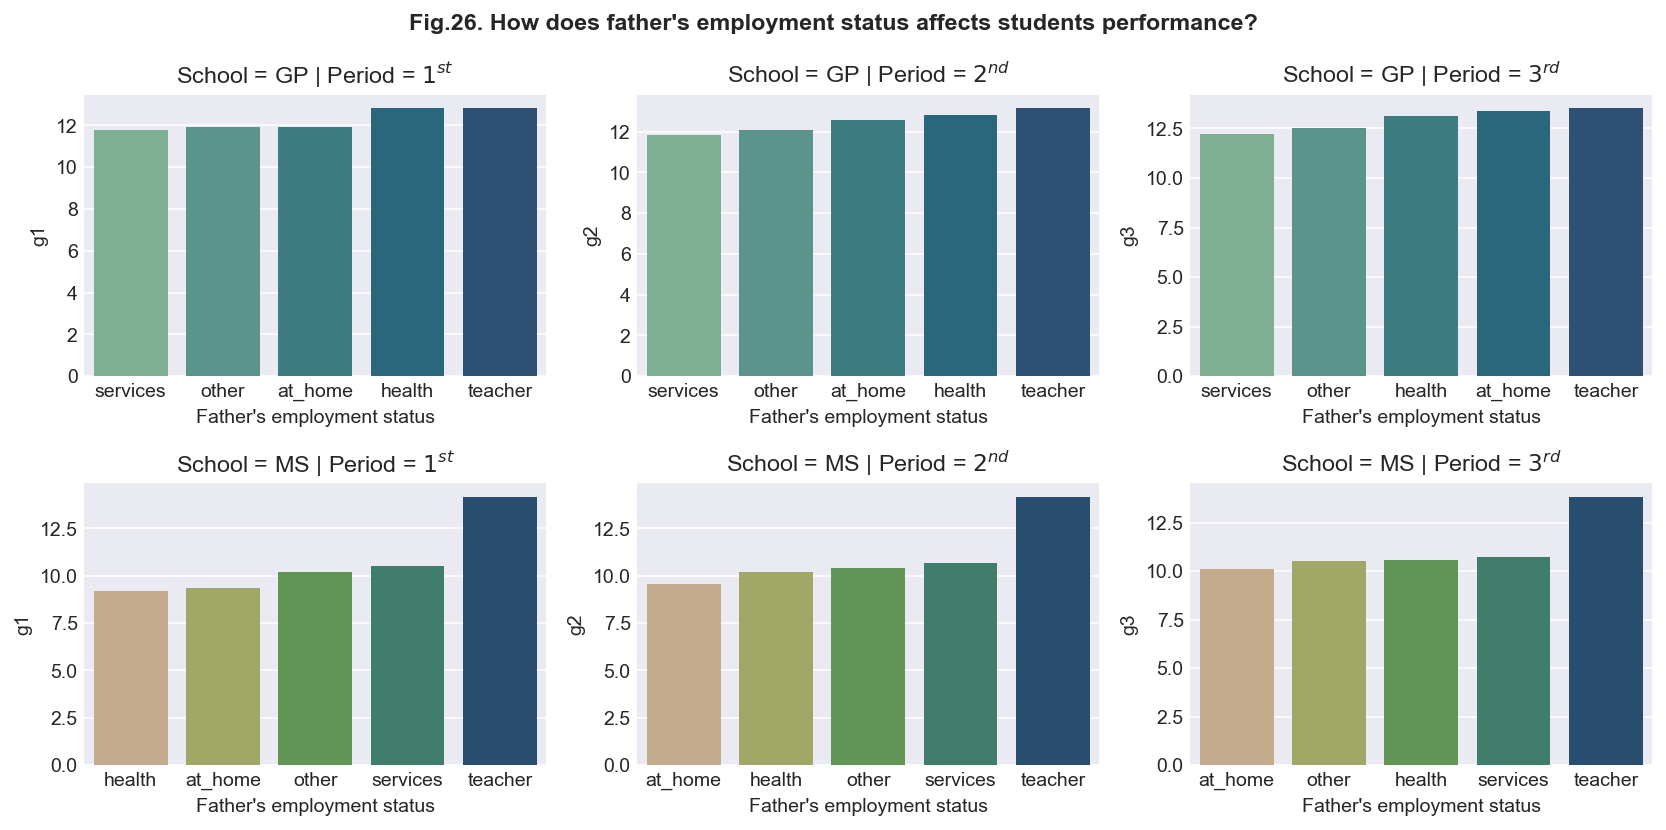

In [51]:
# Effect of father's employment

fig, ax = plt.subplots(2,3, figsize=(12,6))
fig.suptitle("Fig.26. How does father's employment status affects students performance?", weight='bold')

sns.barplot(ax=ax[0,0],data=gp_school, x='fjob',y='g1', order=find_order(data=gp_school[['fjob','g1']], x='fjob',y='g1').fjob, ci=None, palette='crest')
ax[0,0].set_title("School = GP | Period = $1^{st}$")
ax[0,0].set_xlabel("Father's employment status")

sns.barplot(ax=ax[0,1],data=gp_school, x='fjob',y='g2', order=find_order(data=gp_school[['fjob','g2']], x='fjob',y='g2').fjob, ci=None, palette='crest')
ax[0,1].set_title("School = GP | Period = $2^{nd}$")
ax[0,1].set_xlabel("Father's employment status")

sns.barplot(ax=ax[0,2],data=gp_school, x='fjob',y='g3', order=find_order(data=gp_school[['fjob','g3']], x='fjob',y='g3').fjob, ci=None, palette='crest')
ax[0,2].set_title("School = GP | Period = $3^{rd}$")
ax[0,2].set_xlabel("Father's employment status")

sns.barplot(ax=ax[1,0],data=ms_school, x='fjob',y='g1', order=find_order(data=ms_school[['fjob','g1']], x='fjob',y='g1').fjob, ci=None, palette='gist_earth_r')
ax[1,0].set_title("School = MS | Period = $1^{st}$")
ax[1,0].set_xlabel("Father's employment status")

sns.barplot(ax=ax[1,1],data=ms_school, x='fjob',y='g2', order=find_order(data=ms_school[['fjob','g2']], x='fjob',y='g2').fjob, ci=None, palette='gist_earth_r')
ax[1,1].set_title("School = MS | Period = $2^{nd}$")
ax[1,1].set_xlabel("Father's employment status")

sns.barplot(ax=ax[1,2],data=ms_school, x='fjob',y='g3', order=find_order(data=ms_school[['fjob','g3']], x='fjob',y='g3').fjob, ci=None, palette='gist_earth_r')
ax[1,2].set_title("School = MS | Period = $3^{rd}$")
ax[1,2].set_xlabel("Father's employment status")

plt.tight_layout()
plt.show()

_Fig.26. Compares students performance based on Fathers employment._

- In both the schools students are performing well whose father were teachers.

- In Gabriel Pereire school students were performing well whose father had health services. Surprisingly in third period students performed well whose father had no job.

<a id='guardian'></a>

### Guardian

---

- Guardians are also responsible for students performance.

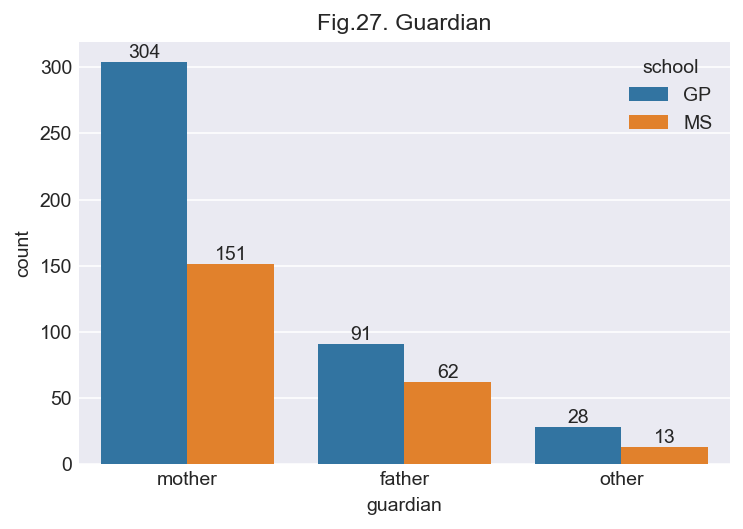

In [52]:
# Guardians of students 

ax = sns.countplot(data=df, x='guardian', hue='school')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Fig.27. Guardian")
plt.show()

_Fig.27. shows school wise students' guardians_

- Most of students had mother as their guardian.

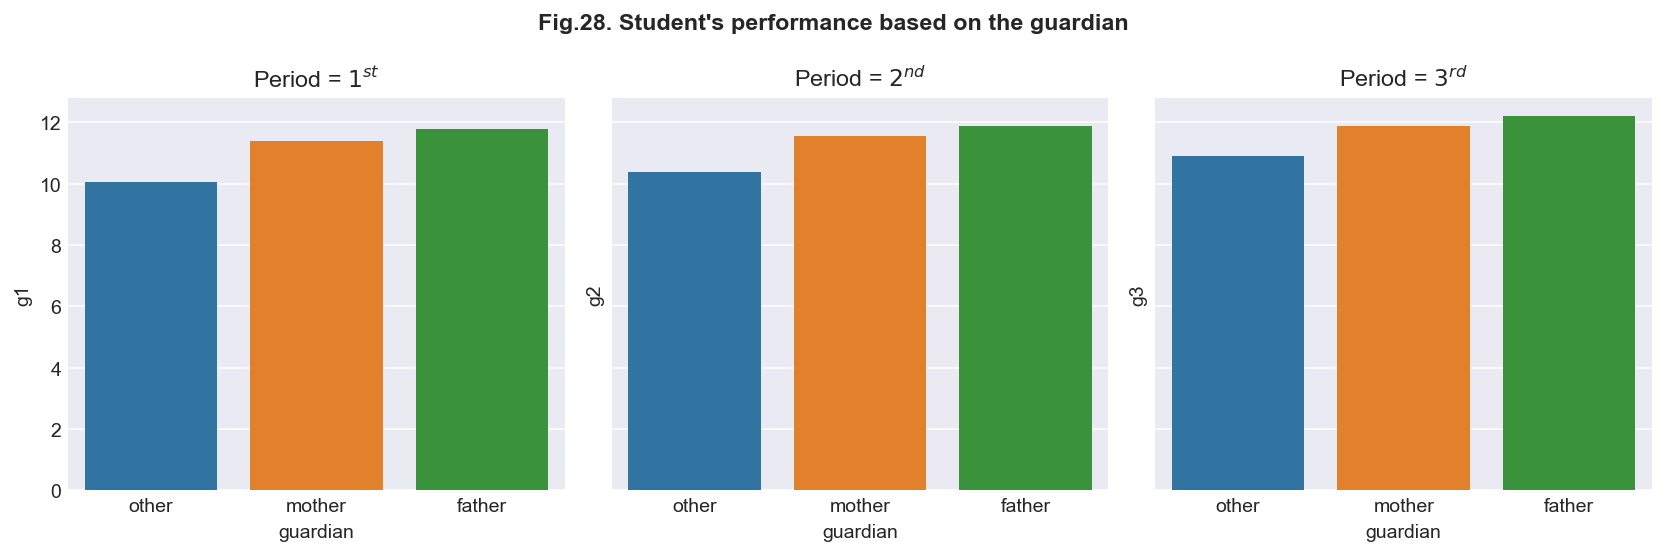

In [53]:
# Students performance based on guardian

fig, ax = plt.subplots(1,3, figsize=(12,4), sharey=True)
fig.suptitle("Fig.28. Student's performance based on the guardian", weight='bold')

sns.barplot(
    ax = ax[0],
    data=df, 
    x='guardian', 
    y='g1', 
    order=find_order(data=df[['guardian','g1']], x='guardian', y='g1').guardian,
    ci=None
)
ax[0].set_title("Period = $1^{st}$")


sns.barplot(
    ax = ax[1],
    data=df,
    x='guardian',
    y='g2',
    order=find_order(data=df[['guardian','g2']], x='guardian', y='g2').guardian,
    ci=None
)
ax[1].set_title("Period = $2^{nd}$")

sns.barplot(
    ax = ax[2],
    data=df,
    x='guardian',
    y='g3',
    order=find_order(data=df[['guardian','g3']], x='guardian', y='g3').guardian,
    ci=None
)
ax[2].set_title("Period = $3^{rd}$")


plt.tight_layout();

_Fig.28. Students performance based on the guardian in all periods._

- Though highest number of students mother was guardian, students actually performed well under fathers guidance.

<a id='effect-of-family-relationship-on-students'></a>

### Effect of family relationship on students

----

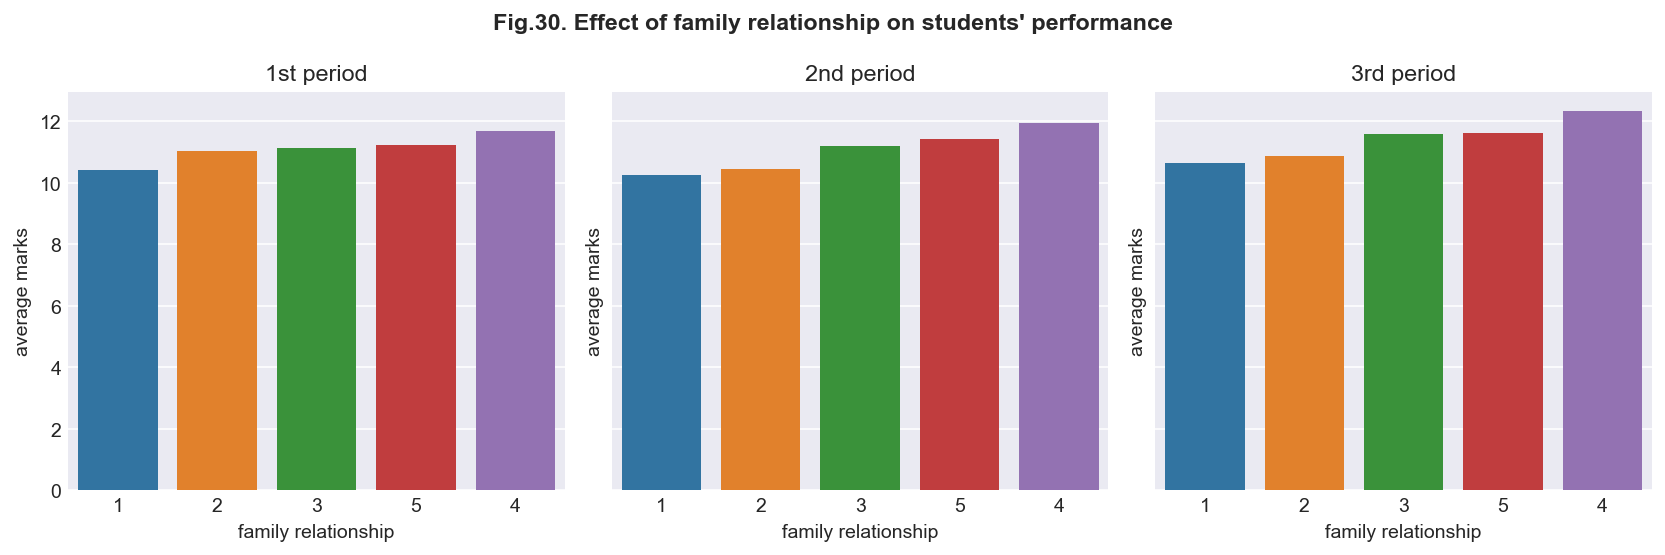

In [54]:
# Effect of family relationship on students performance

fam_rel_g1 = df[['famrel', 'g1']].groupby('famrel').mean().sort_values('g1').reset_index()
fam_rel_g2 = df[['famrel','g2']].groupby('famrel').mean().sort_values('g2').reset_index()
fam_rel_g3 = df[['famrel','g3']].groupby('famrel').mean().sort_values('g3').reset_index()


fig, ax = plt.subplots(1,3,figsize=(12,4), sharey=True)
sns.barplot(
    ax=ax[0],
    data=df, 
    x='famrel',
    y='g1',
    order= fam_rel_g1.famrel,
    ci=None)
ax[0].set_title("1st period")
ax[0].set_ylabel('average marks')
ax[0].set_xlabel('family relationship')

sns.barplot(ax=ax[1], data=df, x='famrel', y='g2', order=fam_rel_g2.famrel, ci=None)
ax[1].set_title("2nd period")
ax[1].set_ylabel('average marks')
ax[1].set_xlabel('family relationship')

sns.barplot(ax =ax[2], data=df, x='famrel', y='g3', order=fam_rel_g3.famrel, ci=None)
ax[2].set_title("3rd period")
ax[2].set_ylabel('average marks')
ax[2].set_xlabel('family relationship')

fig.suptitle("Fig.30. Effect of family relationship on students' performance", weight='bold')
plt.tight_layout()
plt.show()

_Fig.30. shows effect of family relationship on students' performance on all periods._

- Students with better relationship with family performed better, followed by students with excellent relationship.

- Students with very bad relationship does not perform well as the average value is near to 10.

<a id='other-factors-that-affects-students-performance'></a>

## Other factors that affects students performance:

-----

### Travel time

- If house is far from school, travel time increases and students study time decreases or affects students self-study time.

In [55]:
# Unique values in travel time
df.traveltime.unique()

array([2, 1, 3, 4])

- There are 4 values in travel time column i.e. 1 for less than 15 minutes, 2 for 15-30 minutes, 3 for 30 - 60 minutes, and 4 for more than 1 hour of travel time.

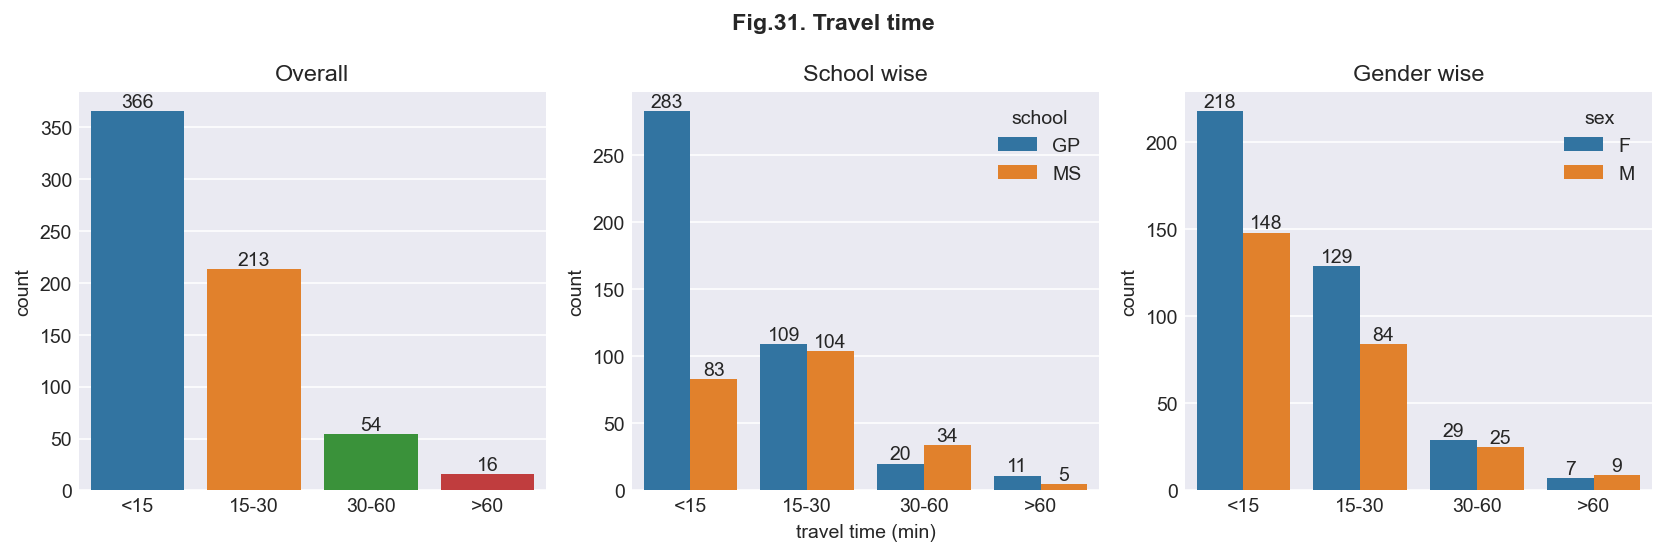

In [56]:
# Distribution of travel time
fig, ax = plt.subplots(1,3, figsize=(12,4))
fig.suptitle("Fig.31. Travel time", weight='bold')

sns.countplot(data=df, x='traveltime', ax=ax[0])
ax[0].set_xticks([0,1,2,3],['<15', '15-30', '30-60', '>60'])
ax[0].set_xlabel('')
ax[0].set_title("Overall")
for i in ax[0].containers:
    ax[0].bar_label(i)

sns.countplot(data=df, x='traveltime', hue='school', ax=ax[1])
ax[1].set_xticks([0,1,2,3],['<15', '15-30', '30-60', '>60'])
ax[1].set_xlabel('travel time (min)')
ax[1].set_title("School wise")
for i in ax[1].containers:
    ax[1].bar_label(i)

sns.countplot(data=df, x='traveltime', hue='sex', ax=ax[2])
ax[2].set_xticks([0,1,2,3],['<15', '15-30', '30-60', '>60'])
ax[2].set_xlabel('')
ax[2].set_title("Gender wise")
for i in ax[2].containers:
    ax[2].bar_label(i)

plt.tight_layout()
plt.show()

_Fig.31. Travel time overall(left), school wise (middle), and gender wise (right)._

- Only 16 students had travel time more than 1 hour.

- 366 students had travel time less than 15 minutes.

- In Gabriel Pereire most students have travel time less than 15 minutes.

- In Mousinho da Silveira 34 students had travel time more than 30 minutes and less than 60 minutes.

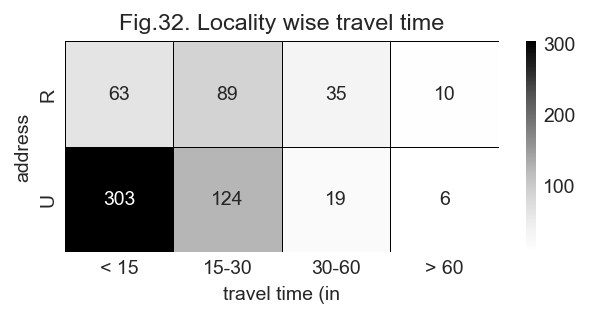

In [57]:
# Which students are traveling more
fig, ax = plt.subplots(figsize=(5,2))
ax = sns.heatmap(
    data=df.groupby(['address','traveltime']).address.count().unstack(), 
    annot=True, 
    fmt='g', 
    cmap='Greys', 
    xticklabels=['< 15', '15-30','30-60', '> 60'], 
    linewidth=0.5,
    linecolor='black'
)
ax.set_xlabel("travel time (in")
ax.set_title("Fig.32. Locality wise travel time")
plt.show()

_Fig.32. shows locality wise students travel time_

- Most of students from urban areas had travel time less than 15 minutes.

- From rural area only 10 and from urban area only 6 students had travel time more than 1 hour.


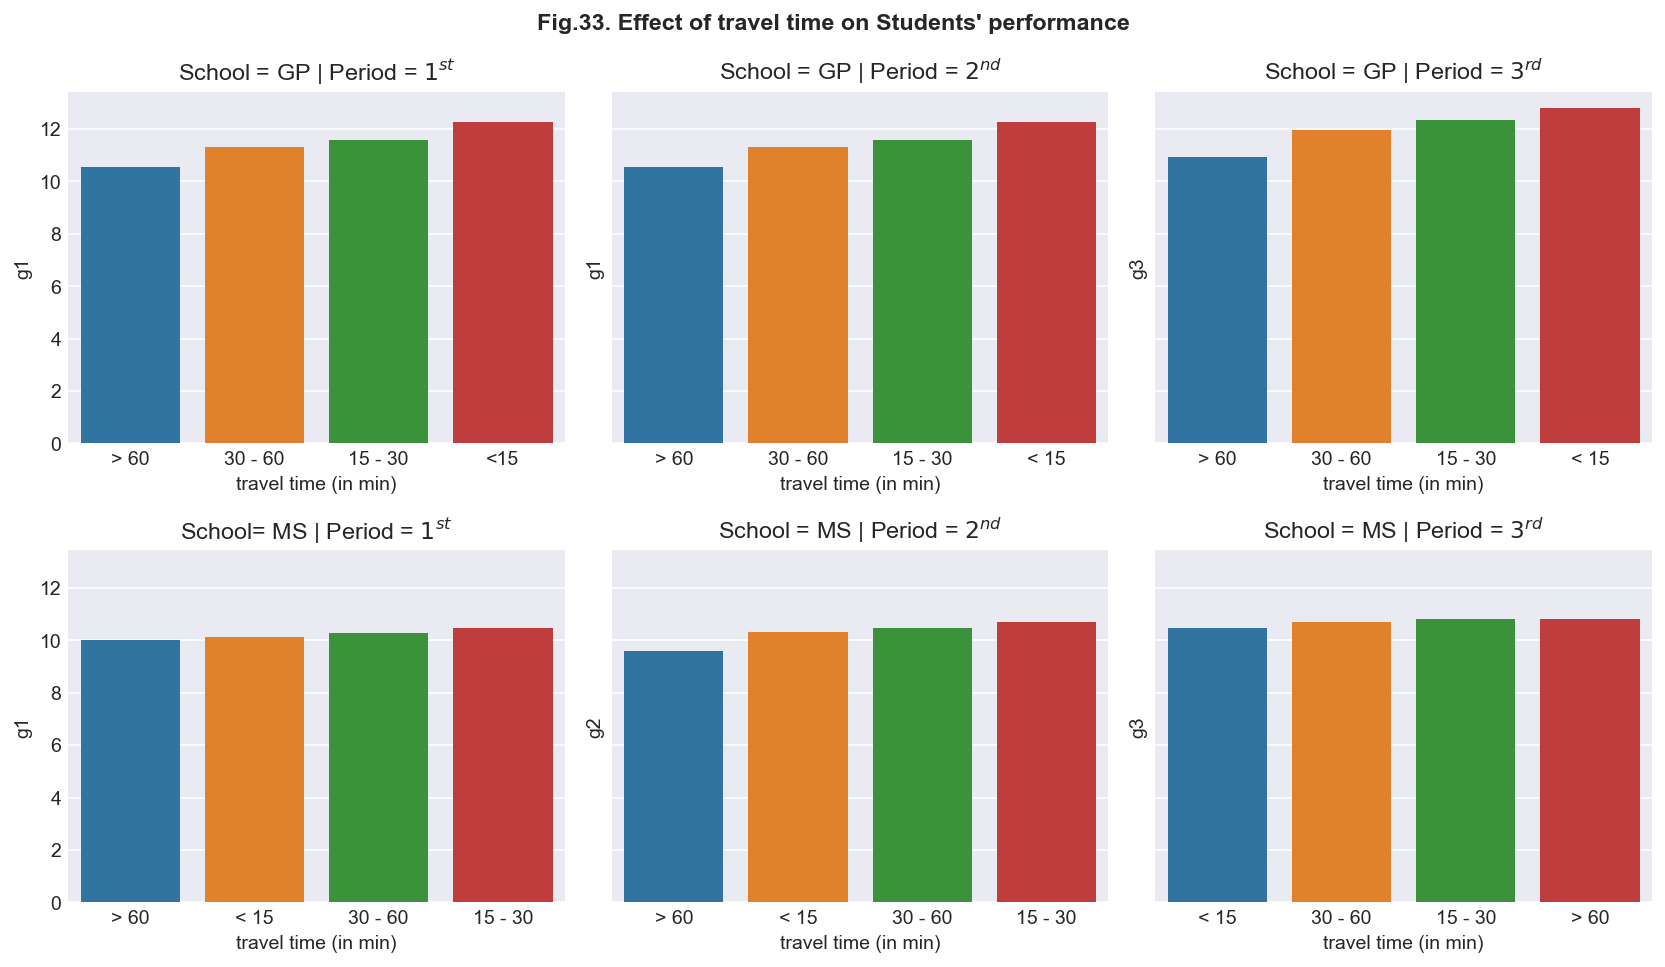

In [58]:
# effect of travel time on student's performance

fig, ax = plt.subplots(2,3,figsize=(12,7), sharey=True)
fig.suptitle("Fig.33. Effect of travel time on Students' performance", weight='bold')

sns.barplot(
    ax = ax[0,0],
    data=gp_school,
    x='traveltime',
    y='g1',
    order = find_order(data=gp_school[['traveltime','g1']], x='traveltime', y= 'g1').traveltime,
    ci=None
)
ax[0,0].set_title("School = GP | Period = $1^{st}$")
ax[0,0].set_xticks([0,1,2,3],['> 60', '30 - 60', '15 - 30', '<15'])
ax[0,0].set_xlabel("travel time (in min)")

sns.barplot(
    ax = ax[0,1],
    data=gp_school,
    x='traveltime',
    y='g1',
    order = find_order(data=gp_school[['traveltime','g2']], x='traveltime', y= 'g2').traveltime,
    ci=None
)
ax[0,1].set_title("School = GP | Period = $2^{nd}$")
ax[0,1].set_xticks([0,1,2,3],['> 60', '30 - 60', '15 - 30', '< 15'])
ax[0,1].set_xlabel("travel time (in min)")

sns.barplot(
    ax = ax[0,2],
    data=gp_school,
    x='traveltime',
    y='g3',
    order = find_order(data=gp_school[['traveltime','g3']], x='traveltime', y= 'g3').traveltime,
    ci=None
)
ax[0,2].set_title("School = GP | Period = $3^{rd}$")
ax[0,2].set_xticks([0,1,2,3],['> 60', '30 - 60', '15 - 30', '< 15'])
ax[0,2].set_xlabel("travel time (in min)")


sns.barplot(
    ax = ax[1,0],
    data=ms_school,
    x='traveltime',
    y='g1',
    order = find_order(data=ms_school[['traveltime','g1']], x='traveltime', y= 'g1').traveltime,
    ci=None
)
ax[1,0].set_title("School= MS | Period = $1^{st}$")
ax[1,0].set_xticks([0,1,2,3],['> 60', '< 15','30 - 60', '15 - 30'])
ax[1,0].set_xlabel("travel time (in min)")


sns.barplot(
    ax = ax[1,1],
    data=ms_school,
    x='traveltime',
    y='g2',
    order = find_order(data=ms_school[['traveltime','g2']], x='traveltime', y= 'g2').traveltime,
    ci=None
)
ax[1,1].set_title("School = MS | Period = $2^{nd}$")
ax[1,1].set_xticks([0,1,2,3],['> 60', '< 15','30 - 60', '15 - 30'])
ax[1,1].set_xlabel("travel time (in min)")


sns.barplot(
    ax = ax[1,2],
    data=ms_school,
    x='traveltime',
    y='g3',
    order = find_order(data=ms_school[['traveltime','g3']], x='traveltime', y= 'g3').traveltime,
    ci=None
)
ax[1,2].set_title("School = MS | Period = $3^{rd}$")
ax[1,2].set_xticks([0,1,2,3],['< 15', '30 - 60', '15 - 30', '> 60'])
ax[1,2].set_xlabel("travel time (in min)")


plt.tight_layout()

_Fig.33. compares the students performance based on travel time shool wise. first row shows comparison for Gabriel Pereire school whereas second row shows comparison for Mousinho da Silveira for all three periods._

- In Gabriel Periera students with travel time less than 15 minutes had performed better in all three periods. followed by students with travel time of 15-30 minutes. Students with travel time more than a hour performed poorly.

- In Mousinho da Silveira school, students with travel time in between 15-30 minutes had performed better in first and second period whereas in third period students with travel time more than one hour performed better.

### Weekly Study Time

----

Self study is very much important for anyone to sell good in academics or other aspects of life as well.


In [59]:
df.studytime.unique()

array([2, 3, 1, 4])

In the dataset there are 4 values of study time i.e. 1: less than 2 hours, 2: 2-5 hours, 3: 5-10 hours, and 4: more than 10 hours.

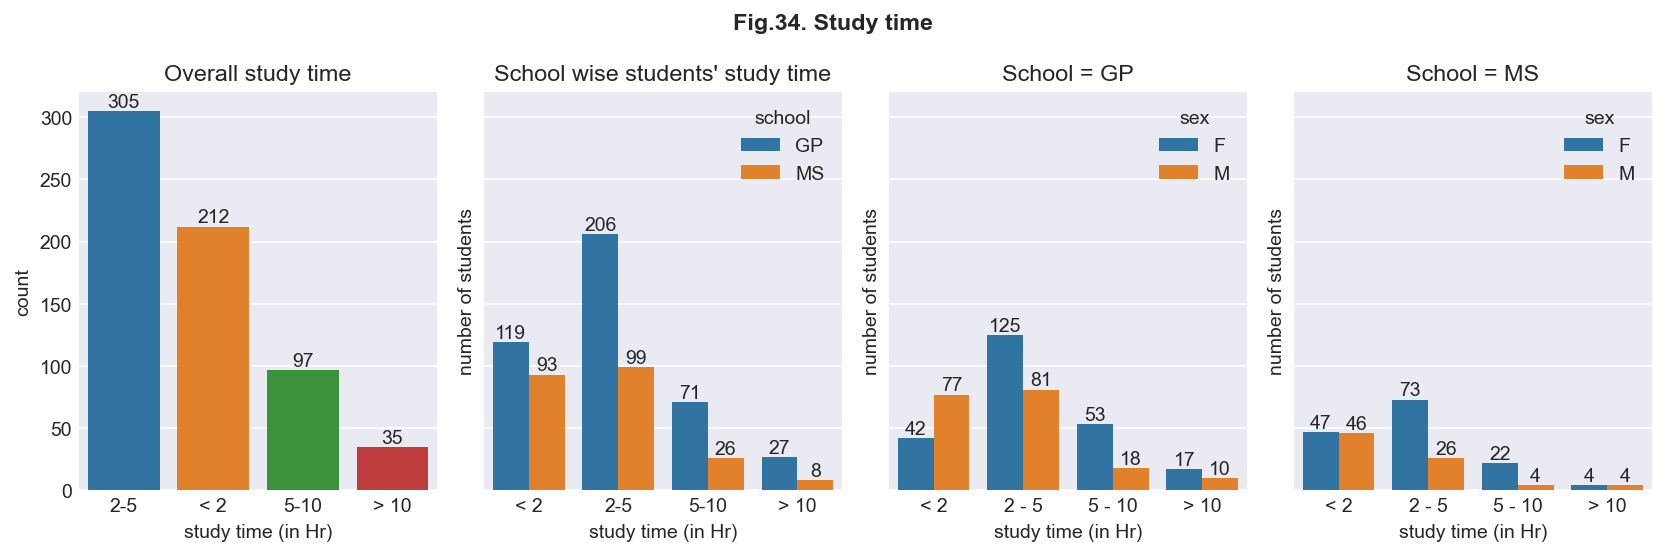

In [60]:
# Study time

fig, ax = plt.subplots(1,4, figsize=(12, 4), sharey=True)
fig.suptitle("Fig.34. Study time", weight='bold')

sns.countplot(ax=ax[0],data=df, x='studytime', order=df.studytime.value_counts().index)
ax[0].set_xticks([0,1,2,3],['2-5', '< 2', '5-10', '> 10'])
ax[0].set_title("Overall study time")
ax[0].set_xlabel("study time (in Hr)")
for bar in ax[0].containers:
    ax[0].bar_label(bar)

sns.countplot(ax=ax[1], data=df, x='studytime', hue='school')
ax[1].set_title("School wise students' study time")
ax[1].set_ylabel('number of students')
ax[1].set_xlabel("study time (in Hr)")
ax[1].set_xticks([0,1,2,3],['< 2', '2-5', '5-10', '> 10'])
for bar in ax[1].containers:
    ax[1].bar_label(bar)

sns.countplot(ax=ax[2], data=gp_school, x='studytime', hue='sex')
ax[2].set_title("School = GP")
ax[2].set_ylabel('number of students')
ax[2].set_xlabel('study time (in Hr)')
ax[2].set_xticks([0,1,2,3],['< 2', '2 - 5', '5 - 10', '> 10'])
for bar in ax[2].containers:
    ax[2].bar_label(bar)

sns.countplot(ax=ax[3], data=ms_school, x='studytime', hue='sex')
ax[3].set_title("School = MS")
ax[3].set_ylabel('number of students')
ax[3].set_xlabel('study time (in Hr)')
ax[3].set_xticks([0,1,2,3],['< 2', '2 - 5', '5 - 10', '> 10'])
for bar in ax[3].containers:
    ax[3].bar_label(bar)

plt.tight_layout()
plt.show()

_Fig.34 shows the study time of students. Left plot - overall study time, Left middle - School wise, Right two plots show gender wise students study time in both schools._

- Overall 305 students were studying for 2-5 years. Only 35 students had study time more than 10 hours.

- School wise 8 students from Mousinho da Silveira and 27 students from Gabriel Pereira had studied more than 10 hours.

- Female students had studied more time than males.

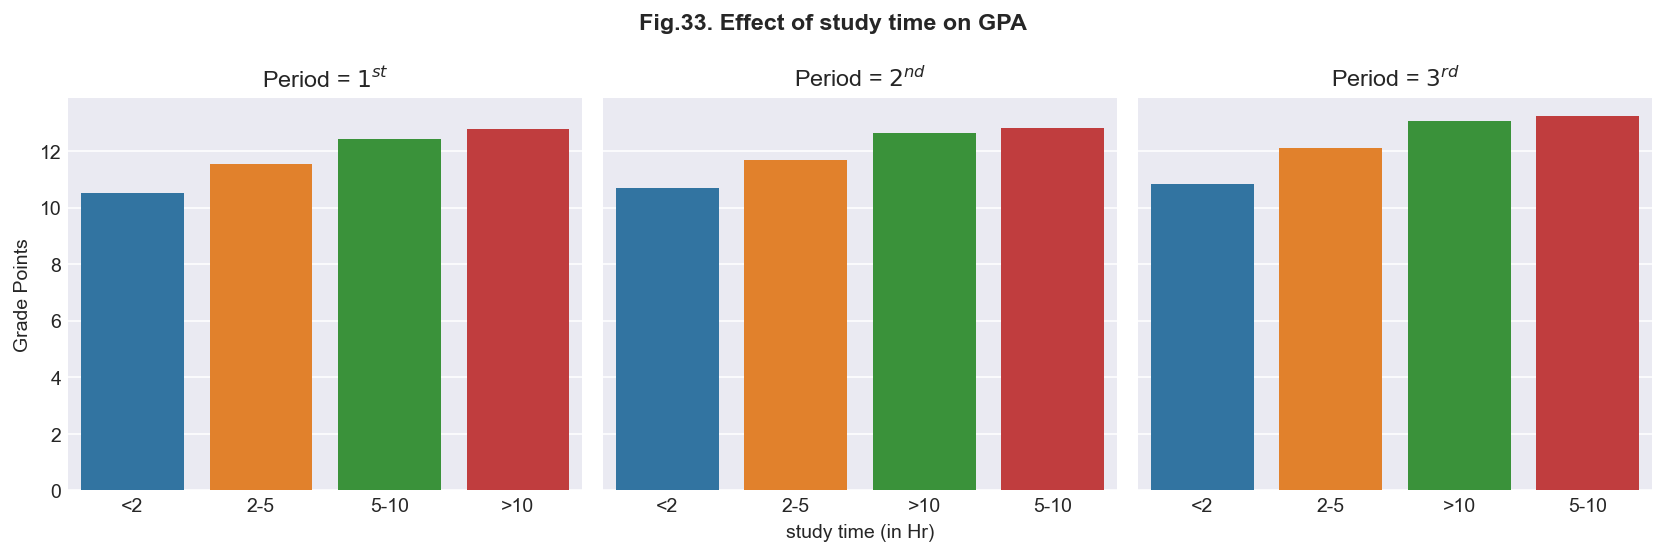

In [61]:
# Effect of study time on GPA
fig, ax = plt.subplots(1,3,figsize=(12,4), sharey=True)
fig.suptitle("Fig.33. Effect of study time on GPA", weight='bold')

sns.barplot(ax=ax[0], data=df, x='studytime', y='g1', order=find_order(data=df[['studytime','g1']], x='studytime', y='g1').studytime, ci=None)
ax[0].set_xticks([0,1,2,3],['<2', '2-5','5-10', '>10'])
ax[0].set_title("Period = $1^{st}$")
ax[0].set_xlabel('')
ax[0].set_ylabel('Grade Points')

sns.barplot(ax=ax[1], data=df, x='studytime', y='g2', order=find_order(data=df[['studytime','g2']], x='studytime', y='g2').studytime, ci=None)
ax[1].set_xticks([0,1,2,3],['<2', '2-5', '>10', '5-10'])
ax[1].set_xlabel('study time (in Hr)')
ax[1].set_title("Period = $2^{nd}$")
ax[1].set_ylabel('')

sns.barplot(ax=ax[2], data=df, x='studytime',y='g3', order=find_order(data=df[['studytime','g3']], x='studytime', y='g3').studytime, ci=None)
ax[2].set_xticks([0,1,2,3],['<2', '2-5', '>10', '5-10'])
ax[2].set_title('Period = $3^{rd}$')
ax[2].set_xlabel('')
ax[2].set_ylabel('')



plt.tight_layout()
plt.show()

_Fig.33. Reveals students performance in all three periods based on study time._

- In first period students with study time more than 10 hours had performed well.

- But, in period second and three, students with study time 5-10 hours had performed better than students studied more than 10 hours.

### Number of Past Failures

---

In the dataset, some students had failed before. 

In [62]:
# Unique values
df.failures.unique()

array([0, 3, 1, 2])

There are 4 values in the failures column i.e. 0 for never failed, 1 for once, 2 for twice, 3 for more than thrice.

In [63]:
# previous failed student count
df[df['failures'] >0].shape[0]

100

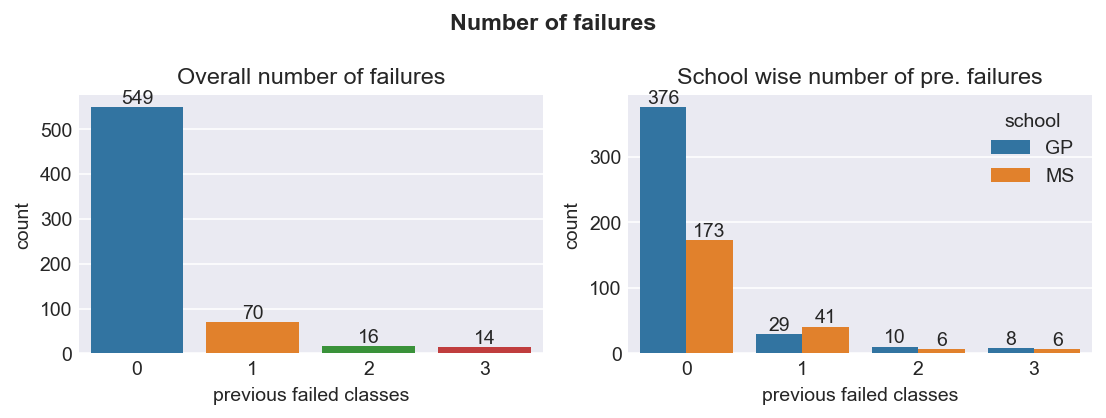

In [64]:
# Count of previous class failures.

fig, ax = plt.subplots(1,2,figsize=(8,3))
fig.suptitle("Number of failures", weight='bold')

sns.countplot(data=df, x='failures', ax=ax[0])
for i in ax[0].containers:
    ax[0].bar_label(i)
ax[0].set_title("Overall number of failures")
ax[0].set_xlabel("previous failed classes")

sns.countplot(data=df, x='failures', hue='school', ax=ax[1])
for i in ax[1].containers:
    ax[1].bar_label(i)
ax[1].set_title("School wise number of pre. failures")
ax[1].set_xlabel('previous failed classes')

plt.tight_layout()
plt.show()

_The above bar plots show number of failures. Left side overall failed classes, and right side school wise previous failures._

- Only 100 students had failed in previous classes.

- 41 students had failed once in Mousinho da Silveira, whereas only 29 students from Gabriel Pereira had failed once.

- 14 students have failed more than 3 times. Out of which 8 were from Gabriel Pereira and 6 were from Mousinho da Silveira.

Let's check **How the previously failed students are performing currently.**

In [65]:
# previous failed class count
pre_failed = student[student['failures'] > 0]
pre_failed.head()

school sex  age address famsize pstatus  medu  fedu      mjob      fjob  \
18      GP   M   17       U     GT3       T     3     2  services  services   
44      GP   F   16       U     LE3       T     2     2     other   at_home   
78      GP   M   17       U     GT3       T     2     1     other     other   
112     GP   F   16       U     GT3       T     2     2   at_home     other   
118     GP   M   17       R     GT3       T     1     3     other     other   

     reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
18   course   mother           1          1         3        no    yes  yes   
44   course   father           2          2         1       yes     no   no   
78     home   mother           2          1         3       yes    yes   no   
112    home   mother           1          2         1       yes     no   no   
118  course   father           3          2         1        no    yes   no   

    activities nursery higher internet romantic  famrel  freetime  goout  \
18         yes     yes    yes      yes       no       5         5      5   
44         yes     yes    yes      yes       no       4         3      3   
78         yes     yes     no      yes       no       4         5      1   
112        yes     yes    yes      yes       no       3         1      2   
118        yes     yes    yes      yes       no       5         2      4   

     dalc  walc  health  absences  g1  g2  g3        grade1      grade2  \
18      2     4       5         2   8   8   7          fail        fail   
44      2     2       5        14  10  11  11    sufficient  sufficient   
78      1     1       3         0   9   9  10          fail        fail   
112     1     1       5        12   8  10  10          fail  sufficient   
118     1     4       5        14  12  11  11  satisfactory  sufficient   

         grade3  
18         fail  
44   sufficient  
78   sufficient  
112  sufficient  
118  sufficient

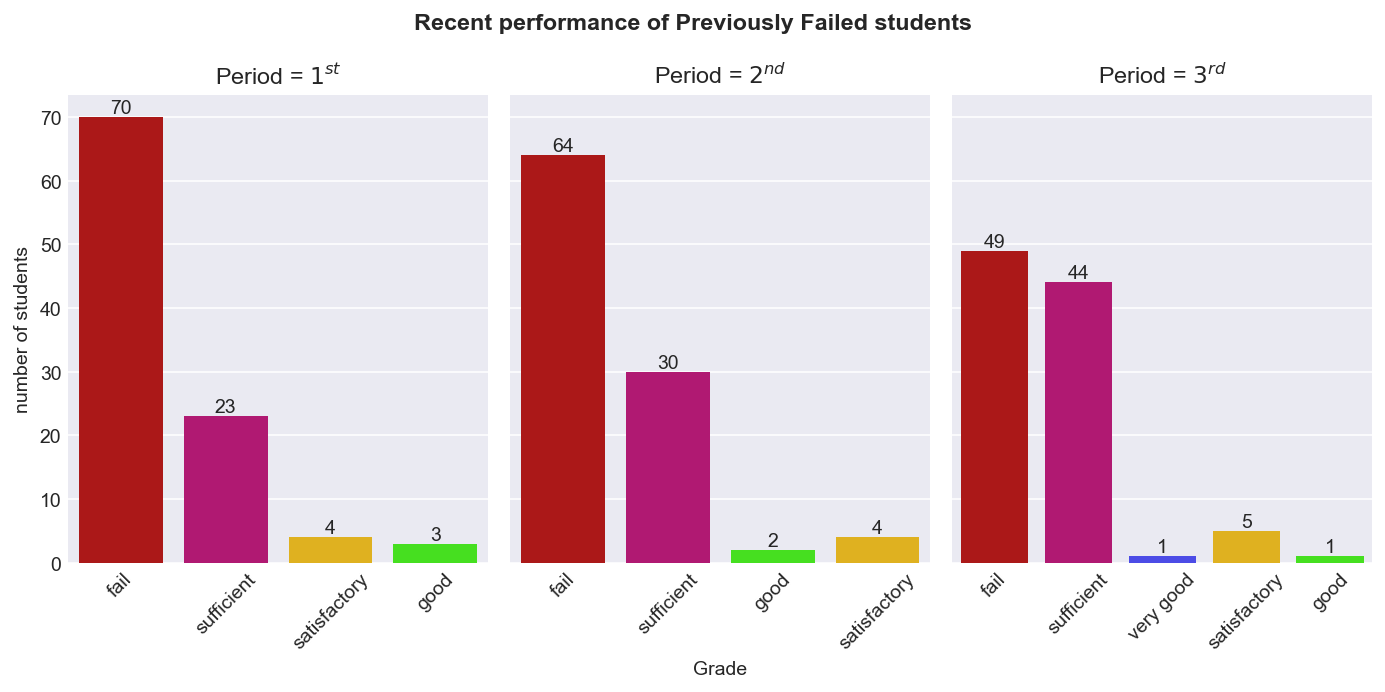

In [66]:
# Recent performance of previously failed students

# color palette: fail = #c30000, satisfactory = #ffc100, good= #33ff00, sufficient='#c90076', very good=#3333ff

fig, ax = plt.subplots(1,3, figsize=(10,5), sharey=True)
fig.suptitle("Recent performance of Previously Failed students", weight='bold')

sns.countplot(data=pre_failed, x='grade1', ax=ax[0], palette=['#c30000','#c90076', '#ffc100', '#33ff00'])
ax[0].set_title("Period = $1^{st}$")
ax[0].set_xlabel('')
ax[0].set_ylabel('number of students')
ax[0].set_xticks([0,1,2,3],['fail', 'sufficient', 'satisfactory', 'good'], rotation=45)
for i in ax[0].containers:
    ax[0].bar_label(i)

sns.countplot(data=pre_failed, x='grade2', ax=ax[1], palette=['#c30000','#c90076', '#33ff00', '#ffc100'])
ax[1].set_xticks([0,1,2,3],['fail','sufficient','good','satisfactory'],rotation=45)
ax[1].set_xlabel('Grade')
ax[1].set_title("Period = $2^{nd}$")
ax[1].set_ylabel('')
for i in ax[1].containers:
    ax[1].bar_label(i)

sns.countplot(data=pre_failed, x='grade3', ax=ax[2], palette=['#c30000','#c90076', '#3333ff', '#ffc100','#33ff00'])
ax[2].set_xticks([0,1,2,3,4],['fail','sufficient','very good','satisfactory','good'],rotation=45)
ax[2].set_xlabel('')
ax[2].set_title('Period = $3^{rd}$')
ax[2].set_ylabel('')
for i in ax[2].containers:
    ax[2].bar_label(i)


plt.tight_layout()

_Fig. shows recent performance of previously failed students in each period_

- Fifty percents of students who have failed in any class in past are performing well now in current work.

- In first period 70 students had failed which reduced to 49 in third period.

- One student performed very good in third period.

- This shows that students were improving there performance.

### Family support

----

The students are at there early adulthood, and needs family support for education. Some students had no family support.

In [67]:
# unique values
df.famsup.unique()

array(['no', 'yes'], dtype=object)

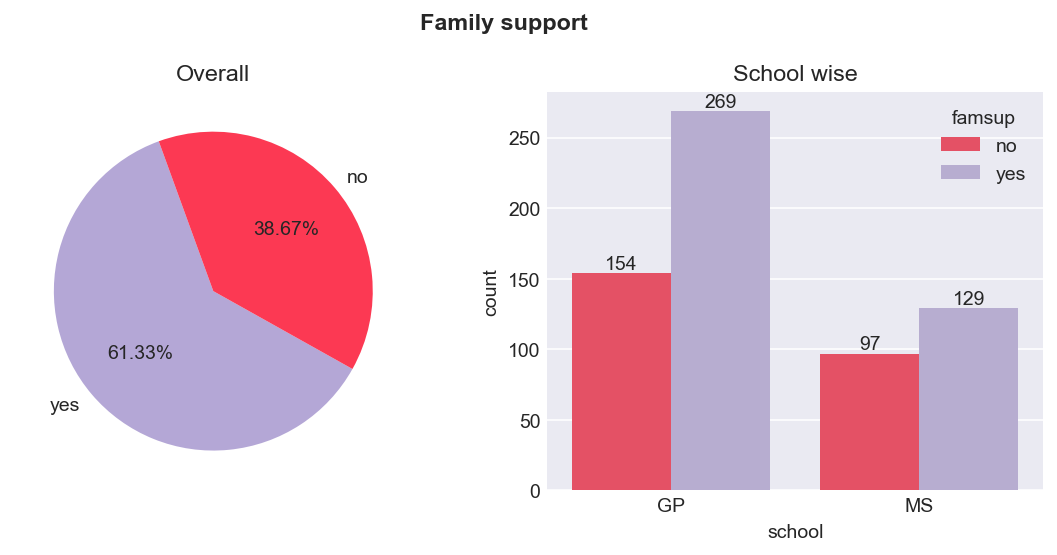

In [68]:
# family support
fig, ax = plt.subplots(figsize=(8,4))

plt.subplot(121)
pie = df.famsup.value_counts().plot(kind='pie',autopct='%.2f%%', colors=['#b4a7d6','#fc3953'],startangle=110)
plt.ylabel('')
plt.title("Overall")

plt.subplot(122)
bar = sns.countplot(data=df, x='school', hue='famsup', palette=['#fc3953', '#b4a7d6'])
plt.title("School wise")
for i in bar.containers:
    bar.bar_label(i)


fig.suptitle("Family support", weight='bold')
plt.tight_layout()
plt.show()

_Fig. shows number of students and whether they are getting family support or not. The pie chart shows overall student count in percentage, whereas the bar chart shows school wise number of students._

- 38.67% Students had no family support.

- From Gabriel Pereira 154 students and from Mousinho da Silveira 97 students were not used to get family support.

We will check other things in more detail in later study.

### Scholarship

Europe's education system is popular for its free education for students. The Schools included in the study had also provided financial help to its students.

In [69]:
# unique
df.schoolsup.unique()

array(['yes', 'no'], dtype=object)

In [70]:
school_sup_students = df[df['schoolsup'] == 'yes']
gp_school_scholarship = gp_school[gp_school['schoolsup'] == 'yes']
ms_school_scholarship = ms_school[ms_school['schoolsup'] == 'yes']

print("Total Number of students getting scholarship: ",school_sup_students.shape[0])
print("Total number of students from GP school getting scholarship: ",gp_school_scholarship.shape[0])
print("Total number of students from MS school getting scholarship: ",ms_school_scholarship.shape[0])

Total Number of students getting scholarship:  68
Total number of students from GP school getting scholarship:  56
Total number of students from MS school getting scholarship:  12


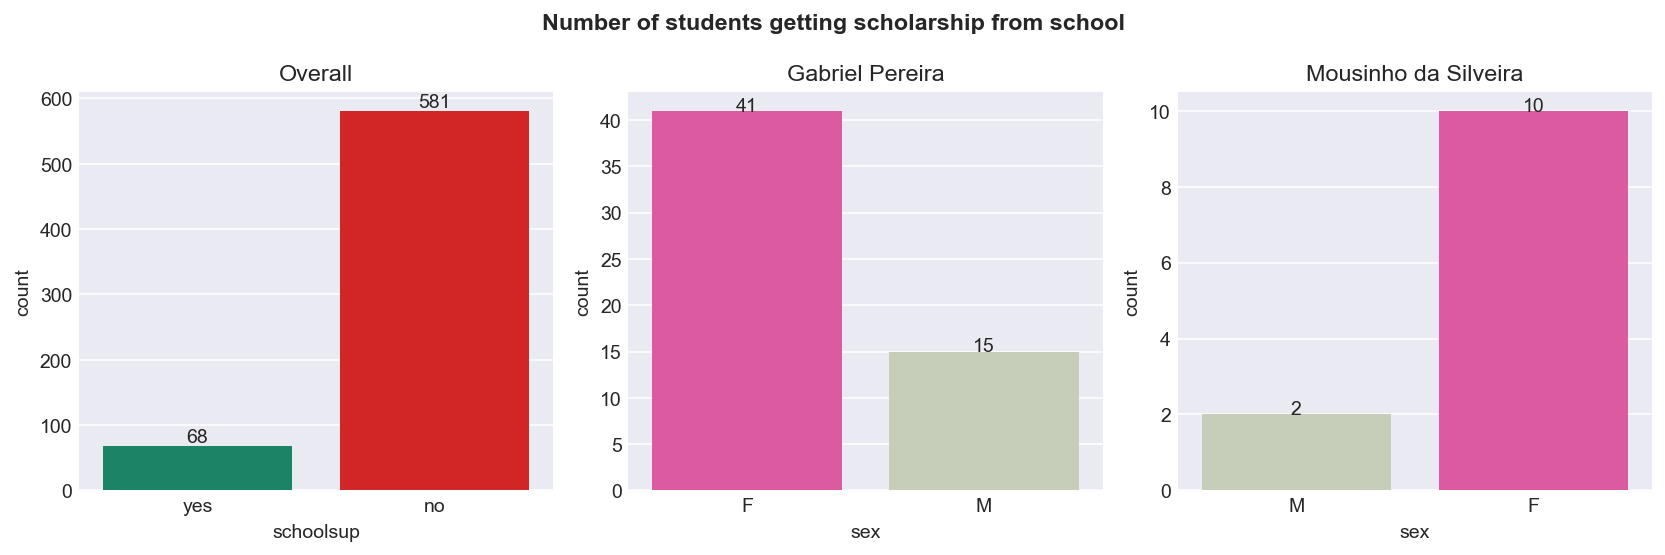

In [71]:
# Count of students getting financial help
fig, ax = plt.subplots(1,3, figsize=(12,4))
fig.suptitle("Number of students getting scholarship from school", weight='bold')

sns.countplot(data=df, x='schoolsup',ax=ax[0],palette=['#0b946f','#ef0909'])
ax[0].set_title("Overall")
for bar in ax[0].containers:
    ax[0].bar_label(bar)

sns.countplot(data=gp_school_scholarship, x='sex', ax=ax[1], palette=['#ef46a2','#c7d1b5'] )
ax[1].set_title('Gabriel Pereira')
for i in range(len(gp_school_scholarship.sex.unique())):
    ax[1].text(i, gp_school_scholarship.sex.value_counts().values[i], gp_school_scholarship.sex.value_counts().values[i], ha='center')

sns.countplot(data=ms_school_scholarship, x='sex', ax=ax[2], palette=['#c7d1b5','#ef46a2'])
ax[2].set_title("Mousinho da Silveira")
for i in range(len(ms_school_scholarship.sex.unique())):
    ax[2].text(i, ms_school_scholarship.sex.value_counts().sort_values().values[i], ms_school_scholarship.sex.value_counts().sort_values().values[i], ha='center')

plt.tight_layout()

_Fig. shows number of students that are getting financial help from schools. Left plot shows overall number of students. Middle plot and right one shows gender wise number of student in both the schools_


- Schools had supported 68 students in that batch.

- Female students had scored more scholarships than male.

- In Gabriel Pereira only 15 male and in Mousinho da Silveira only 2 male students got scholarship.


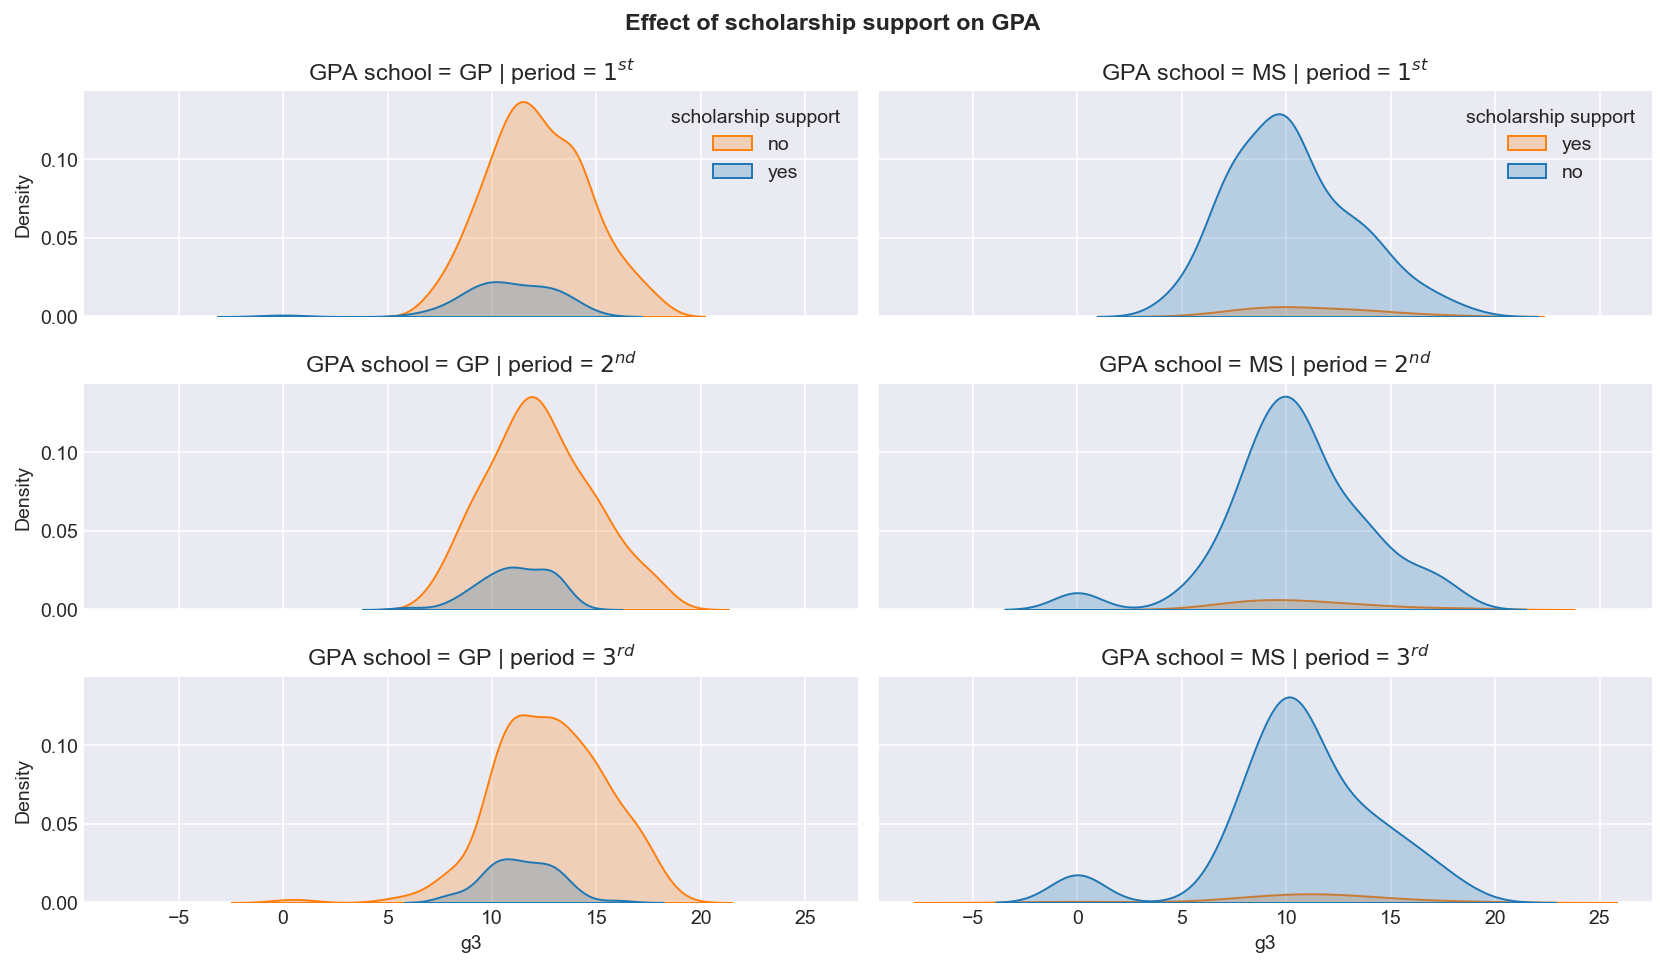

In [72]:
# Does students got financial help performed well? 
fig, ax=plt.subplots(3,2, figsize=(12,7), sharex=True, sharey=True)
fig.suptitle("Effect of scholarship support on GPA", weight='bold')

sns.kdeplot(ax=ax[0,0],data=gp_school, x='g1', hue='schoolsup', shade=True)
ax[0,0].set_title("GPA school = GP | period = $1^{st}$")
ax[0,0].legend(title='scholarship support', labels=['no', 'yes'])

sns.kdeplot(ax=ax[1,0], data=gp_school, x='g2', hue='schoolsup', shade=True, legend=False)
ax[1,0].set_title("GPA school = GP | period = $2^{nd}$")

sns.kdeplot(ax=ax[2,0], data=gp_school, x='g3', hue='schoolsup', shade=True, legend=False)
ax[2,0].set_title("GPA school = GP | period = $3^{rd}$")


sns.kdeplot(ax=ax[0,1],data=ms_school, x='g1', hue='schoolsup',shade=True)
ax[0,1].set_title("GPA school = MS | period = $1^{st}$")
ax[0,1].legend(title='scholarship support', labels=['yes', 'no'])

sns.kdeplot(ax=ax[1,1], data=ms_school, x='g2', hue='schoolsup', shade=True, legend=False)
ax[1,1].set_title("GPA school = MS | period = $2^{nd}$")

sns.kdeplot(ax=ax[2,1], data=ms_school, x='g3', hue='schoolsup', legend=False, shade=True)
ax[2,1].set_title("GPA school = MS | period = $3^{rd}$")

plt.tight_layout()

_Fig shows how does the students are performing who are not getting scholarship in comparison to those who are not getting scholarship. The left column represents students of Gabriel Pereira and Right column shows students of Mousinho da Silveira._

- In the left side plots, for the school of Gabriel Pereira, the curve for students who got scholarship is not pointed, rather it is wide or flat on tip.

- Also the curves for students of Mousinho da Silveira who are getting scholarship the plot shows normal distribution and their pick is more right to the pick of the curve for students who are not getting scholarship.

- This plot concludes that students who got scholarship support used to perform better than who are not getting financial support from school.

Let's see which household they belonged to those students who got scholarship from school 

In [73]:
# Based on Mother fathers employment
scholarship_df1 = pd.crosstab(school_sup_students.mjob, school_sup_students.fjob) # Which group people are getting scholarship
scholarship_df1

fjob      at_home  health  other  services  teacher
mjob                                               
at_home         1       0     10         1        1
health          0       1      0         1        0
other           4       1     20         3        3
services        0       2      7         7        2
teacher         0       1      0         2        1

In [74]:
# Based on parent's employment
scholarship_df2 = pd.crosstab(school_sup_students.fedu, school_sup_students.medu) # Which group people are getting scholarship
scholarship_df2

medu   1   2  3  4
fedu              
0      2   0  0  0
1     10   3  2  0
2      4  11  3  2
3      0   5  6  6
4      1   1  4  8

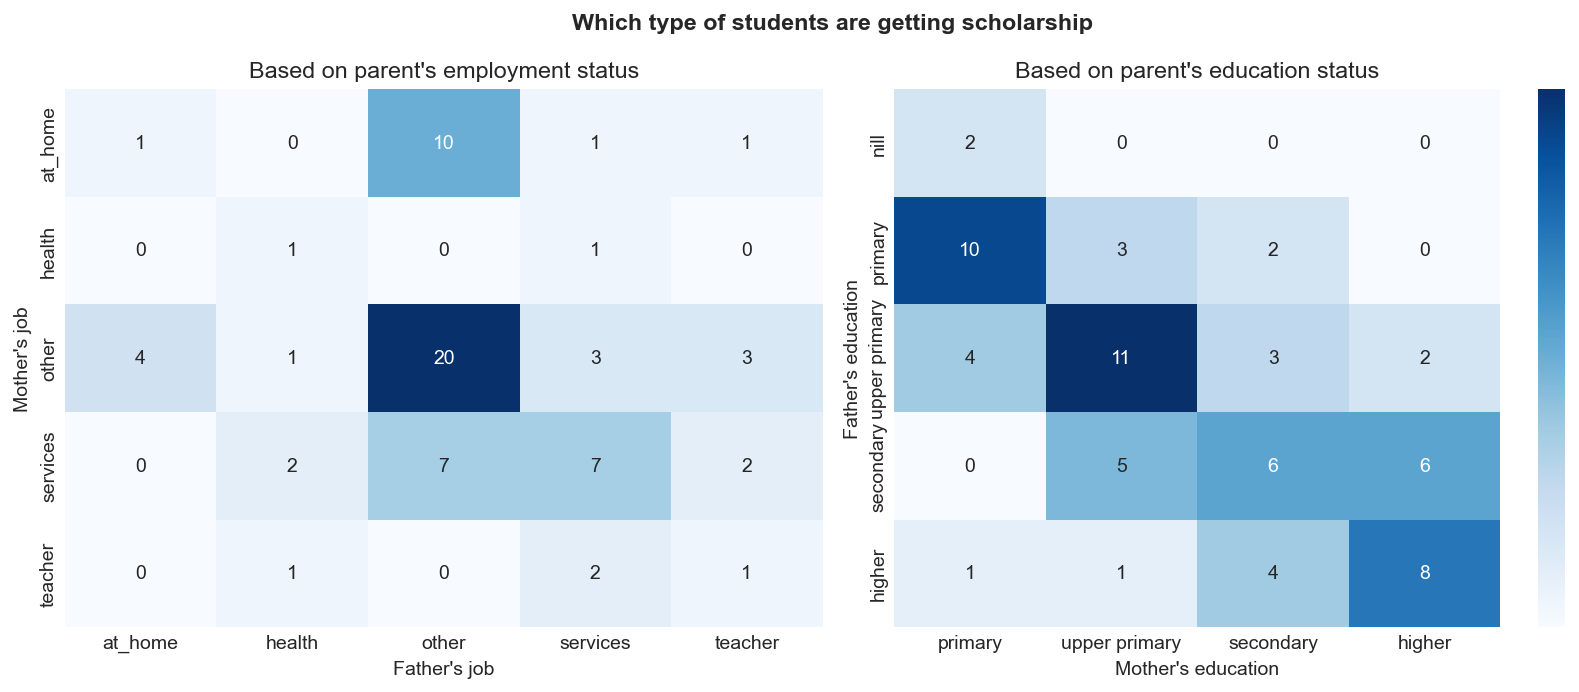

In [75]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
fig.suptitle("Which type of students are getting scholarship", weight='bold')

sns.heatmap(ax=ax[0], data=scholarship_df1, annot=True, cmap='Blues', cbar=False)
ax[0].set_title("Based on parent's employment status")
# cbar = ax[0].collections[0].colorbar
# cbar.set_ticks([])
ax[0].set_xlabel("Father's job")
ax[0].set_ylabel("Mother's job")

sns.heatmap(ax=ax[1], data= scholarship_df2, annot=True, cmap='Blues', yticklabels=['nill', 'primary','upper primary', 'secondary','higher'], xticklabels=['primary','upper primary','secondary','higher'])
cbar = ax[1].collections[0].colorbar
cbar.set_ticks([])
ax[1].set_title("Based on parent's education status")
ax[1].set_ylabel("Father's education")
ax[1].set_xlabel("Mother's education")
# ax[1].set_yticks([0,1,2,3], ['primary','upper primary','secondary','higher'])
# ax[1].set_xticks([0,1,2,3,4], ['nill', 'primary','upper primary', 'secondary','higher'])

plt.tight_layout()
plt.show()

_Fig. shows number of students getting financial support from schools based on their parents eduction and employment status._ Left heatmap shows employment status, and right heat map shows education qualification of parents._

- More number of students were getting scholarship from the household whose parents are doing other works. May be either these students are from economically deprived houses holds.

- Highly educated parents children are also getting school support.

- This says that schools were helping students who were financially struggling and students who were performing excellency in their studies.

### Extra Paid Classes

----

- Some students had taken extra paid classes of Math or Portuguese.

In [76]:
df.paid.unique()

array(['no', 'yes'], dtype=object)

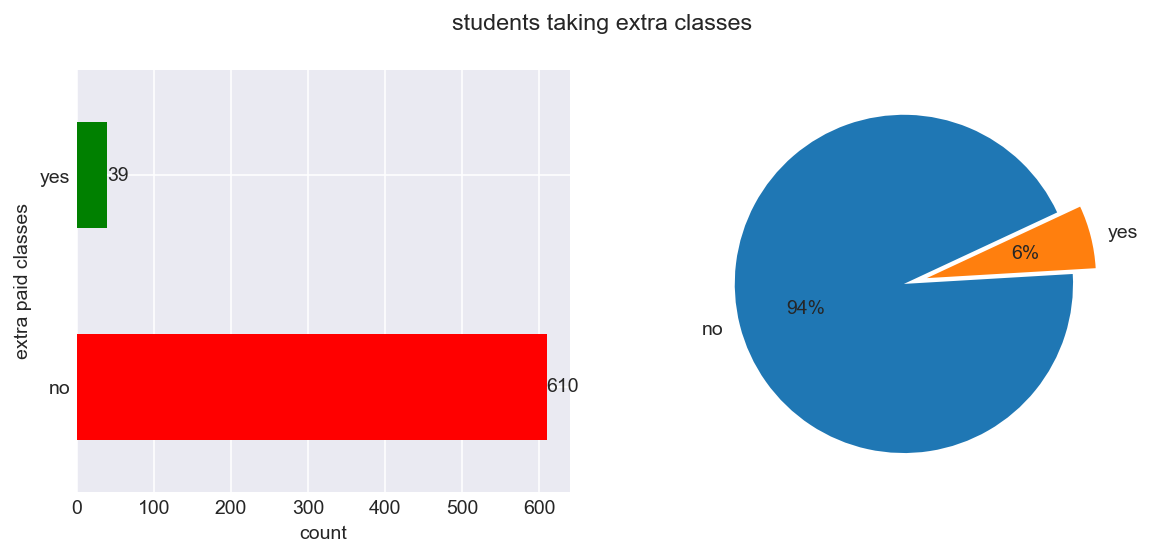

In [77]:
# Extra classes
fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(121)
bar = df.paid.value_counts().plot.barh(color=['red','green'])
plt.xlabel('count')
plt.ylabel('extra paid classes')
for i in bar.containers:
    bar.bar_label(i)

plt.subplot(122)
pie = df.paid.value_counts().plot.pie(autopct='%.0f%%', explode=(0.07,0.07), startangle=25)
plt.ylabel('')

fig.suptitle("students taking extra classes")
plt.show()

_Above plots show number of students taking extra classes on Math or Portuguese._

- Only 39 which is 6% of all students had taken extra classes. 

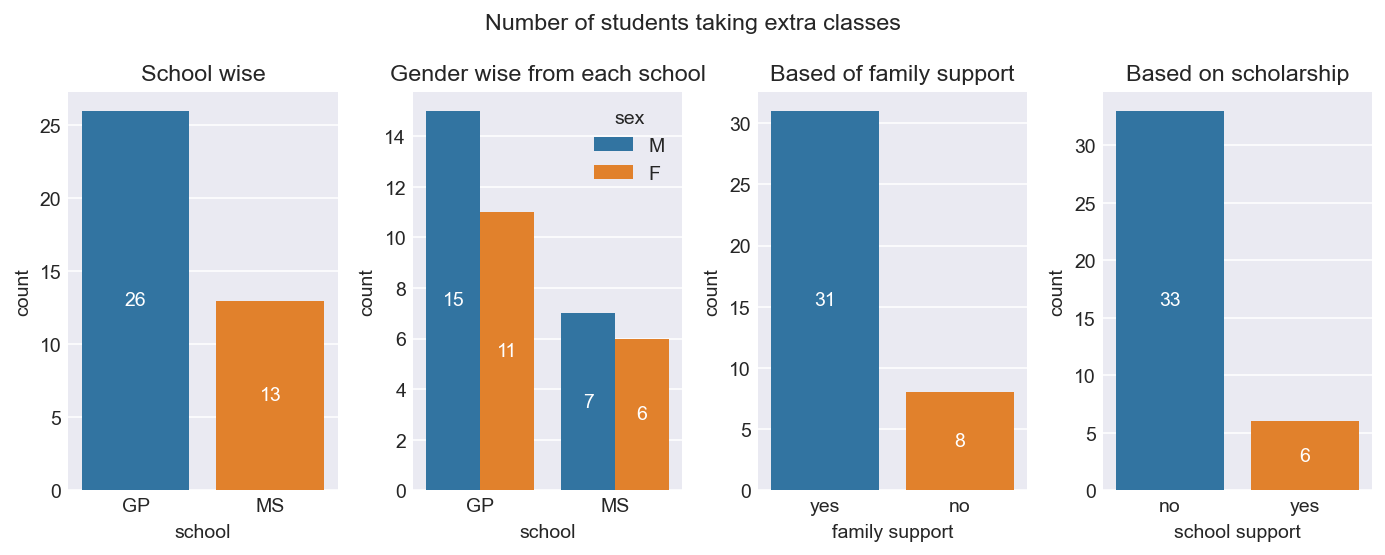

In [78]:
# Extra classes
paid_classes = df[df['paid'] == 'yes']

fig, ax = plt.subplots(1,4,figsize=(10,4))
fig.suptitle("Number of students taking extra classes")

sns.countplot(ax=ax[0], data=paid_classes, x='school')
ax[0].set_title("School wise")
for i in ax[0].containers:
    ax[0].bar_label(i, label_type='center', color='white')

sns.countplot(ax=ax[1], data=paid_classes, x='school', hue='sex')
ax[1].set_title("Gender wise from each school")
for i in ax[1].containers:
    ax[1].bar_label(i, label_type='center', color='white')

sns.countplot(ax=ax[2], data=paid_classes, x='famsup')
ax[2].set_title("Based of family support")
ax[2].set_xlabel('family support')
for i in ax[2].containers:
    ax[2].bar_label(i, label_type='center', color='white')

sns.countplot(ax=ax[3], data=paid_classes, x='schoolsup')
ax[3].set_title("Based on scholarship")
ax[3].set_xlabel('school support')
for i in ax[3].containers:
    ax[3].bar_label(i, label_type='center', color='white')


plt.tight_layout()
plt.show()

_Above bar plots shows number of students who have taken extra paid classes or Mathematics or Portuguese based on school(left), gender(middle-left), family support(middle-right) and school support(right)_

- 26 students from Gabriel Pereira and 13 students from Mousinho da Silveira had taken extra classes.

- Out of these, 15 were female from Gabriel Pereire and 7 were female from MOusinho da Silveira. 

- Only 6 students who were getting school support had taken extra classes.

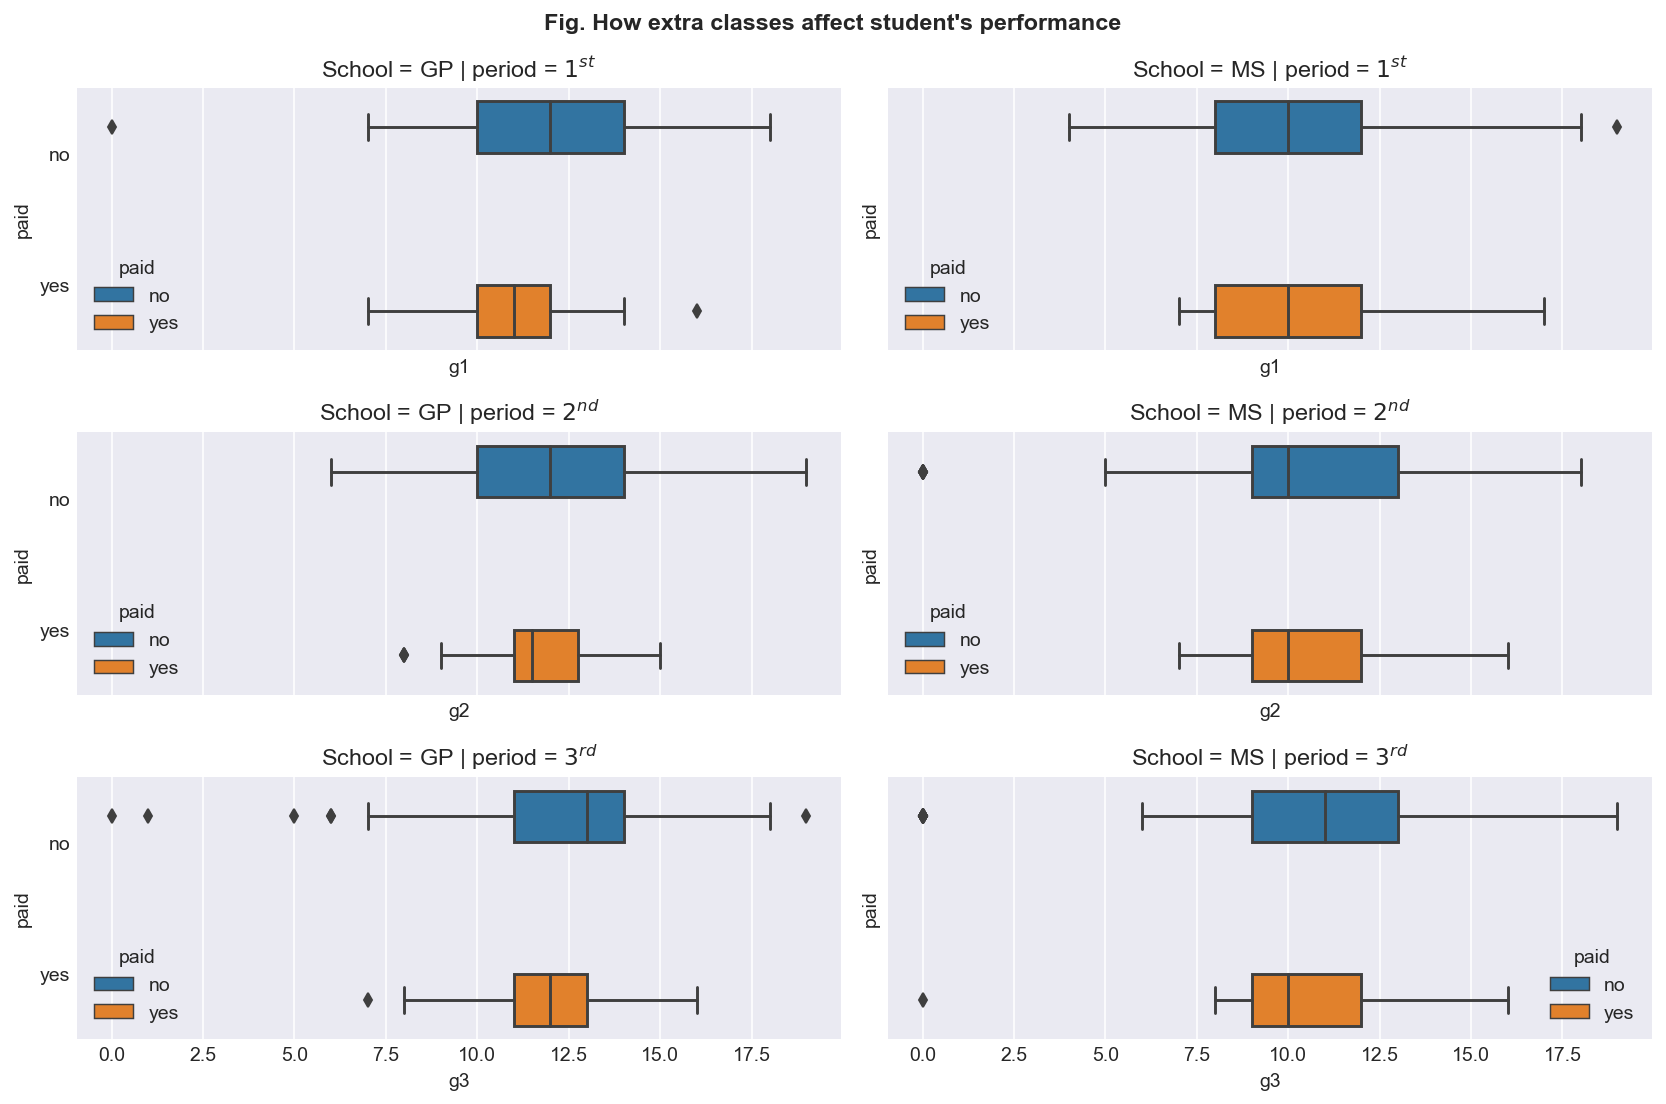

In [79]:
# Effect of Extra classes on students GPA
fig,ax = plt.subplots(3,2, figsize=(12,8), sharex=True, sharey=True)
fig.suptitle("Fig. How extra classes affect student's performance", weight='bold')

sns.boxplot(data=gp_school, x='g1', y='paid', hue='paid', ax=ax[0,0])
ax[0,0].set_title("School = GP | period = $1^{st}$")

sns.boxplot(data=gp_school, x='g2', y='paid', hue='paid', ax=ax[1,0])
ax[1,0].set_title("School = GP | period = $2^{nd}$")

sns.boxplot(data=gp_school, x='g3', y='paid', hue='paid', ax=ax[2,0])
ax[2,0].set_title("School = GP | period = $3^{rd}$")

sns.boxplot(data=ms_school, x='g1', y='paid', hue='paid', ax=ax[0,1])
ax[0,1].set_title("School = MS | period = $1^{st}$")

sns.boxplot(data=ms_school, x='g2', y='paid', hue='paid', ax=ax[1,1])
ax[1,1].set_title("School = MS | period = $2^{nd}$")

sns.boxplot(data=ms_school, x='g3', y='paid', hue='paid', ax=ax[2,1])
ax[2,1].set_title("School = MS | period = $3^{rd}$")

plt.tight_layout()

_These box plots compares students' performance who had taken extra classes with students who had not taken extra classes. Left column for Gabriel Pereira School and right column for Mousinho da Silveira school. Rows present 3 periods each._

- From the plots one can see, students who had taken extra classes had not performed well in comparison to the students who did not take extra classes.

- This indicates that students who took extra classes were struggling with that subject.

### Effect of Extra curricular activities on Students performance

-----

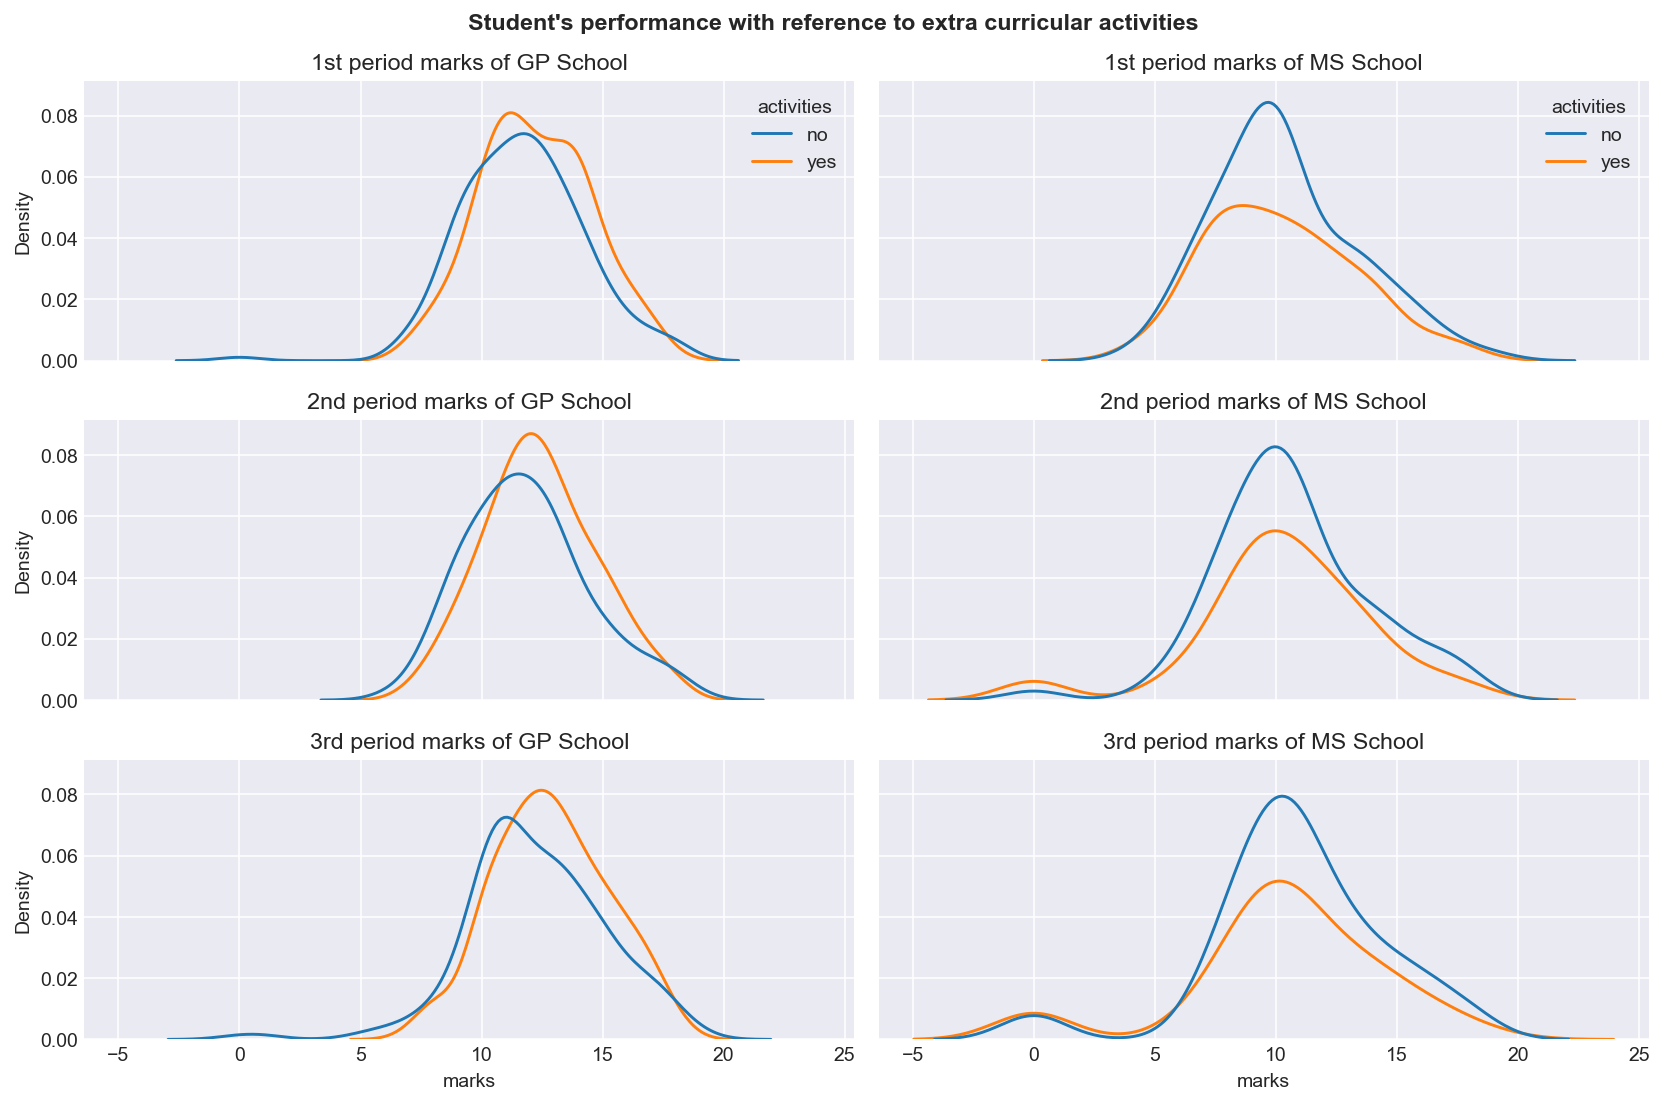

In [80]:
fig, ax = plt.subplots(3,2, figsize=(12,8), sharex=True, sharey=True)

sns.kdeplot(ax=ax[0,0],data=df[df['school']=='GP'], x='g1', hue='activities')
sns.kdeplot(ax=ax[0,1],data=df[df['school']=='MS'], x='g1', hue='activities')
sns.kdeplot(ax=ax[1,0],data=df[df['school']=='GP'], x='g2', hue='activities', legend=False)
sns.kdeplot(ax=ax[1,1],data=df[df['school']=='MS'], x='g2', hue='activities', legend=False)
sns.kdeplot(ax=ax[2,0],data=df[df['school']=='GP'], x='g3', hue='activities', legend=False)
sns.kdeplot(ax=ax[2,1],data=df[df['school']=='MS'], x='g3', hue='activities', legend=False)

ax[0,0].set_title("1st period marks of GP School")
ax[0,1].set_title("1st period marks of MS School")
ax[1,0].set_title("2nd period marks of GP School")
ax[1,1].set_title("2nd period marks of MS School")
ax[2,0].set_title("3rd period marks of GP School")
ax[2,1].set_title("3rd period marks of MS School")

ax[2,0].set_xlabel('marks')
ax[2,1].set_xlabel('marks')
fig.suptitle("Student's performance with reference to extra curricular activities", weight='bold')
plt.tight_layout()
plt.show()

_Comparison among students of both the schools with the amount of time they spend on extra curricular activities. Left Gabriel Pereira school and in right Mousingho da Silveira school._

- In Gabriel Pereira school students who used to participate in extra curricular activities performed well than non-extra curricular performing students.

- But, in Mousinho da Silveira students who used to perform extra curricular activities shown bad performance in exams.

### Nursery School

Nursery school is the first schooling time for children. In this dataset som students had not attended the nursery school. Let's check how they perform now.

In [81]:
df.nursery.unique()

array(['yes', 'no'], dtype=object)

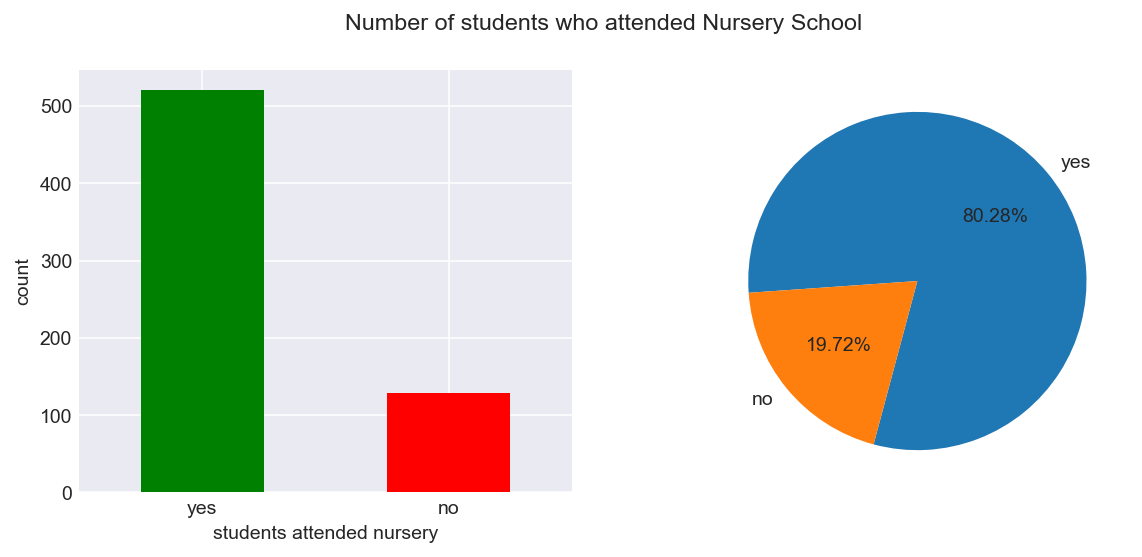

In [82]:
# Number of students attended nursery school

fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(121)
bar = df.nursery.value_counts().plot.bar(color=['g','r'])
plt.xlabel('students attended nursery')
plt.ylabel('count')
plt.xticks(rotation=0)

plt.subplot(122)
pie = df.nursery.value_counts().plot.pie(autopct="%.2f%%", startangle=255)
plt.ylabel('')

fig.suptitle('Number of students who attended Nursery School')
plt.show()

- Only 19.72% students had not attended nursery school.

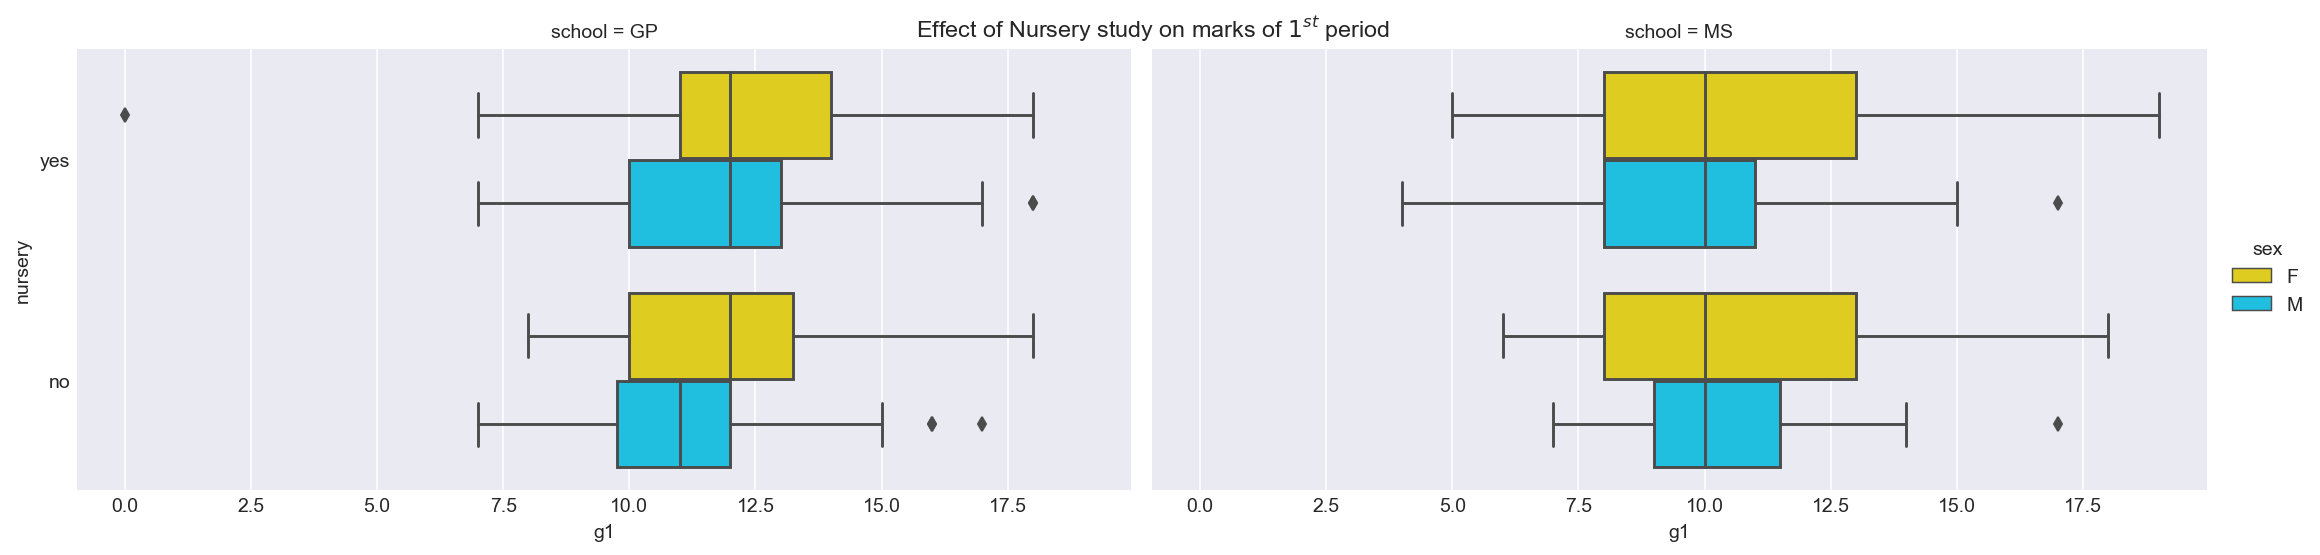

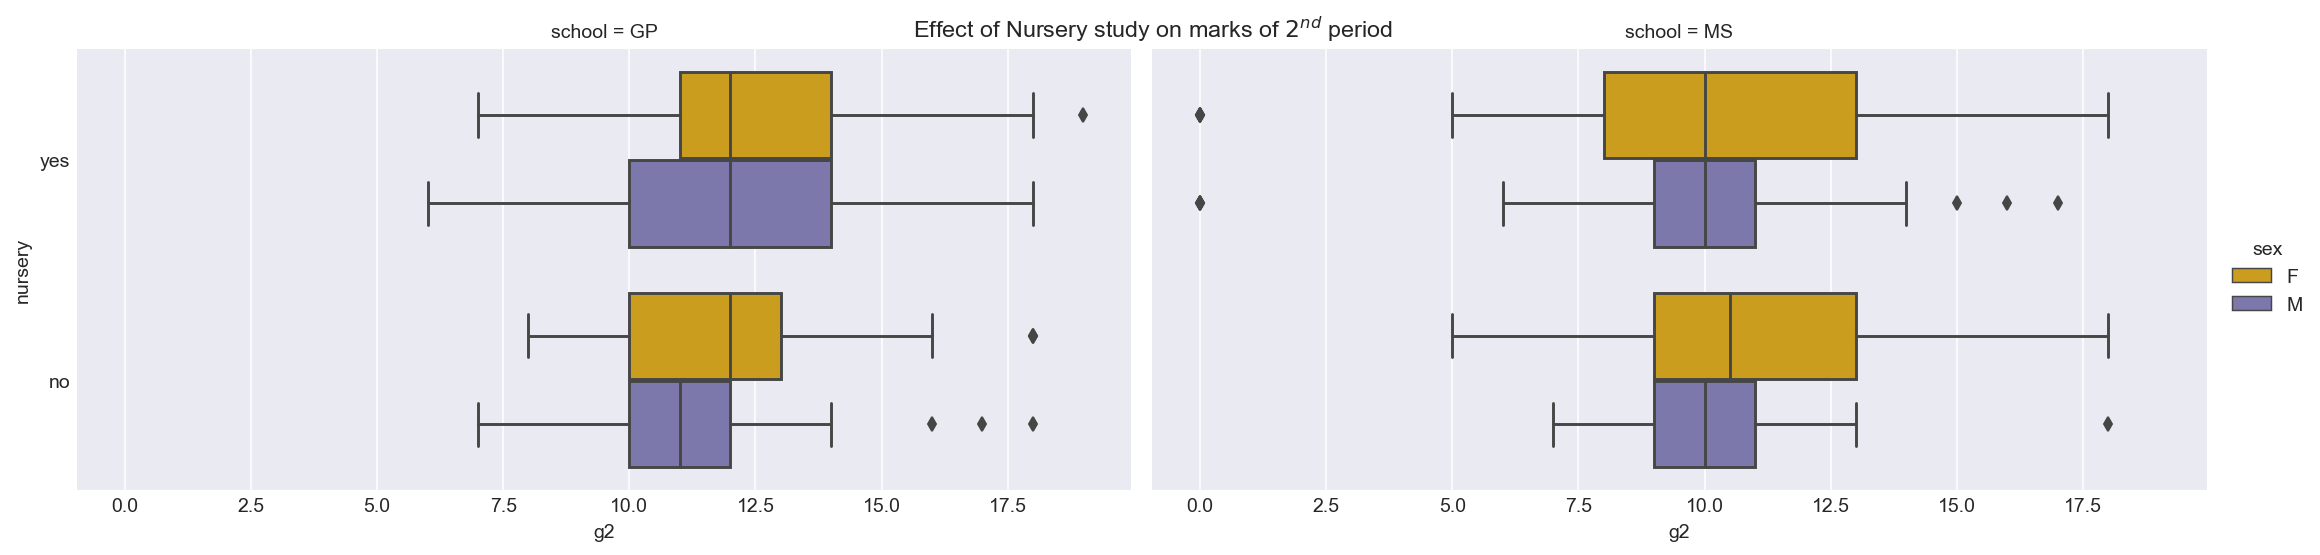

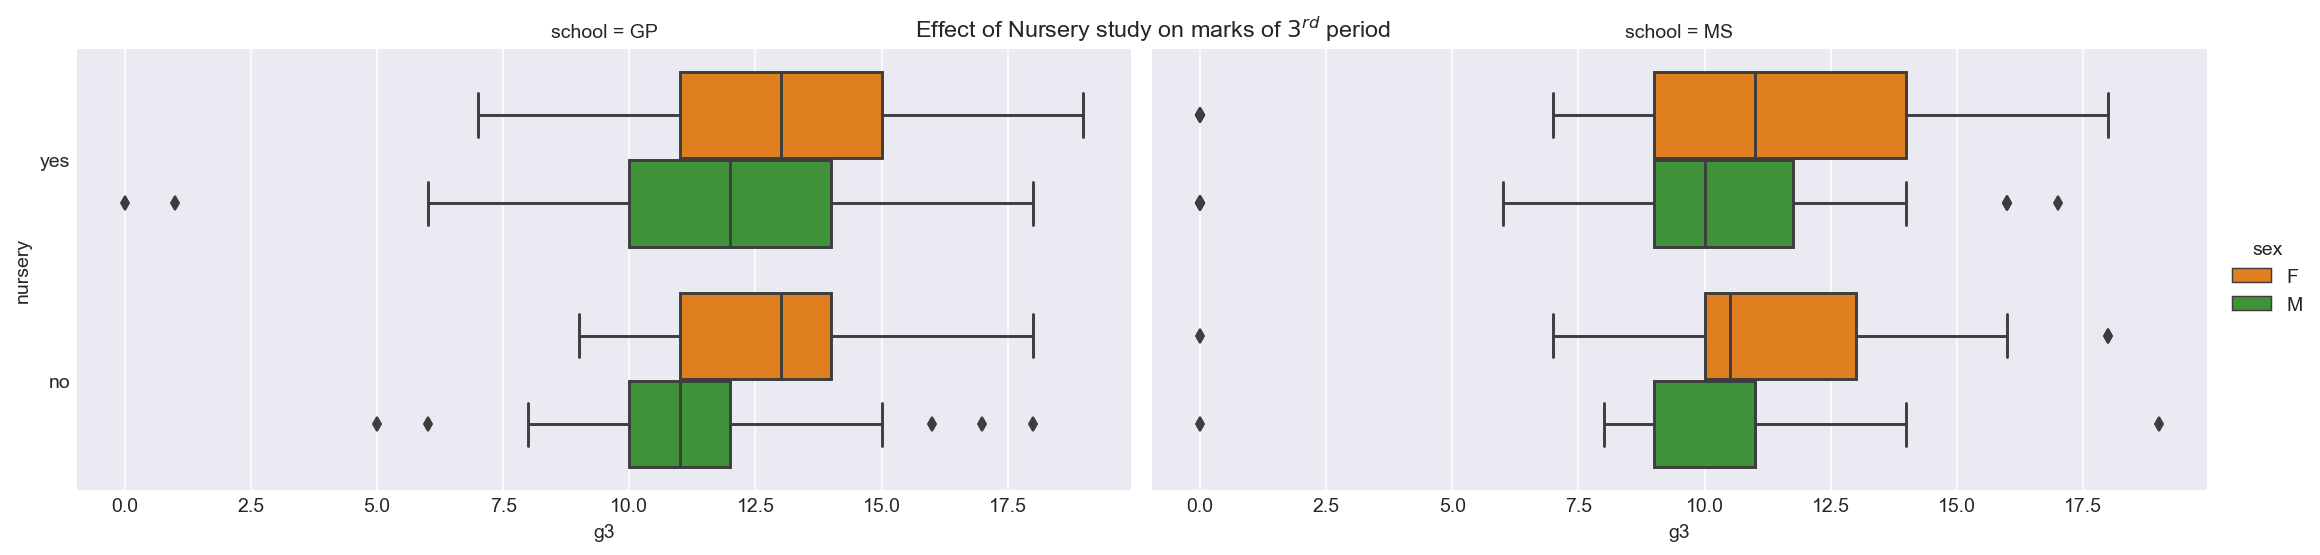

In [83]:
# Effect of nursery school on students

ax1 = sns.catplot(x='g1', y='nursery', hue='sex',col='school', data=df, kind='box', palette='jet_r', height=4, aspect=2)
ax1.fig.suptitle("Effect of Nursery study on marks of $1^{st}$ period")

ax2 = sns.catplot(x='g2', y='nursery', hue='sex', col='school', data=df, kind='box', palette='Dark2_r', height=4, aspect=2)
ax2.fig.suptitle("Effect of Nursery study on marks of $2^{nd}$ period")

ax3 = sns.catplot(x='g3', y='nursery', hue='sex', col='school', data=df, kind='box', palette='Paired_r', height=4, aspect=2)
ax3.fig.suptitle("Effect of Nursery study on marks of $3^{rd}$ period")
plt.show()

_The above figure compares effect of nursery education on students performance in all three periods._

- Nursery study sometimes does not affect much on students who are more likely to study at home or their parents teach them at home. However it is necessary for students.

- In Gabriel Pereira school, students with nursery education are perfroming better than the student swho don't have nursery education.

- In Mousinho da Silveira a few student with no nursery school had topped in the class too.

- Overall students with nursery school perform better.

### Internet Access

---

In [84]:
df.internet.unique()

array(['no', 'yes'], dtype=object)

In [85]:
pd.crosstab(df.internet, df.sex)

sex         F    M
internet          
no         98   53
yes       285  213

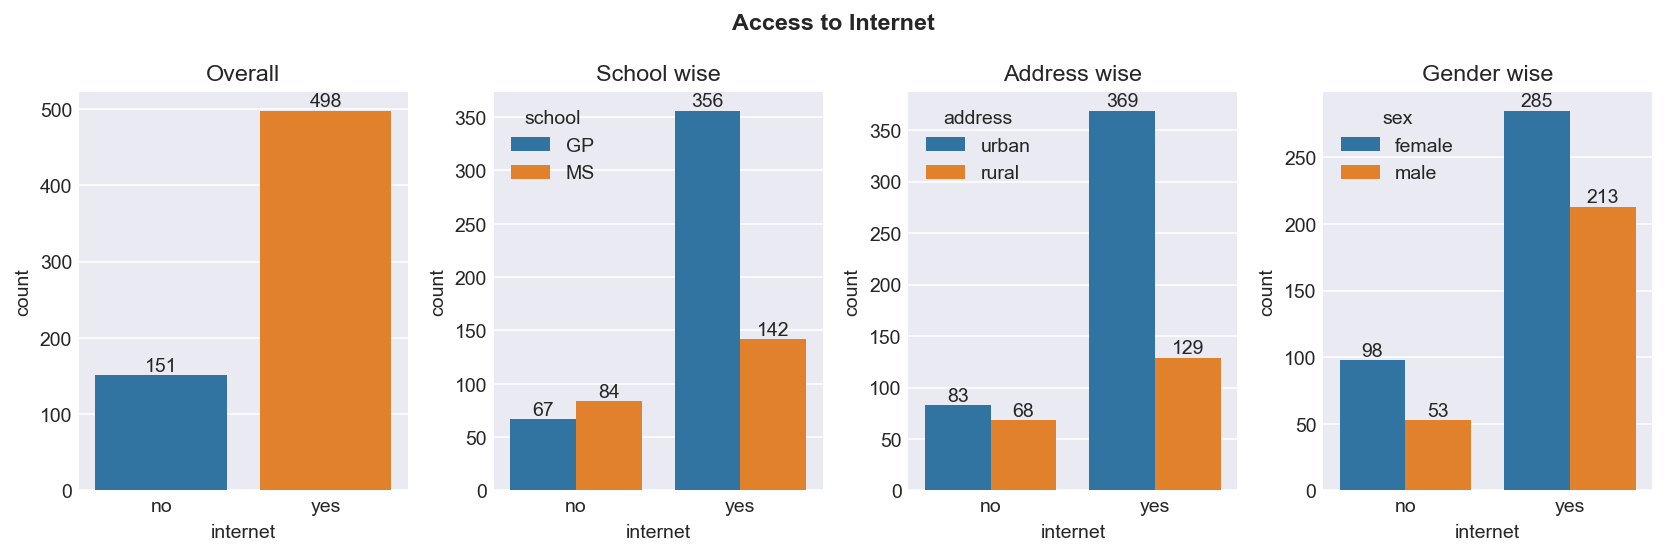

In [86]:
# Internet Users
fig, ax = plt.subplots(1,4, figsize=(12,4))
fig.suptitle("Access to Internet", weight='bold')

sns.countplot(data=df, x='internet', ax=ax[0])
ax[0].set_title("Overall")
for bar in ax[0].containers:
    ax[0].bar_label(bar)


sns.countplot(data=df, x='internet', hue='school', ax=ax[1])
ax[1].set_title("School wise")
for bar in ax[1].containers:
    ax[1].bar_label(bar)

sns.countplot(data=df, x='internet', hue='address', ax=ax[2])
ax[2].set_title("Address wise")
ax[2].legend(loc='upper left', title='address', labels=['urban','rural'])
for bar in ax[2].containers:
    ax[2].bar_label(bar)

sns.countplot(data=df, x='internet', hue='sex', ax=ax[3])
ax[3].set_title("Gender wise")
ax[3].legend(loc='upper left', title='sex', labels=['female','male'])
for bar in ax[3].containers:
    ax[3].bar_label(bar)

plt.tight_layout()

_Bar plots shows internet usage of students. Left-overall how many students had access to internet, middle-left - School wise student count, middle-right - area wise, and right - gender wise access to internet_


- Very few students had no access to internet.

- More students of Gabriel Pereira had access to internet where as among no access to internet students Mousinho da Silveira school students had no access in comparison to Gabriel Pereira school students.

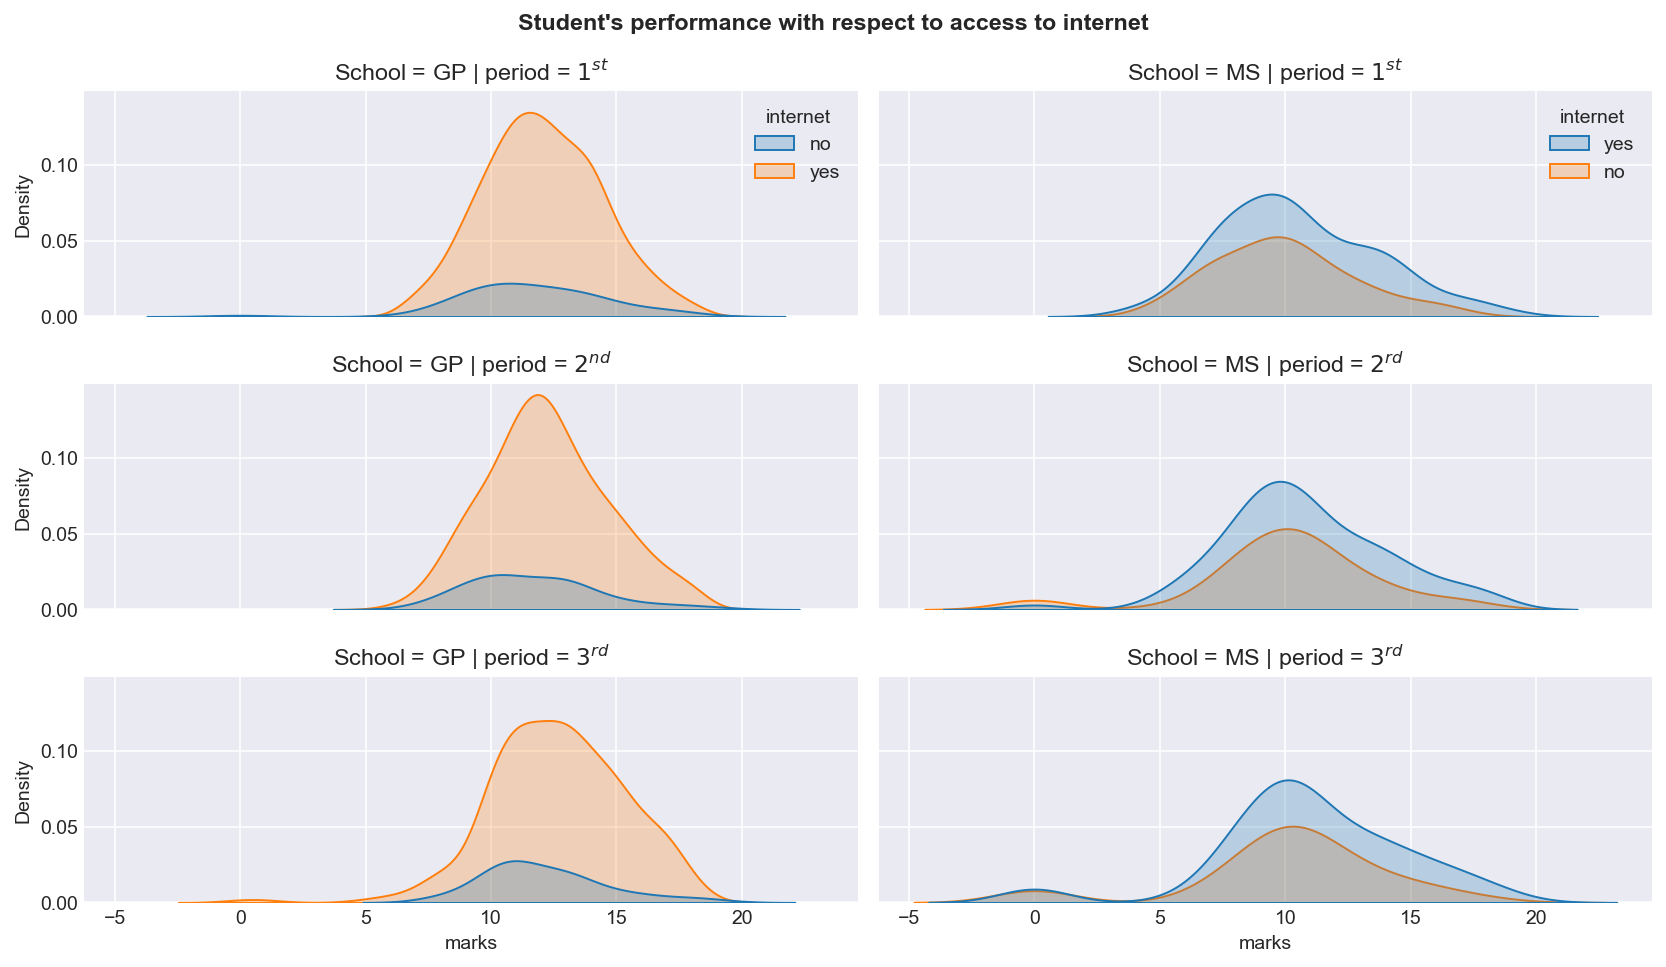

In [87]:
# Effect of Internet use on students performance

fig, ax = plt.subplots(3,2, figsize=(12,7), sharex=True, sharey=True)
fig.suptitle("Student's performance with respect to access to internet", weight='bold')

sns.kdeplot(data=gp_school, x='g1', hue='internet', ax=ax[0,0], shade=True)
ax[0,0].set_title("School = GP | period = $1^{st}$")

sns.kdeplot(data=gp_school, x='g2', hue='internet', ax=ax[1,0], legend=False, shade=True)
ax[1,0].set_title("School = GP | period = $2^{nd}$")

sns.kdeplot(data=gp_school, x='g3', hue='internet', ax=ax[2,0], legend=False, shade=True)
ax[2,0].set_title("School = GP | period = $3^{rd}$")
ax[2,0].set_xlabel('marks')

sns.kdeplot(data=ms_school, x='g1', hue='internet', ax=ax[0,1], shade=True)
ax[0,1].set_title("School = MS | period = $1^{st}$")

sns.kdeplot(data=ms_school, x='g2', hue='internet', ax=ax[1,1], legend=False, shade=True)
ax[1,1].set_title("School = MS | period = $2^{rd}$")

sns.kdeplot(data=ms_school, x='g3', hue='internet', ax=ax[2,1], legend=False, shade=True)
ax[2,1].set_title("School = MS | period = $3^{rd}$")
ax[2,1].set_xlabel('marks')

plt.tight_layout()

_Above distribution plots compare students' performance with respect to access to internet. Left column for Gabriel Pereira school and right side for Mousinho da Silveira school. rows represent each three periods._

- From the curves we can see that students with internet access are performing relatively better than students who did not have access to internet.

### Romantic Relationship

---

- Some students were in relationship and some were not.

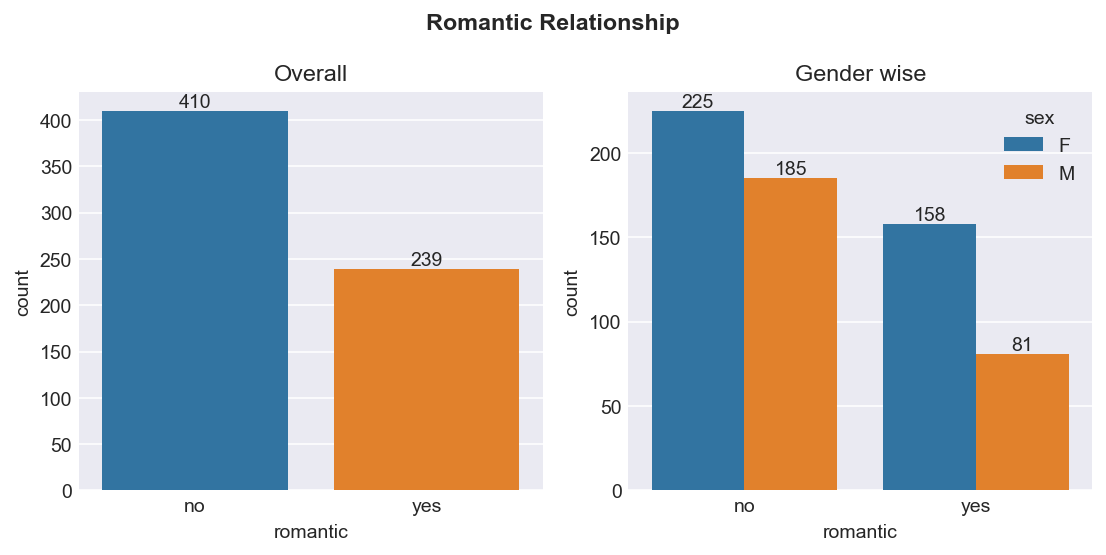

In [88]:
# relationship status of students
fig, ax = plt.subplots(figsize=(8,4))
plt.suptitle("Romantic Relationship", weight='bold')

plt.subplot(121)
bar1 = sns.countplot(data=df, x='romantic')
plt.title("Overall")
for i in bar1.containers:
    bar1.bar_label(i)

plt.subplot(122)
bar2 = sns.countplot(data=df, x='romantic', hue='sex')
for i in bar2.containers:
    bar2.bar_label(i)

plt.title("Gender wise")
plt.tight_layout()
plt.show()

_Romantic relationship of Students overall (left) and gender wise (right)_

- Only 239 students were in romantic relationship out of which 158 were Female and 81 were male.

### Outing

---

Outing and socializing is necessary for students, it encourages to speak to unknown people or cope up with study pressure. 

In [89]:
# Unique values
df.goout.unique()

array([4, 3, 2, 1, 5])

Outing is scaled in a scale of 1 to 5 as 1 is very less and 5 is very frequently.

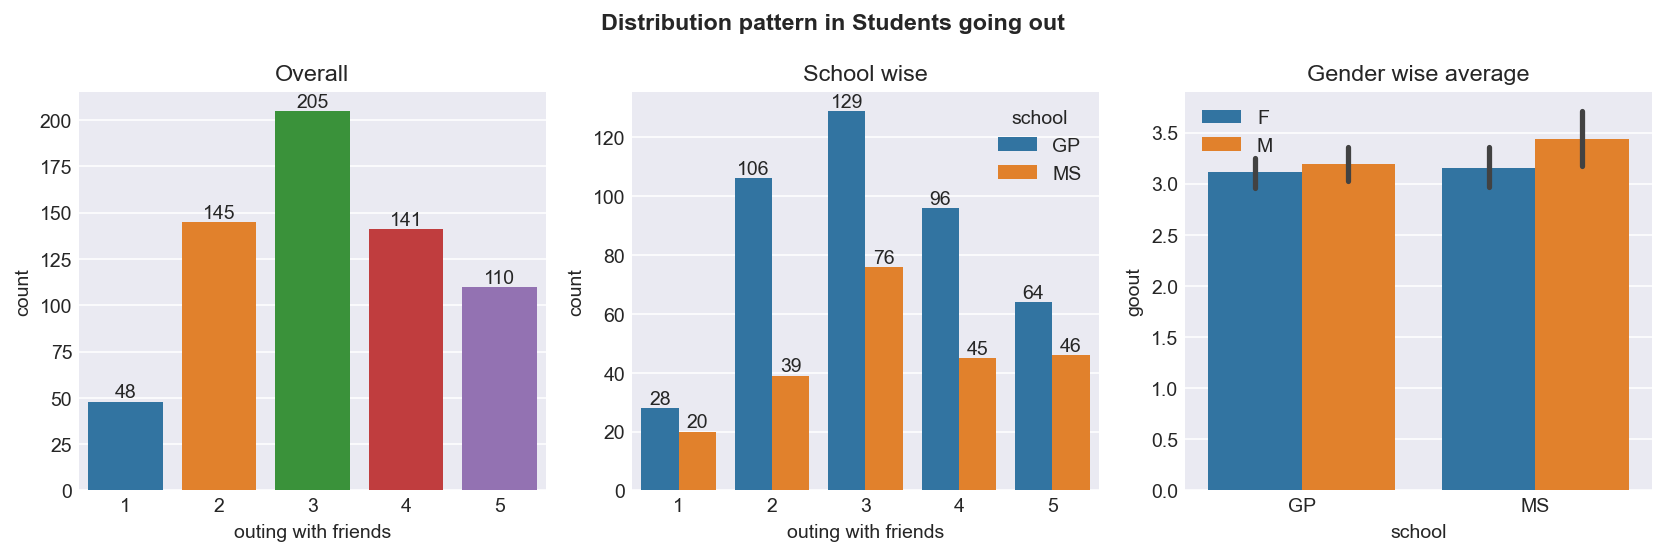

In [90]:
fig, ax = plt.subplots(1,3,figsize=(12,4))

sns.countplot(data=df, x='goout', ax=ax[0])
ax[0].set_xlabel('outing with friends')
for i in ax[0].containers:
    ax[0].bar_label(i)
ax[0].set_title("Overall")

sns.countplot(data=df, x='goout', hue='school', ax=ax[1])
ax[1].set_xlabel('outing with friends')
ax[1].set_title("School wise")
for i in ax[1].containers:
    ax[1].bar_label(i)


sns.barplot(data=df, x='school',y='goout', hue='sex',ax=ax[2])
ax[2].legend(loc='upper left')
ax[2].set_title("Gender wise average")

fig.suptitle("Distribution pattern in Students going out", weight='bold')

plt.tight_layout()
plt.show()

_Above bar plots shows pattern and number of students going out with friends. Left plot - overall count, middle plot - school wise, and right plot - gender wise average outing of students from both the schools._

- Only 48 students seldom likes to go out, whereas 110 students like to go out most frequently.

**Which school students are most like to go out with friends**

- The right side plot shows that in Gabriel Pererira both girls and boys like to go out however comparatively male are in average like to go out than female.

- In Mousinho da silveira boys had frequent outing habit than girls.

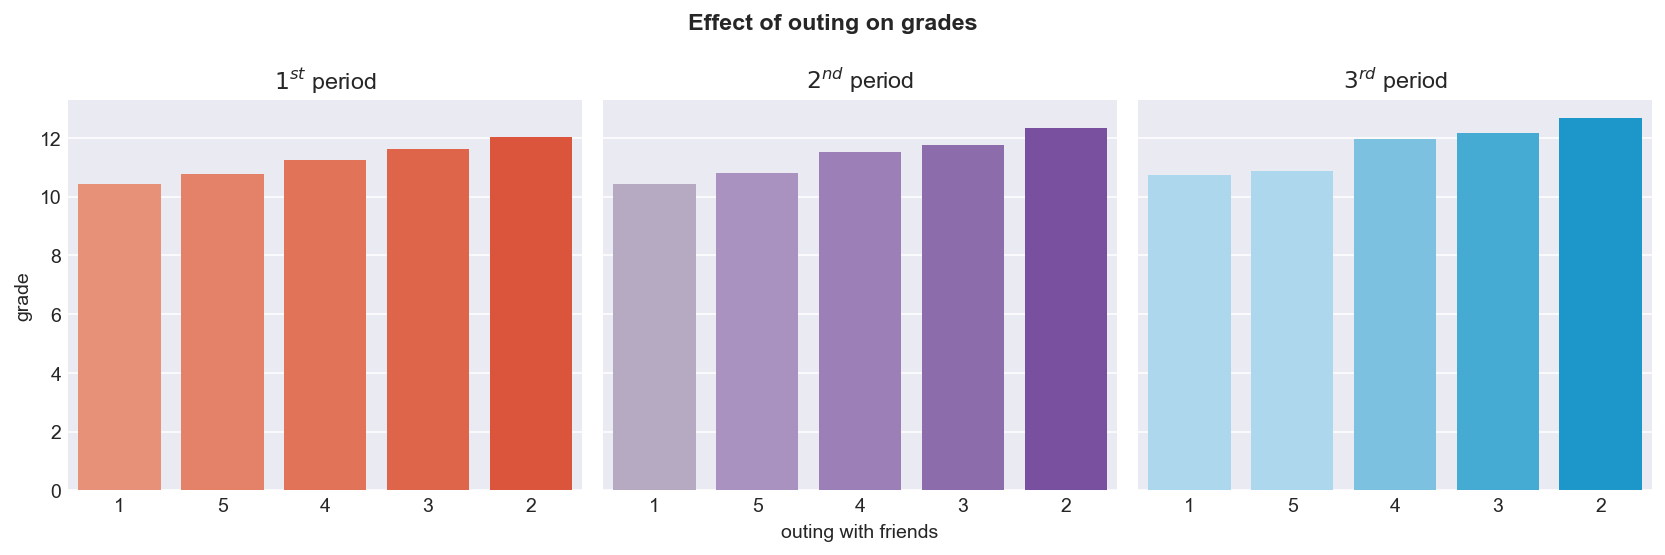

In [91]:
# Effect of outing on studies

fig, ax = plt.subplots(1,3, figsize=(12,4), sharey=True)
fig.suptitle('Effect of outing on grades',weight='bold')

sns.barplot(
    data=df, 
    x='goout', 
    y='g1', 
    order=find_order(data=df[['goout', 'g1']], x='goout',y='g1').goout, 
    ci=None,
    ax=ax[0],
    palette=['#f98765','#f87654','#f76543','#f65432', '#f54321']
)
ax[0].set_title("$1^{st}$ period")
ax[0].set_xlabel('')
ax[0].set_ylabel("grade")


sns.barplot(
    data=df,
    x='goout',
    y='g2',
    order = find_order(
        data=df[['goout', 'g2']],
        x='goout',
        y='g2'
    ).goout,
    palette="#b6a5c6, #a98bc6, #9d75c2, #8d61b7, #7943ad".split(', '),
    ax=ax[1],
    ci=None
)
ax[1].set_title("$2^{nd}$ period")
ax[1].set_xlabel('outing with friends')
ax[1].set_ylabel('')


sns.barplot(
    data=df,
    x='goout',
    y='g3',
    order = find_order(
        data=df[['goout', 'g3']],
        x='goout',
        y='g3'
    ).goout,
    palette="#a2dbf6, #a2dbf6, #6dc7f0, #2db6eb, #00a2e6".split(', '),
    ax=ax[2],
    ci=None
)
ax[2].set_title("$3^{rd}$ period")
ax[2].set_xlabel('')
ax[2].set_ylabel('')

plt.tight_layout()

_Fig compares the performance of students in each period based on their outing habits. Left for first period, Middle for second period, right for third period._


- Students who used to go out with friends sometimes they perform well. 

- Students who doesn't go out at all and students who frequently goes out shows low performance in exams.

### Absences

---

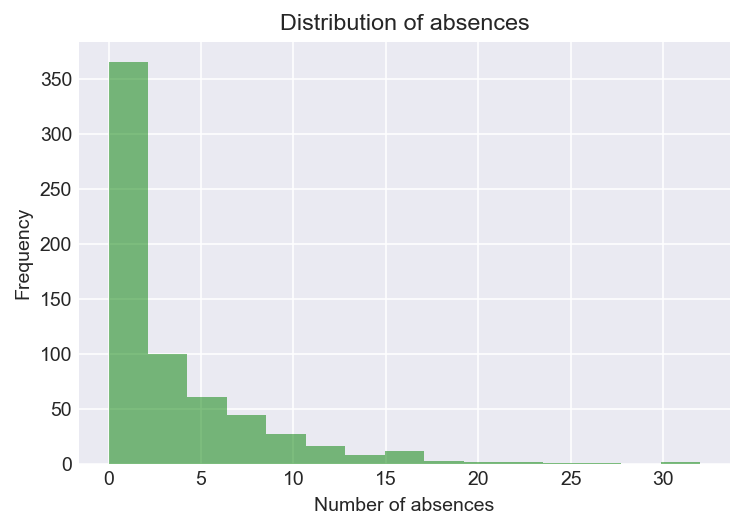

In [92]:
df.absences.plot.hist(bins=15, color='g', alpha=0.5)
plt.xlabel("Number of absences")
plt.title("Distribution of absences")
plt.show()

_Fig The above hist plot shows distribution of students absents in class._


- Not much students had more absences. 

- There were students with 30+ absences, but they are few in numbers

### Health Status

----

- A healthy mind stays in a healthy body.

- Health is the primary factor when it comes to a students performance.

In [93]:
df.health.unique()

array([3, 5, 1, 2, 4])

The health status is recorded in a scale of 1 to 5. 1 means not very well, and 5 means very good.

In [94]:
school_health = pd.crosstab(df.health, df.school)
school_health

school   GP  MS
health         
1        54  36
2        46  32
3        83  41
4        73  35
5       167  82

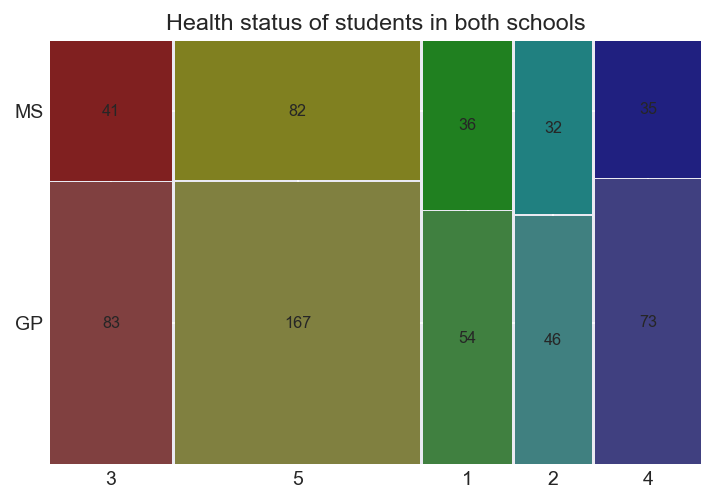

In [95]:
# School wises health status of students

labels = lambda k: {
    ('3', 'MS'): school_health.loc[3, 'MS'],
    ('3', 'GP'): school_health.loc[3, 'GP'],
    ('5', 'MS'): school_health.loc[5, 'MS'],
    ('5', 'GP'): school_health.loc[5, 'GP'],
    ('1', 'MS'): school_health.loc[1, 'MS'],
    ('1', 'GP'): school_health.loc[1, 'GP'],
    ('2', 'MS'): school_health.loc[2, 'MS'],
    ('2', 'GP'): school_health.loc[2, 'GP'],
    ('4', 'MS'): school_health.loc[4, 'MS'],
    ('4', 'GP'): school_health.loc[4, 'GP']
}[k]
mosaic(df, ['health', 'school'], labelizer=labels, title="Health status of students in both schools");

_Fig The mosaic plot shows count of students based on the schools on y axis and health scale on x axis._

- There are a mixed status, however most number of students had better health.

- 54 from Gabriel Pereira and 82 Students from Mousinho da Silveira had worst health status.

In [96]:
# Health of students based on age
health_age = df.groupby(['health','age']).health.count().unstack().fillna(0)
health_age

age       15    16    17    18    19   20   21   22
health                                             
1       21.0  22.0  22.0  19.0   5.0  0.0  0.0  1.0
2       13.0  26.0  14.0  20.0   4.0  1.0  0.0  0.0
3       15.0  33.0  39.0  30.0   5.0  2.0  0.0  0.0
4       17.0  26.0  30.0  29.0   4.0  1.0  1.0  0.0
5       46.0  70.0  74.0  42.0  14.0  2.0  1.0  0.0

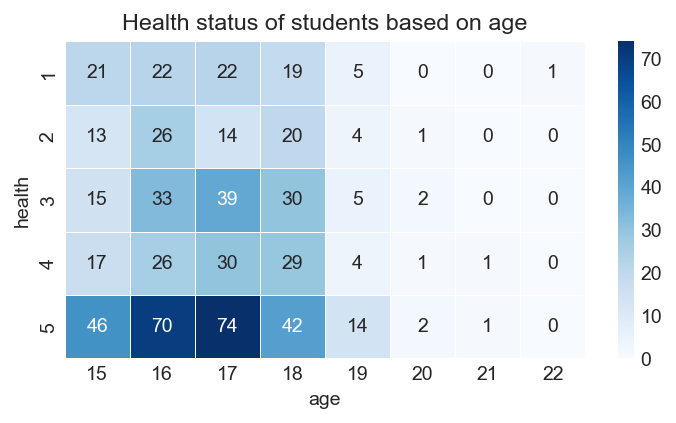

In [97]:
fig,ax = plt.subplots(figsize=(6,3))
ax=sns.heatmap(data=health_age, annot=True, fmt='g', cmap='Blues', linecolor='white', linewidths=.5)
plt.title("Health status of students based on age")
plt.show()

_Above heat map shows students health status based on age, age along x-axis and health along y-axis_

- Some younger students having bad health.

In [98]:
# Is students having bad health taking leaves
health_absence = df.groupby(['health', 'absences']).health.count().unstack().fillna(0)
health_absence

absences    0    1     2    3     4    5     6    7     8    9    10   11  \
health                                                                      
1         33.0  2.0  10.0  1.0  16.0  2.0   5.0  0.0  11.0  1.0  2.0  0.0   
2         29.0  3.0  13.0  0.0  12.0  3.0   6.0  1.0   4.0  1.0  3.0  0.0   
3         45.0  2.0  23.0  1.0  16.0  2.0  11.0  1.0   8.0  1.0  3.0  2.0   
4         45.0  2.0  18.0  3.0  12.0  1.0   8.0  1.0   5.0  1.0  7.0  0.0   
5         92.0  3.0  46.0  2.0  37.0  4.0  19.0  0.0  14.0  3.0  6.0  3.0   

absences   12   13   14   15   16   18   21   22   24   26   30   32  
health                                                                
1         3.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  
2         0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
3         1.0  0.0  2.0  1.0  2.0  2.0  1.0  0.0  0.0  0.0  0.0  0.0  
4         2.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  
5         6.0  0.0  6.0  1.0  5.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0

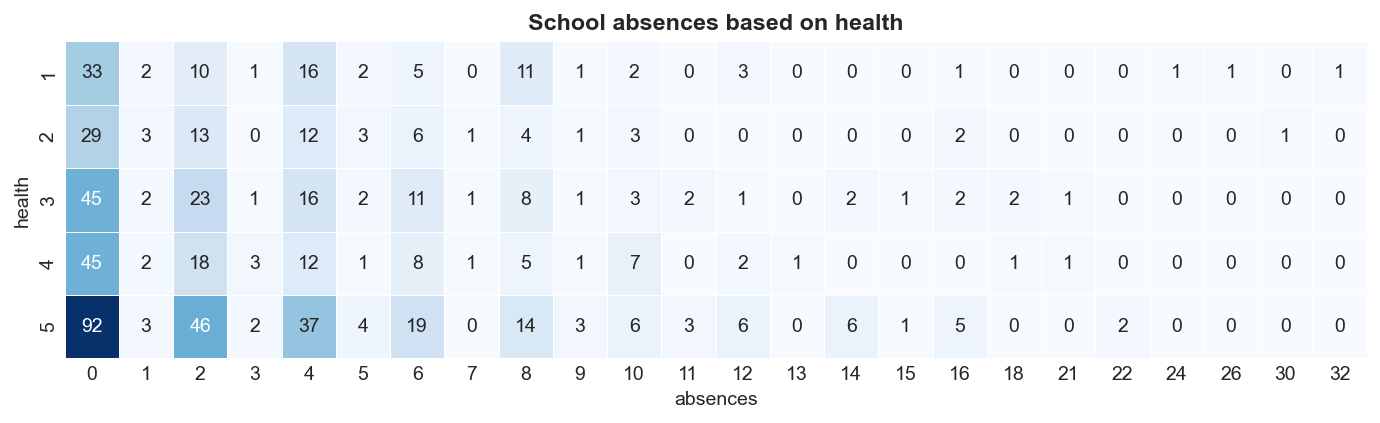

In [99]:
# Do students take leaves based on health
fig, ax = plt.subplots(figsize=(12,3))

ax = sns.heatmap(health_absence, annot=True, fmt='g', cmap='Blues', linecolor='white', linewidths=.5, cbar=False)
plt.title("School absences based on health", weight='bold')
plt.show()

_Above heat map shows number of students who took leave based on their health conditions. absence on x-axis and health on y-axis_


- 11 students took maximum of 8 absences for bad health where as 3 took 12 days and 1 took 24, 26, even 32 days absence.

**Students health condition based on the area they were living**

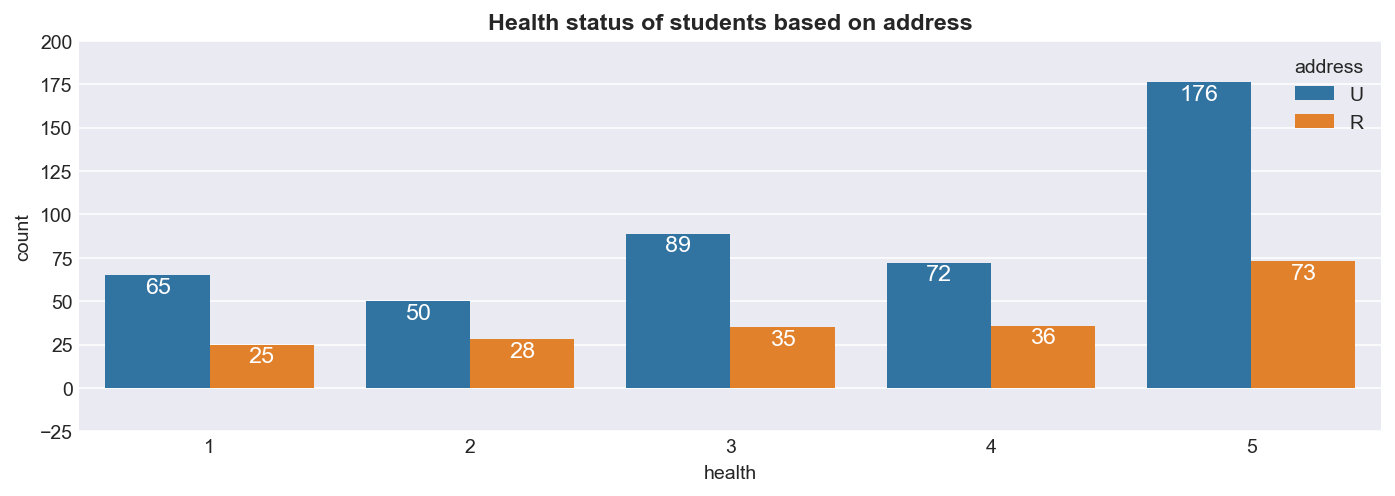

In [100]:
fig ,ax=plt.subplots(figsize=(12,5))
sns.countplot(data=df,x='health',hue='address')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='white', size=12)
ax.set_box_aspect(3/len(ax.patches))
ax.set_ylim(-25,200)
ax.set_title("Health status of students based on address", weight='bold')
plt.show()

From the barplot above we can see that 

- Number of students having higher levels of Health from urban area are <b>more</b> compared to the ones from the rural. 

- So poor health conditions/ Facilities might be another reason for the lower average score.

Here another Question arises..If people in the urban area are subject to better medical facilities why do they have considerable lower health numbers?.<b>Let's Discover why</b>

### Drinking Habit

----

In [101]:
drinking_habits = df.groupby(['walc','dalc']).size().unstack().fillna(0)
drinking_habits

dalc      1     2     3    4     5
walc                              
1     241.0   3.0   1.0  1.0   1.0
2     113.0  34.0   1.0  1.0   1.0
3      64.0  43.0   9.0  4.0   0.0
4      28.0  34.0  20.0  5.0   0.0
5       5.0   7.0  12.0  6.0  15.0

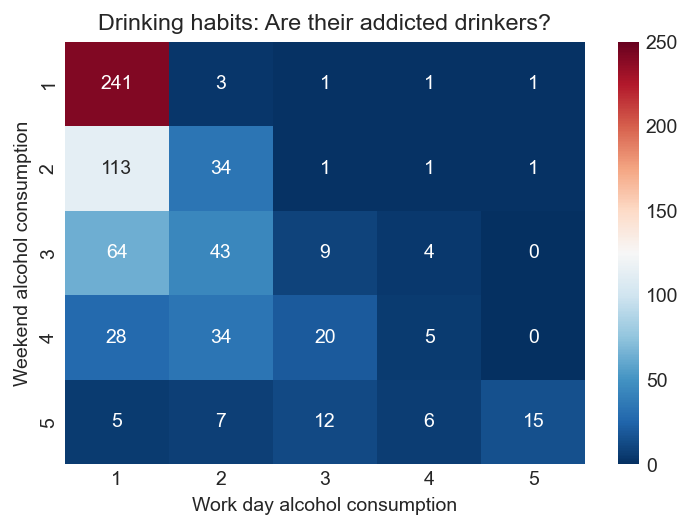

In [102]:
# overall drinking habit

sns.heatmap(data=drinking_habits, annot=True, cmap='RdBu_r', vmin=0, vmax=250, fmt='g')
plt.title("Drinking habits: Are their addicted drinkers?")
plt.ylabel('Weekend alcohol consumption')
plt.xlabel('Work day alcohol consumption')
plt.show()

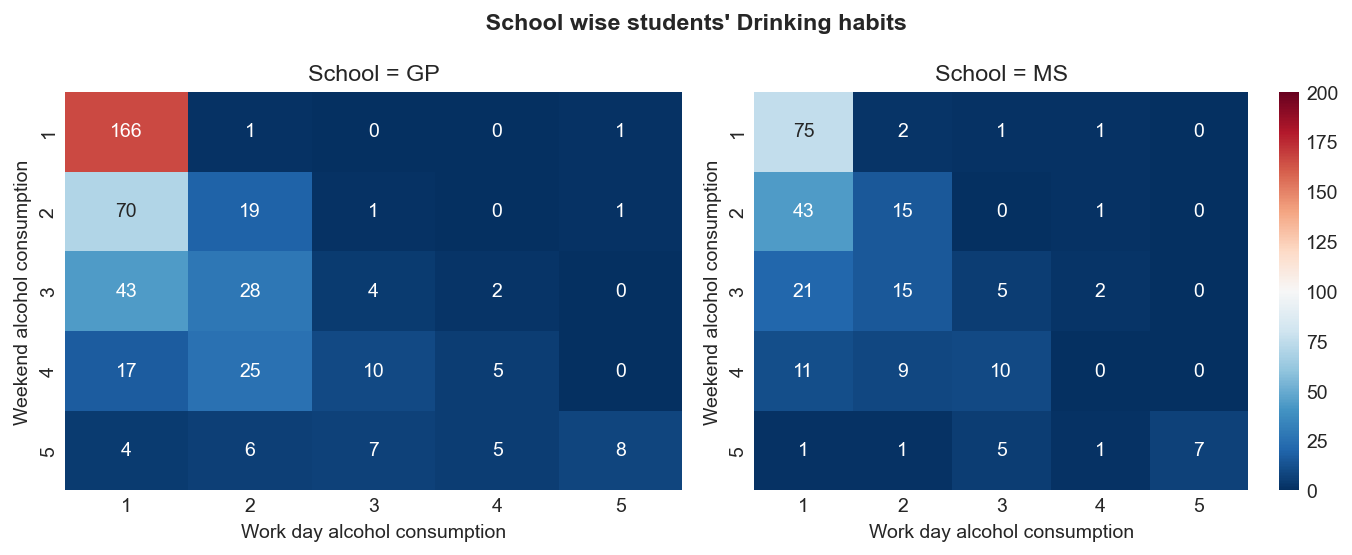

In [103]:
# School wise drinking habit of students

fig,ax = plt.subplots(1,2, figsize=(10,4))
fig.suptitle(" School wise students' Drinking habits", weight='bold')

sns.heatmap(
    ax=ax[0], 
    data=gp_school.groupby(['walc','dalc']).dalc.count().unstack().fillna(0), 
    annot=True, 
    cmap='RdBu_r', 
    fmt='g',
    vmin=0,
    vmax=200,
    cbar=False
)
ax[0].set_title("School = GP")
ax[0].set_ylabel('Weekend alcohol consumption')
ax[0].set_xlabel('Work day alcohol consumption')

sns.heatmap(
    ax=ax[1],
    data=ms_school.groupby(['walc','dalc']).walc.count().unstack().fillna(0),
    cmap='RdBu_r',
    fmt='g',
    annot=True,
    vmin=0,
    vmax=200
)
ax[1].set_title("School = MS")
ax[1].set_ylabel('Weekend alcohol consumption')
ax[1].set_xlabel('Work day alcohol consumption')

plt.tight_layout()
plt.show()

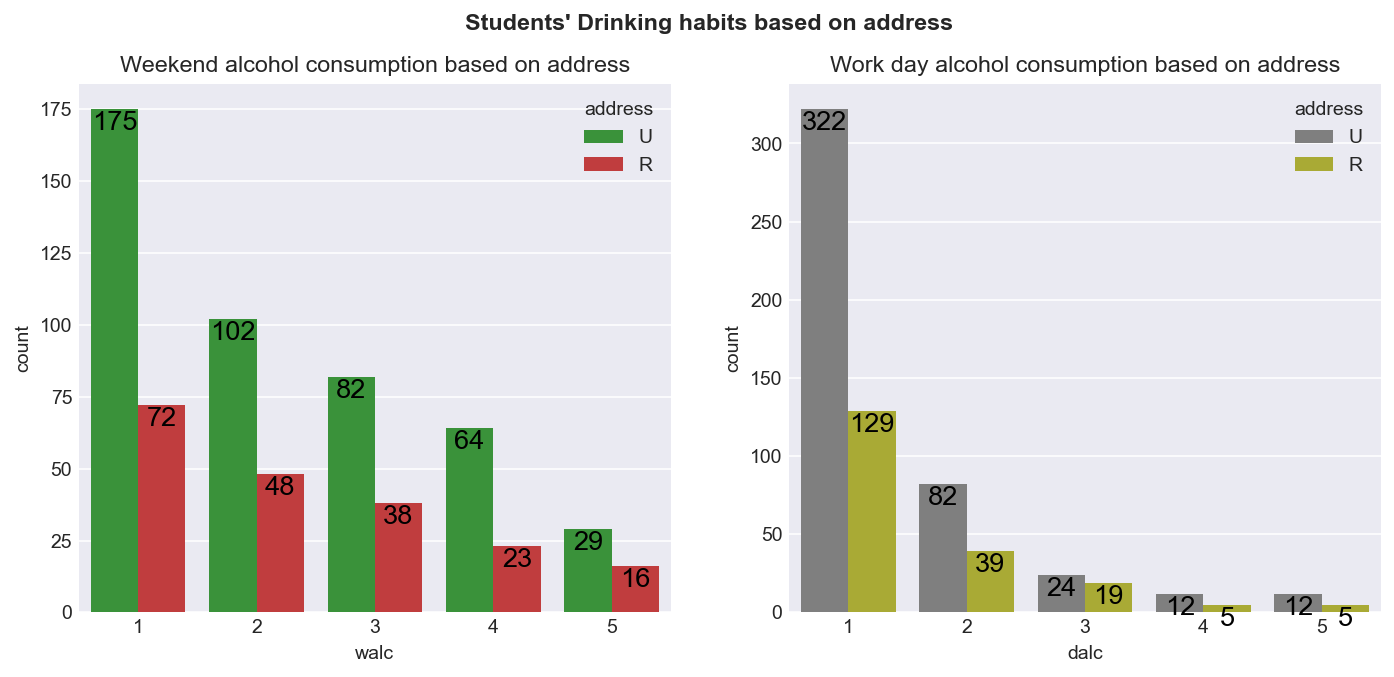

In [104]:
# Drinking habit based on address
fig,ax=plt.subplots(1,2,figsize=(12,5))
fig.suptitle("Students' Drinking habits based on address", weight='bold')

sns.countplot(ax=ax[0],data=df, x='walc',hue='address',palette=['C2','C3'])
ax[0].set_title("Weekend alcohol consumption based on address")
for p in ax[0].patches:
    ax[0].annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='black', size=14)

sns.countplot(ax=ax[1],data=df,x='dalc',hue='address',palette=['C7','C8'])
ax[1].set_title("Work day alcohol consumption based on address")
for p in ax[1].patches:
    ax[1].annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='black', size=14)
plt.show()

_Above bar plots explains students drinking habits based on the area they were from. Left - weekend drinking habit, and right work day drinking habit._

- Urban students are more addicted to alcohol both on daily as well as weekend basis, which explains the health problems

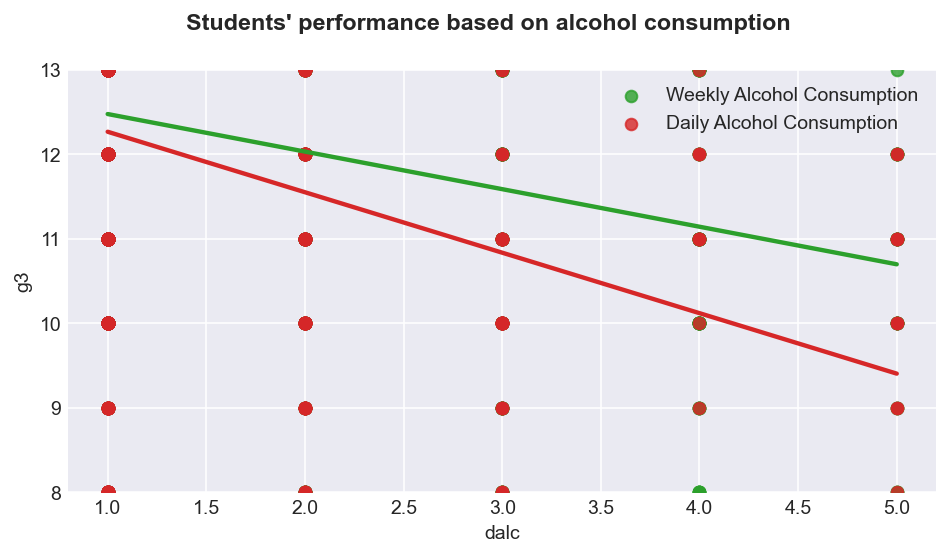

In [105]:
# Effect of alcohol on the students performance:
fig,ax=plt.subplots(figsize=(8,4))
sns.regplot(x='walc',y='g3',data=df,ci=None,color="C2",label="Weekly Alcohol Consumption")
sns.regplot(x='dalc',y='g3',data=df,ci=None,color="C3",label="Daily Alcohol Consumption")
ax.legend()
ax.set_ylim(8,13)
fig.suptitle("Students' performance based on alcohol consumption", weight='bold')
plt.show()

_Regression plot showing students performance based on the habit of alcohol consumption._

- Student's grade decreases as his/her alcohol consumption Increases, but it can also be noted from both the graph above the Daily Alcohol consumption has adverse effect compared to weekend consumption.

<a id='why-some-students-have-failed'></a>

### Why some students have failed?

----

Some of students have failed in all three periods. We need to analyze the possible reason that causes a students failure.

In [106]:
# Failed students in 1st period
grade1_failed = student[student.grade1 == 'fail']
# Failed students in 2nd period
grade2_failed = student[student.grade2 == 'fail']
# Failed students in 3rd period
grade3_failed = student[student.grade3 == 'fail']

grade1_failed.shape[0], grade2_failed.shape[0], grade3_failed.shape[0]

(157, 145, 100)

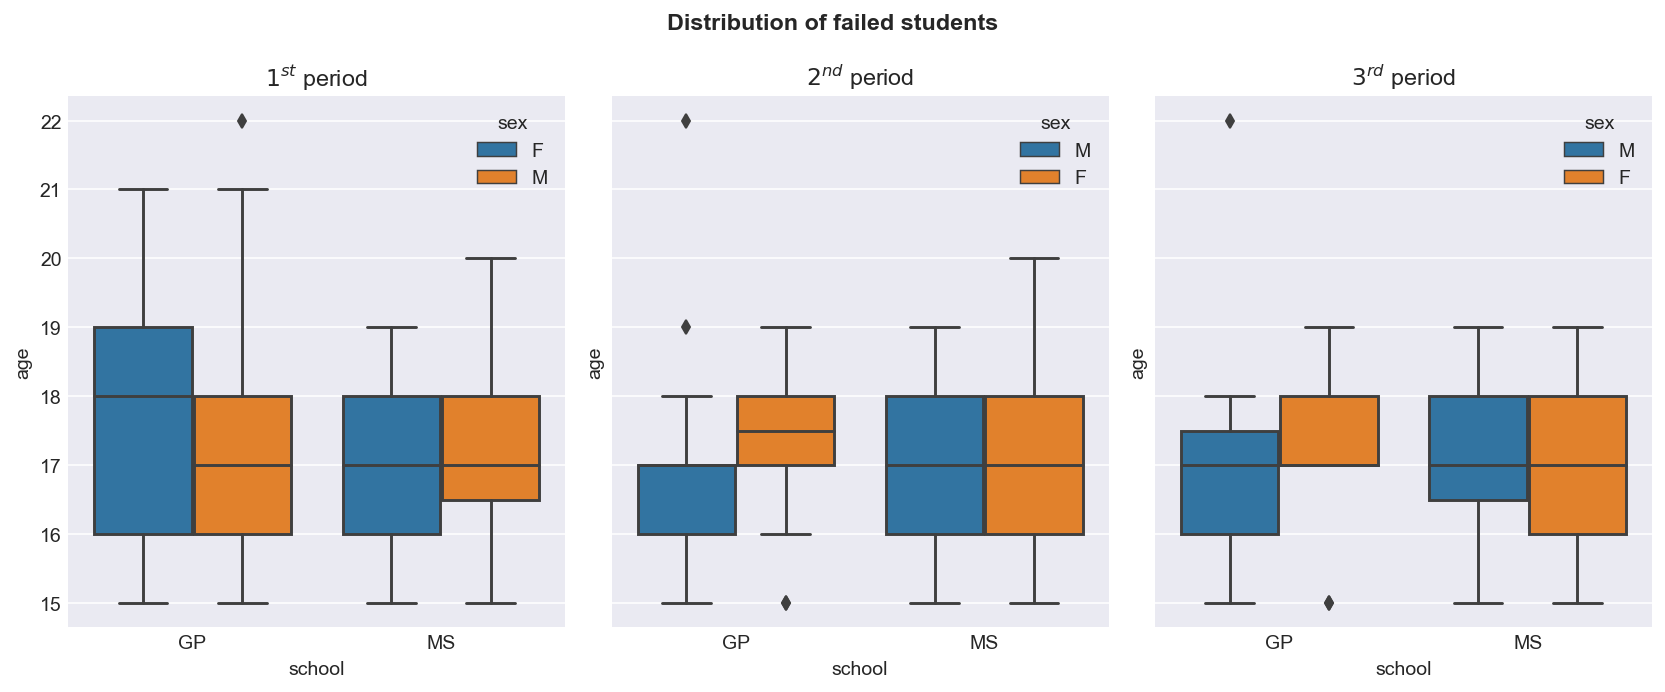

In [107]:
# School  wise and age wise failed students

fig, ax = plt.subplots(1,3, figsize=(12,5), sharex = True, sharey=True)
fig.suptitle("Distribution of failed students", weight='bold')

sns.boxplot(data=grade1_failed, y='age', x='school', hue='sex', ax=ax[0])
ax[0].set_title("$1^{st}$ period")

sns.boxplot(data=grade2_failed, y='age', x='school', hue='sex', ax=ax[1])
ax[1].set_title("$2^{nd}$ period")

sns.boxplot(data=grade3_failed, y='age', x='school', hue='sex', ax=ax[2])
ax[2].set_title("$3^{rd}$ period")
plt.tight_layout()

_Fig compares students failed in each period based on age, school, and gender._

- In first period older girls failed more in Gabriel Pereira whereas in 2nd period relatively younger girls failed.

- In third period from Mousinho da Silveira school boys of younger age had failed more.

In [108]:
students_more_than_18yo = student[student['age'] > 18]
students_more_than_18yo.shape[0]

41

In [109]:
students_more_than_18yo.grade1.value_counts()

fail            23
sufficient      14
satisfactory     2
good             2
Name: grade1, dtype: int64

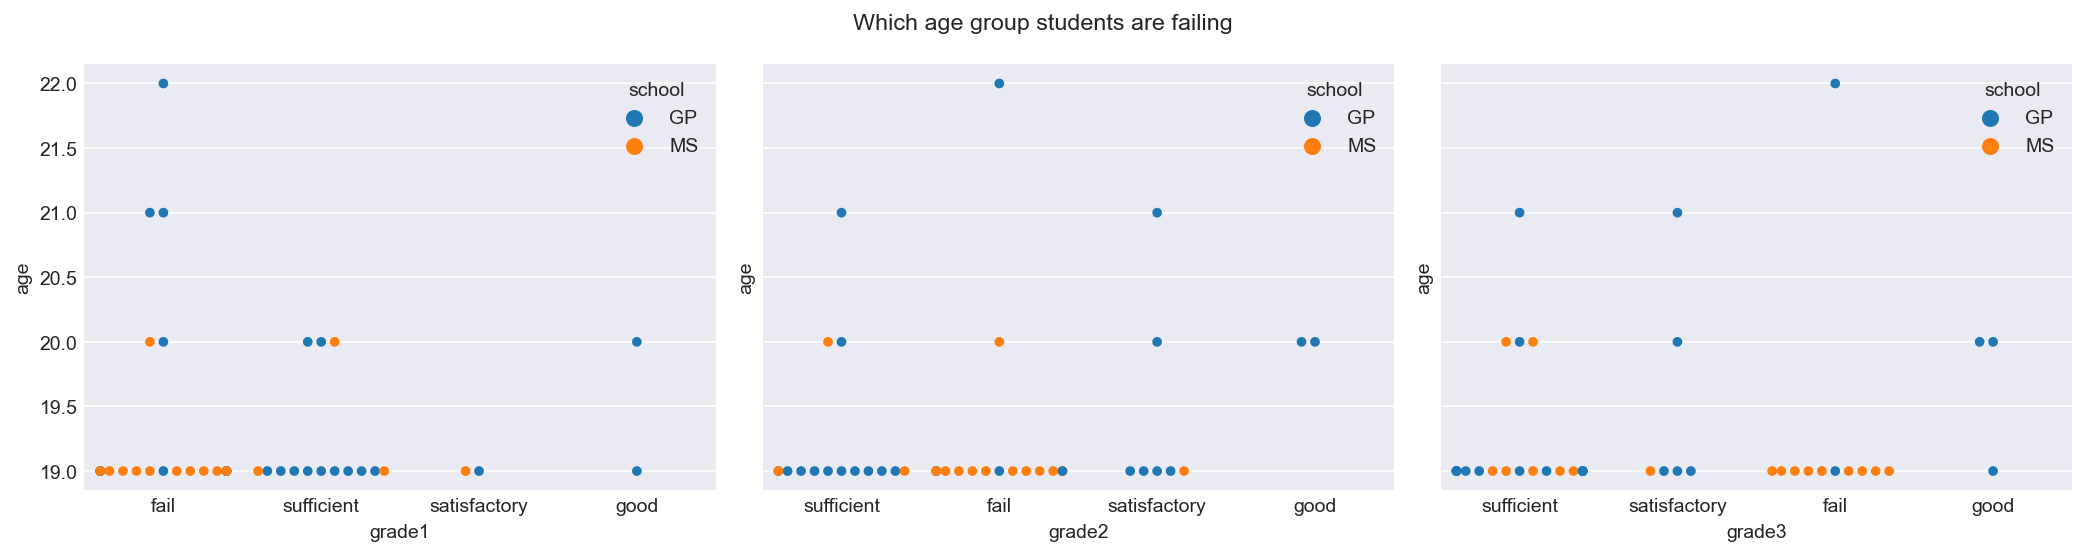

In [110]:
# Which age group students are failing
fig, ax = plt.subplots(1,3, figsize=(15,4), sharey=True)# sharex=True)
fig.suptitle("Which age group students are failing")

sns.swarmplot(x='grade1', y='age', data=students_more_than_18yo, hue='school', ax=ax[0])
sns.swarmplot(x='grade2', y='age', data=students_more_than_18yo, hue='school', ax=ax[1])
sns.swarmplot(x='grade3', y='age', data=students_more_than_18yo, hue='school', ax=ax[2])

plt.tight_layout();

_Above swarm plots compare the distribution of age group more than 18 who had failed in all three periods from both the schools._

- There were older students in Gabriel Pereira. There age was 22. Either thy had failed before or started schooling late. 

**Effect of parents education and employment on students failure**


In [111]:
parents_education_failed_g1 = pd.crosstab(grade1_failed.medu, grade1_failed.fedu)
parents_education_failed_g2 = pd.crosstab(grade2_failed.medu, grade2_failed.fedu)
parents_education_failed_g3 = pd.crosstab(grade3_failed.medu, grade3_failed.fedu)

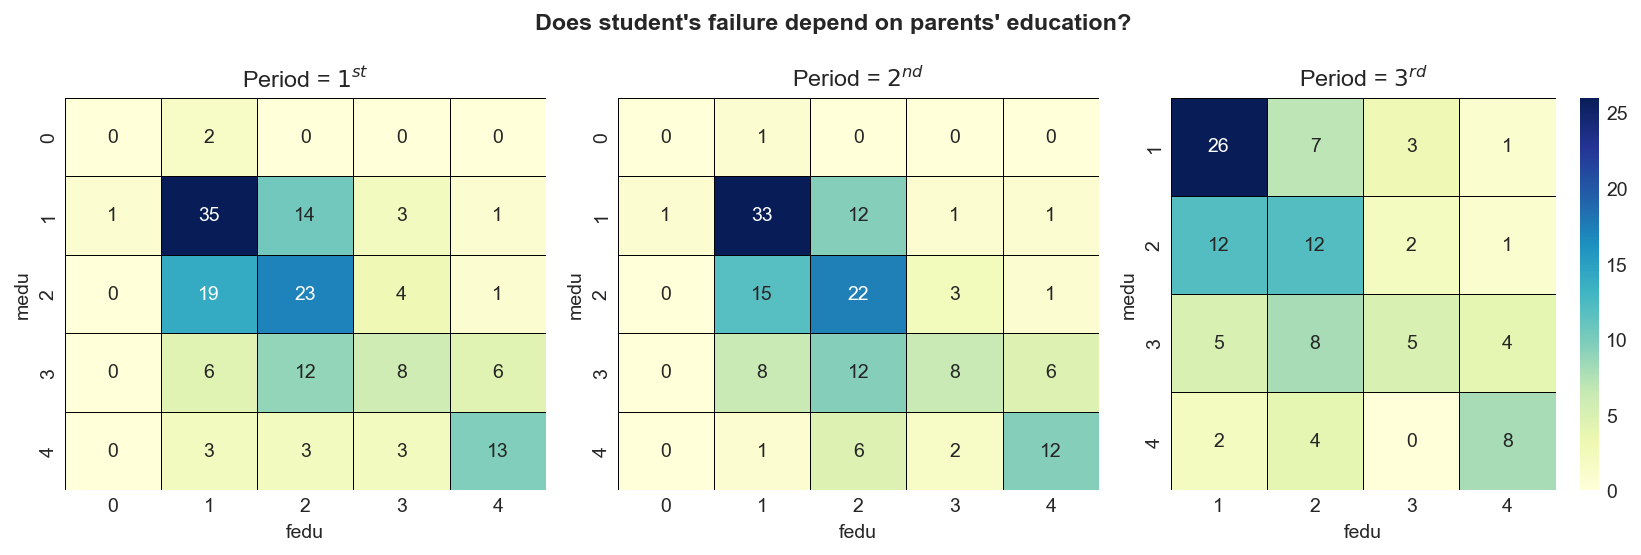

In [112]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
fig.suptitle("Does student's failure depend on parents' education?", weight='bold')

sns.heatmap(parents_education_failed_g1, annot=True, ax=ax[0], fmt='g', cmap='YlGnBu', linewidths=.5, linecolor='black',cbar=False)
ax[0].set_title('Period = $1^{st}$')

sns.heatmap(parents_education_failed_g2, annot=True, ax=ax[1], fmt='g', cmap='YlGnBu', linewidths=.5, linecolor='black', cbar=False)
ax[1].set_title('Period = $2^{nd}$')

sns.heatmap(parents_education_failed_g3, annot=True, ax=ax[2], fmt='g', cmap='YlGnBu', linecolor='black',linewidths=.5)
ax[2].set_title('Period = $3^{rd}$')



plt.tight_layout()

_Fig: above heat maps compares students performance based their parents education in each period._

- More students had failed whose parents had only primary or secondary schooling.

- Some students also failed from higher qualification house holds.



In [113]:
## Employment status
parents_emp_failed_g1 = pd.crosstab(grade1_failed.mjob, grade1_failed.fjob)
parents_emp_failed_g2 = pd.crosstab(grade2_failed.mjob, grade2_failed.fjob)
parents_emp_failed_g3 = pd.crosstab(grade3_failed.mjob, grade3_failed.fjob)

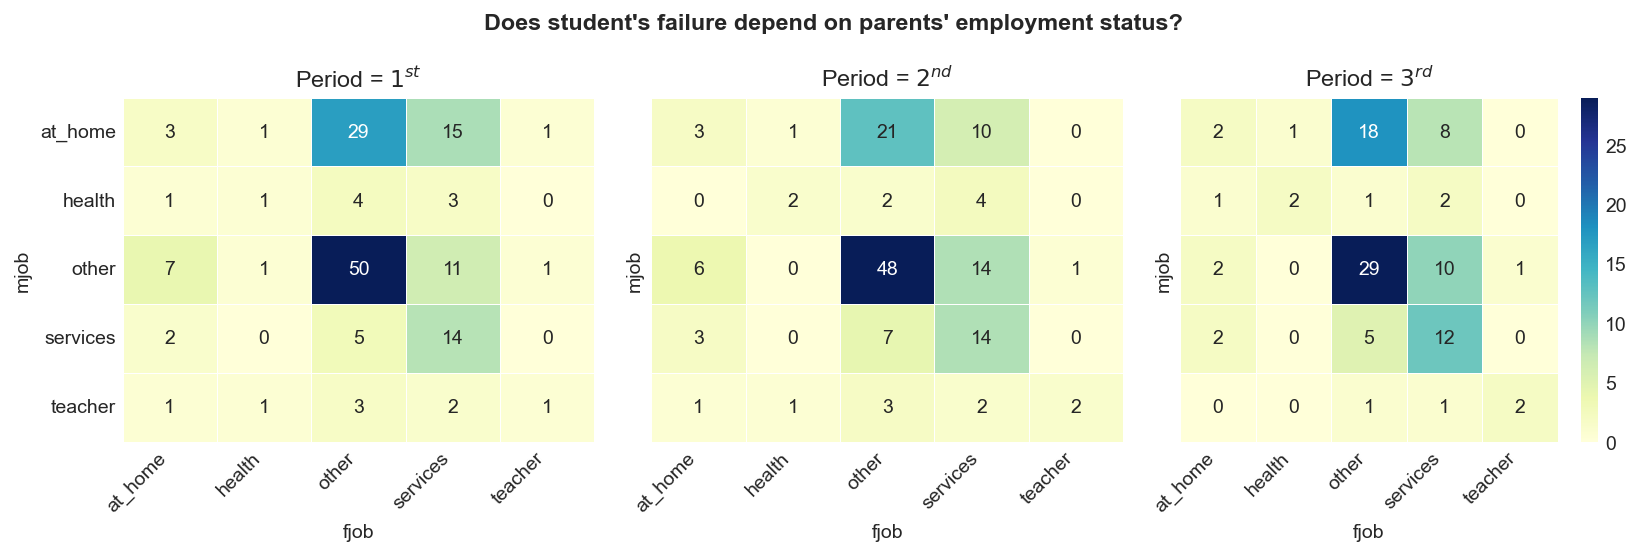

In [114]:
# Effect of parents employment on children's failure

fig, ax = plt.subplots(1,3, figsize=(12,4), sharey=True, sharex=True)
fig.suptitle("Does student's failure depend on parents' employment status?", weight='bold')

sns.heatmap(parents_emp_failed_g1, annot=True, ax=ax[0], fmt='g', cmap='YlGnBu', linewidths=.5, cbar=False)
ax[0].set_title('Period = $1^{st}$')
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0, horizontalalignment='right')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')

sns.heatmap(parents_emp_failed_g2, annot=True, ax=ax[1], fmt='g', cmap='YlGnBu', linewidths=.5, cbar=False)
ax[1].set_title('Period = $2^{nd}$')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')

sns.heatmap(parents_emp_failed_g3, annot=True, ax=ax[2], fmt='g', cmap='YlGnBu', linewidths=.5)
ax[2].set_title('Period = $3^{rd}$')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()

_Fig. above heat-maps shows count of students who had failed in all three periods based on their parents employment status._

- More students had failed whose parents had other job and were at hme. 

- Very few students had failed whose parents were teachers, then service persons.

**Failed students study time**

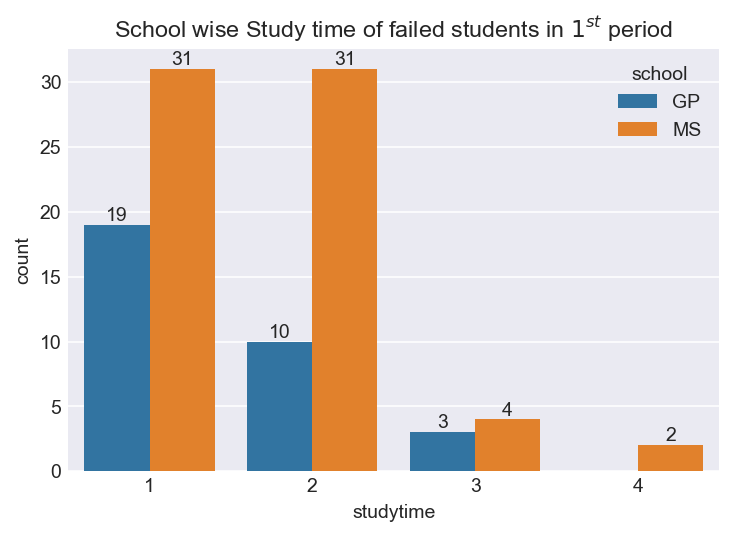

In [115]:
ax = sns.countplot(data=grade3_failed, x='studytime', hue='school')
for i in ax.containers:
    ax.bar_label(i)
plt.title("School wise Study time of failed students in $1^{st}$ period")
plt.show()

_Fig. the bar plot shows number of students who had failed in 3rd period based on their study time._

- More students failed whose study time was less than 2 hours.

- After third period more number of students were failed from Mousinho da Silveira.

- There were 2 students failed who had study time more than 10 hours from Mousinho da Silveira.

**Failed students outing routine**

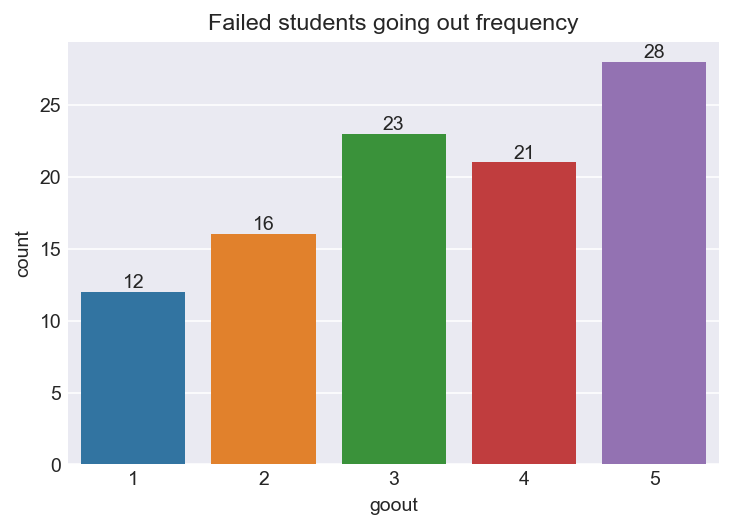

In [116]:
fig, ax= plt.subplots(figsize=(6,4))

ax = sns.countplot(data=grade3_failed, x='goout')
for i in ax.containers:
    ax.bar_label(i)

plt.title("Failed students going out frequency")
plt.show()

_Fig. shows how many times the failed students likely to go out with friends_

- More number of students had a higher outing frequency.

This may be the reason of their failure.

**How the first period failed students performed in 2nd and 3rd period**

In [117]:
grade1_failed.shape[0]

157

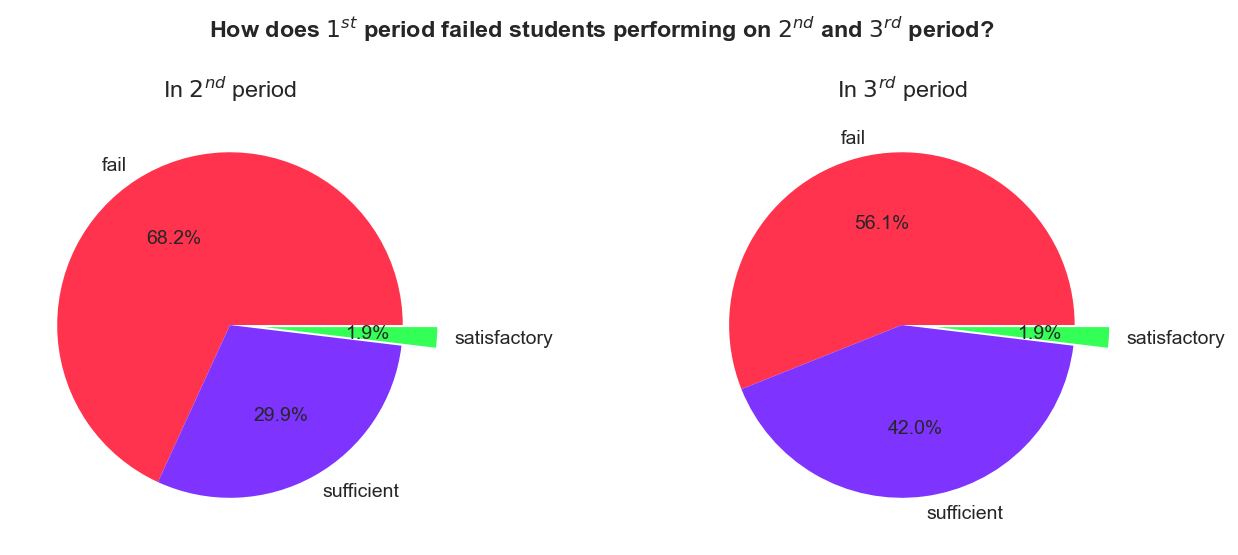

In [118]:
# performance of grade1 failed students on 2nd and 3rd period

fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle("How does $1^{st}$ period failed students performing on $2^{nd}$ and $3^{rd}$ period?", weight='bold')

plt.subplot(121)
pie1 = grade1_failed.grade2.value_counts().plot(kind='pie', autopct='%1.1f%%', legend=False, colors=['#FF334E','#7E33FF','#33FF57'], fontsize=10, explode=(0,0,0.2))
plt.ylabel('')
plt.title("In $2^{nd}$ period")


plt.subplot(122)
pie2= grade1_failed.grade3.value_counts().plot(kind='pie', autopct='%1.1f%%', legend=False, colors=['#FF334E','#7E33FF','#33FF57'], fontsize=10, explode=(0,0,0.2))
plt.ylabel('')
plt.title("In $3^{rd}$ period")


plt.tight_layout()
plt.show()

_Fig The above pie charts compares the performance of first period failed students in second and third period._

- Out of 157 students 29.9% managed to obtain a sufficient degree whereas 1.9% students performed satisfactory result in 2nd period. However 68.2% students had still failed.

- In third period the sufficient performing students number increase adn failed students number decreased.

- Students are trying to improve their grades.

<a id='Higher Education'></a>

### Higher Education

The recorded students in the dataset were high school students. Now we will check whether they opted to take higher education or not.

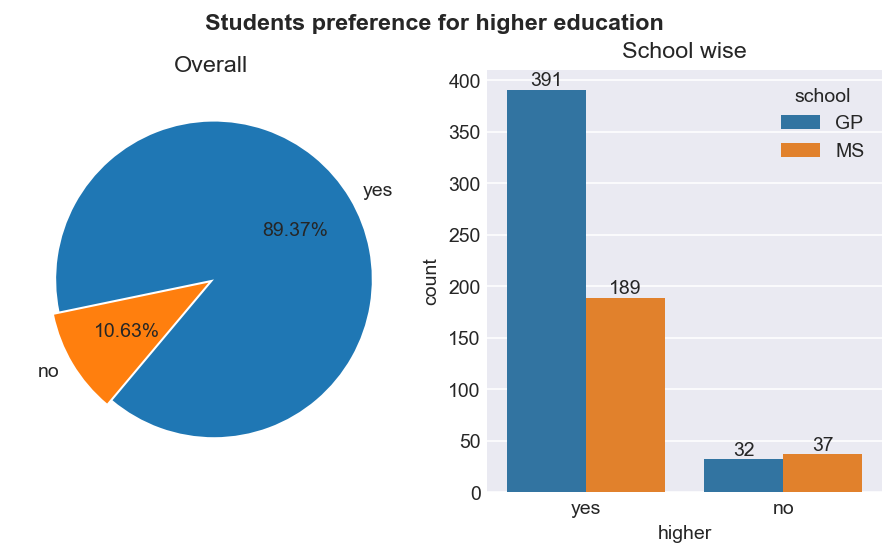

In [119]:
# Students choice for higher education

fig, ax = plt.subplots(figsize=(8,4))

plt.subplot(121)
pie = df.higher.value_counts().plot.pie(autopct='%.2f%%', startangle=230, explode=(0.02,0.02))
plt.ylabel('')
plt.title("Overall")

plt.subplot(122)
bar = sns.countplot(data=df, x='higher', hue='school')
plt.title('School wise')
for i in bar.containers:
    bar.bar_label(i)

plt.suptitle("Students preference for higher education", weight='bold')
plt.show()

_The above figure shows the students preference for higher education in the school. Pie chart represents the overall preference. Bar chart represents the school wise preference overall students.
The bar chart shows school wise number of students_


- Only 10.63% students had not opted for higher education.

- 32 students were from Gabriel Pereira School and 37 students were from Mousinho da Silveira who denied to higher education.

#### Why students are not opting for higher education?

In [120]:
# students who had not opted for higher education
not_opted_for_higher_edu = df[df['higher']=='no']

not_opted_for_higher_edu.shape[0]

69

**Grade points**

May be the students are not choosing for higher education due to their poor grades

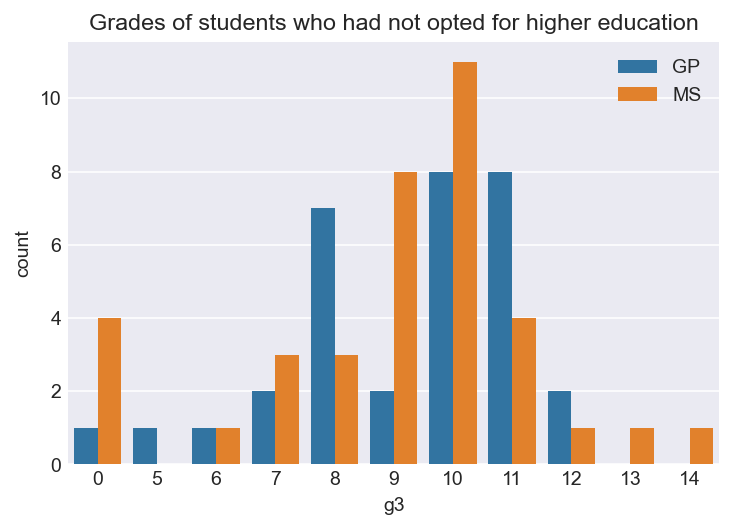

In [121]:
sns.countplot(data=not_opted_for_higher_edu, x='g3', hue='school')
plt.title("Grades of students who had not opted for higher education")
plt.legend(loc='upper right')
plt.show()

_Fig shows number of students and their grades who had not opted for higher education based on schools_

- Some students had failed, but some had up to satisfactory grade. Still they are not choosing higher study.


In [122]:
# Students who had not opted for higher education but had performed well in 3rd period.
not_opted_for_higher_edu = not_opted_for_higher_edu[not_opted_for_higher_edu['g3']>10]
not_opted_for_higher_edu.shape[0]

17

- Only 17 students were there who had not chosen for higher education but are performing better in exams. 

Let's see why they had no wish to pursue higher education.

In [123]:
no_higher_study_parents_edu = pd.crosstab(not_opted_for_higher_edu.medu, not_opted_for_higher_edu.fedu)
no_higher_study_parents_edu

fedu  1  2  3
medu         
0     1  0  0
1     2  3  1
2     3  4  1
3     0  1  1

In [124]:
no_higher_study_parents_job = pd.crosstab(not_opted_for_higher_edu.mjob, not_opted_for_higher_edu.fjob)
no_higher_study_parents_job

fjob      at_home  other  services
mjob                              
at_home         1      6         0
other           0      6         1
services        1      1         1

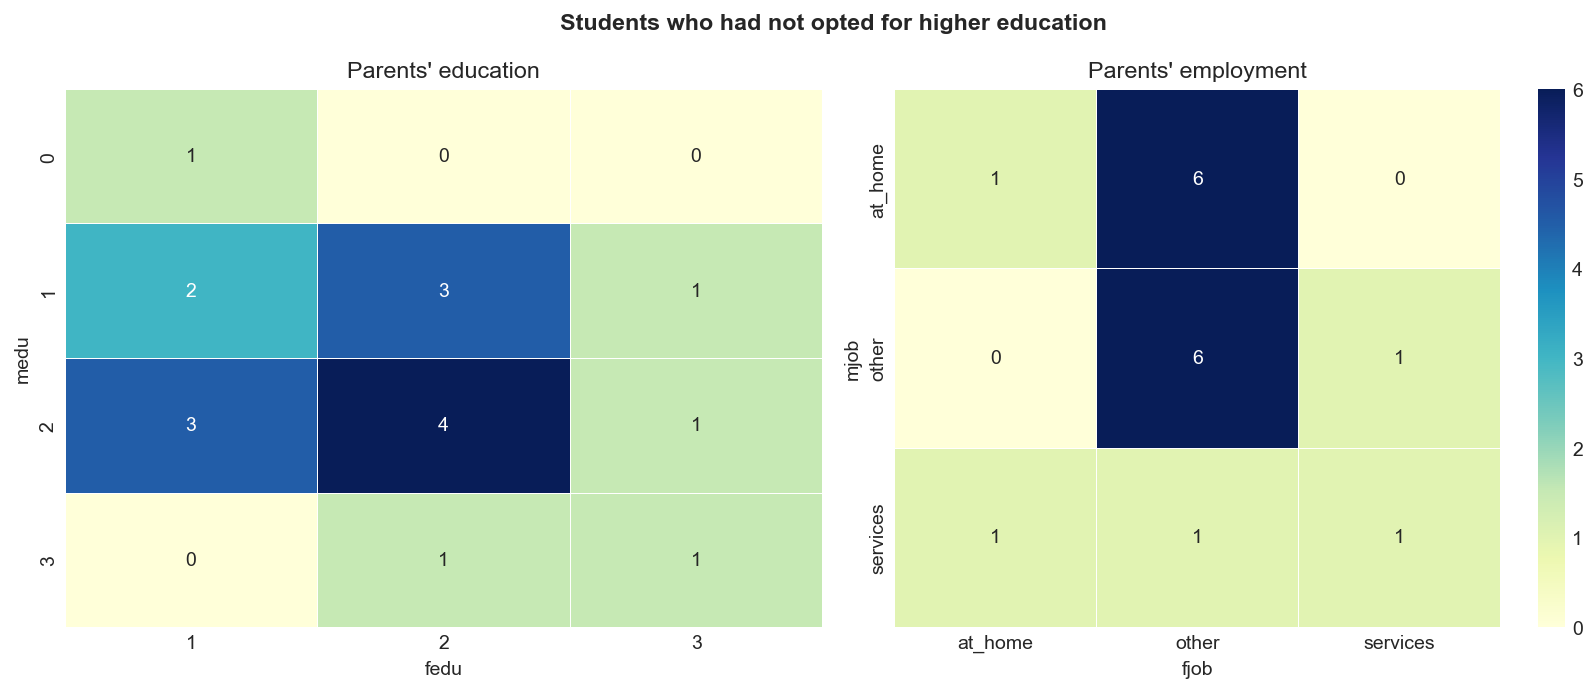

In [125]:
# students who had opted for higher education as per parents education and employment

fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.heatmap(data=no_higher_study_parents_edu, annot=True, ax=ax[0], fmt='g', cmap='YlGnBu', linewidths=.5, cbar=False)
sns.heatmap(data=no_higher_study_parents_job, annot=True, ax=ax[1], fmt='g', cmap='YlGnBu', linewidths=.5)

ax[0].set_title("Parents' education")
ax[1].set_title("Parents' employment")

fig.suptitle("Students who had not opted for higher education", weight='bold')
plt.tight_layout()
plt.show()

_Above heatmap shows the relationship between students not opted for higher education to their parents' education and work. Left side shows education and right side shows employment_


- Students whose parents had primary education had not chosen for higher education.

- More students had not chosen for higher education whose parents were working other jobs or at home.

**Do these students need education support?**

In [126]:
not_opted_for_higher_edu.famsup.value_counts()

no     9
yes    8
Name: famsup, dtype: int64

In [127]:
not_opted_for_higher_edu.schoolsup.value_counts()

no    17
Name: schoolsup, dtype: int64

In [128]:
not_opted_for_higher_edu.sex.value_counts()

F    11
M     6
Name: sex, dtype: int64

- Out of those 17 students no one is getting scholarship support and 9 are not getting family support.

- 11 students were girls and 6 were boys.

- This indicates towards their poor economical condition.

- They can pursue higher education if they can get some support.

<a id='conclusion'></a>

### Conclusion

-------

The original experiment and record of data is old. Many things have changed till now.Based on the data on hand and the facts we have known and the results of analysis, we can conclude that  

- More number of girls were studying in the schools than boys. More number of mothers were working than number of fathers. It shows the spirit of woman empowerment in Portuguese.

- Transportation can be better for rural students.

- Mousinho da Silveira need to practice the promotion of extracurricular activities among students.

- Internet access gives advantage to students. Rural areas had not much internet access. Giving internet connection to rural students will be beneficial for their studies.

- Improving health standards in schools where rural students are enrolled will promote healthy environment among students.

- Need to promote awareness about alcohol consumption on schools where more urban students were enrolled.

- Parents needed to be advised to maintain good relationship with children.

- Schools should take the initiatives of bringing sponsorship to give financial aid for students who can't afford education.


<a id='further-study'></a>

### Further Study

----------

We have just cleaned and analyzed the data in this mini project. We can take help of machine learning models to study further education related student performance analysis to predict students' performance.

<a id='acknowledgement'></a>

### Acknowledgement

-----

We acknowledge the efforts and opportunities given to us by the [SIF](https://www.sif.org.sg/en), [DigiLABS](https://www.sif.org.sg/Our-Work/Volunteer-Cooperation/E-volunteering-Programmes/DigiLABS) and Code for Asia Team.

We acknowledge the efforts of our instructor `Shu Min Ng`, Data science Specialist for her informative lectures and valuable instructions.

Made with ❤️ - Team Data Wizard

[Ashrulochan Sahoo](https://github.com/dSilu) | [Venkata Koundinya Ganugapati](https://github.com/Vkoundinya) | Sharvari Tamhanker
